## **Import Dependencies**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from datetime import timedelta

## **Load Data**

In [6]:
outgoing_df = pd.read_excel("dataset/OUTGOING INSTAPAY TXNS_PJDSC.xlsx")
incoming_df = pd.read_excel("dataset/INCOMING INSTAPAY TXNS_PJDSC.xlsx")
financial_df = pd.read_excel("dataset/FINANCIAL DIGITAL TXNS_PJDSC.xlsx")
debit_df = pd.read_excel("dataset/DEBIT CARD TXNS_PJDSC.xlsx")
customer_df = pd.read_excel("dataset/CUSTOMER INFO_PJDSC.xlsx")
credit_df = pd.read_excel("dataset/CREDIT CARD TXNS_PJDSC.xlsx")

## **Remove Duplicates**

In [7]:
customer_df = customer_df.drop_duplicates()
outgoing_df = outgoing_df.drop_duplicates()
incoming_df = incoming_df.drop_duplicates()
financial_df = financial_df.drop_duplicates()
debit_df = debit_df.drop_duplicates()
credit_df = credit_df.drop_duplicates()

In [4]:
# unique_customers_num = customer_df["CUST_NUM"].value_counts().count()
# unique_outgoing_num = outgoing_df["CUST_NUM"].value_counts().count()
# unique_incoming_num = incoming_df["CUST_NUM"].value_counts().count()
# unique_financial_num = financial_df["CUST_NUM"].value_counts().count()
# unique_debit_num = debit_df["CUST_NUM"].value_counts().count()
# unique_credit_num = credit_df["CUST_NUM"].value_counts().count()

# **Table of Contents**
**CUSTOMER INFO**


**CREDIT CARD TRANSACTIONS**


**DEBIT PURCHASE TRANSACTIONS**


**FINANCIAL DIGITAL TRANSACTIONS**


**INCOMING INSTAPAY TRANSACTIONS**


**OUTGOING INSTAPAY TRANSACTIONS**


**MERGED DATASET**


**NARRATIVE**




## **Customer Info**

In [8]:
customer_df = customer_df.dropna()

# customer_df = customer_df[customer_df['EDUCATION'] != 'NO_DATA']
# customer_df = customer_df[customer_df['DIGITAL_FLAG'] != 'NO_DATA']

customer_df.head()

CUST_NUM PROVINCE                                  REGION EDUCATION  \
0  11712.654012  BENGUET  CORDILLERA ADMINISTRATIVE REGION (CAR)   NO_DATA   
1    436.605085  BENGUET  CORDILLERA ADMINISTRATIVE REGION (CAR)   NO_DATA   
2    921.989154  BENGUET  CORDILLERA ADMINISTRATIVE REGION (CAR)   NO_DATA   
3   1119.634762  BENGUET  CORDILLERA ADMINISTRATIVE REGION (CAR)       LOW   
4   1709.755538  BENGUET  CORDILLERA ADMINISTRATIVE REGION (CAR)   NO_DATA   

    AGE    TENURE BUSINESS_OWNER DIGITAL_FLAG INCOME_SOURCE  IDV_OR_ORG  \
0  20.0  1.833333              N      DIGITAL     ALLOWANCE           1   
1  21.0  4.250000              N      NO_DATA        SALARY           1   
2  23.0  2.000000              N  TRADITIONAL     ALLOWANCE           1   
3  13.0  5.583333              N  TRADITIONAL     ALLOWANCE           1   
4  20.0  1.250000              N      DIGITAL        SALARY           1   

   SEGMENT SUBSEGMENT  GENDER MARITAL_STATUS  
0        3  CORE MASS    MALE         SINGLE  
1        3  CORE MASS  FEMALE         SINGLE  
2        3  CORE MASS    MALE         SINGLE  
3        3  CORE MASS    MALE         SINGLE  
4        3  CORE MASS  FEMALE         SINGLE

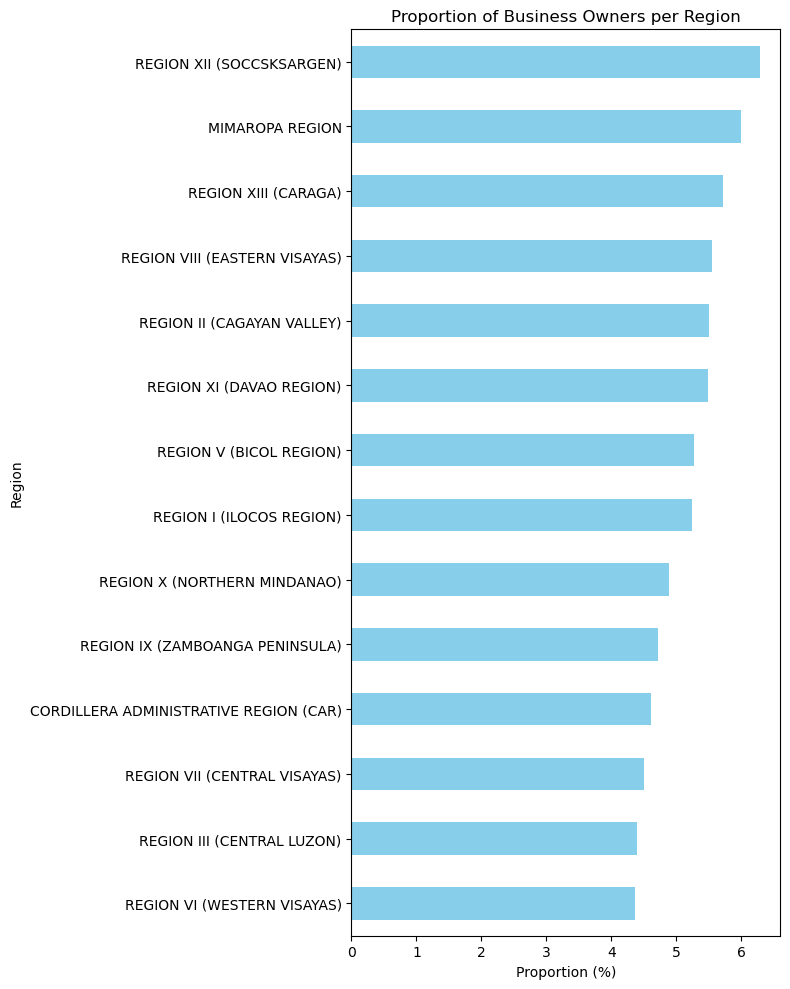

In [6]:
region_business_proportion = customer_df.groupby('REGION')['BUSINESS_OWNER'].value_counts(normalize=True).unstack().fillna(0)

region_business_proportion['Proportion of Business Owners'] = region_business_proportion['Y']

region_business_proportion['Proportion of Business Owners'] = region_business_proportion['Proportion of Business Owners'] * 100

region_business_proportion = region_business_proportion.sort_values(by='Proportion of Business Owners', ascending=False)

plt.figure(figsize=(8, 10))
region_business_proportion['Proportion of Business Owners'].plot(kind='barh', color='skyblue')
plt.title('Proportion of Business Owners per Region')
plt.xlabel('Proportion (%)')
plt.ylabel('Region')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

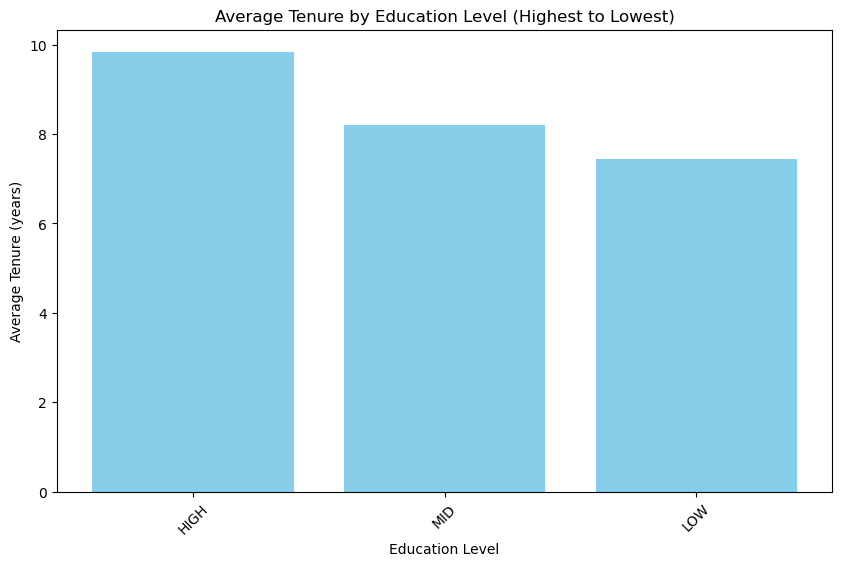

In [7]:
customer_filtered_education_df = customer_df[customer_df['EDUCATION'] != 'NO_DATA']

average_tenure_by_education = customer_filtered_education_df.groupby('EDUCATION')['TENURE'].mean().reset_index()

average_tenure_by_education = average_tenure_by_education.sort_values(by='TENURE', ascending=False)

plt.figure(figsize=(10, 6))

plt.bar(average_tenure_by_education['EDUCATION'], average_tenure_by_education['TENURE'], color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Average Tenure (years)')
plt.title('Average Tenure by Education Level (Highest to Lowest)')

plt.xticks(rotation=45) 

plt.show()

### **CREDIT CARD TRANSACTIONS**

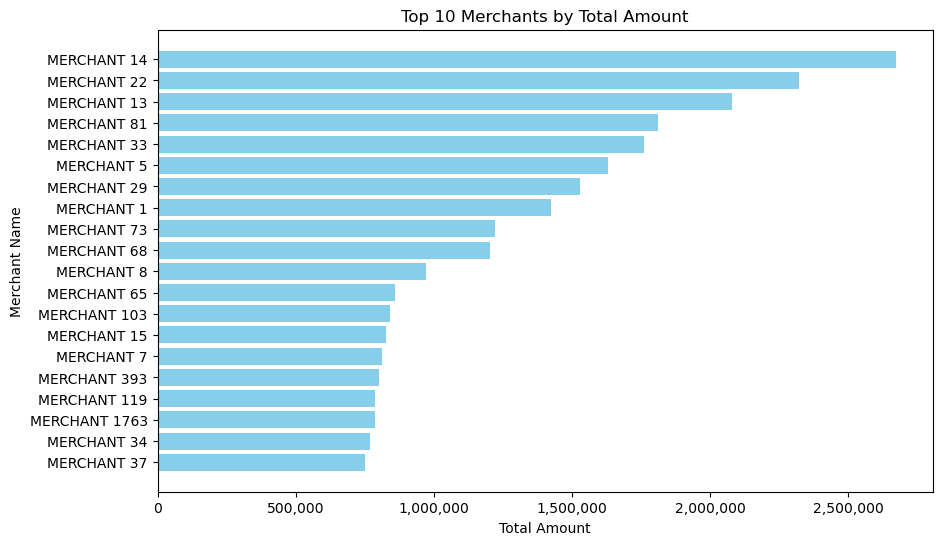

In [8]:
credit_df = credit_df.dropna()

total_amount_per_merch = credit_df.groupby('MERCH_NAME')['AMOUNT'].sum().reset_index()

total_amount_per_merch = total_amount_per_merch.sort_values(by='AMOUNT', ascending=False)

top_10 = total_amount_per_merch.head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_10['MERCH_NAME'], top_10['AMOUNT'], color='skyblue')
plt.xlabel('Total Amount')
plt.ylabel('Merchant Name')
plt.title('Top 10 Merchants by Total Amount')
plt.gca().invert_yaxis()
formatter = mticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().get_xaxis().set_major_formatter(formatter)

plt.show()

C:\Users\Mykiell\AppData\Local\Temp\ipykernel_1368\2311363359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_15['PROPORTION'] = top_15['AMOUNT'] / overall_total_amount


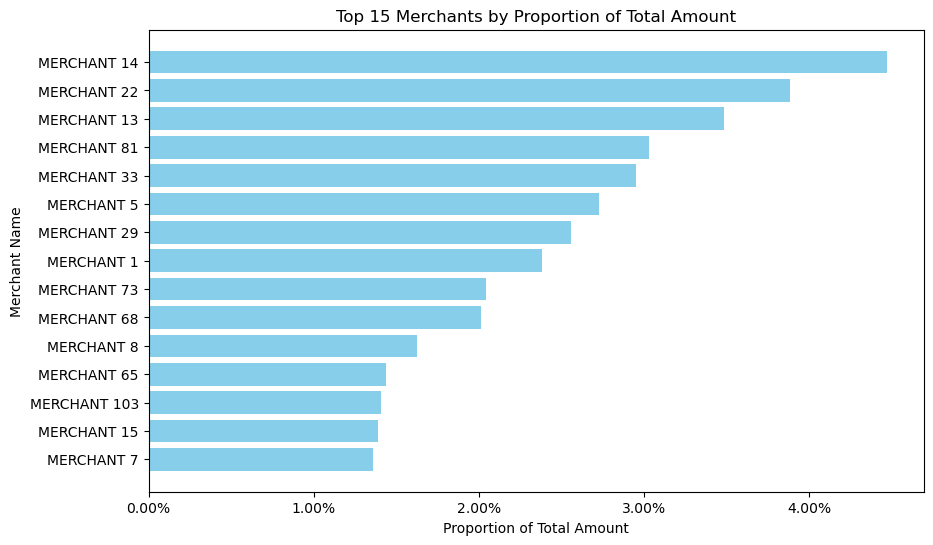

In [9]:
overall_total_amount = total_amount_per_merch['AMOUNT'].sum()

top_15 = total_amount_per_merch.head(15)

top_15['PROPORTION'] = top_15['AMOUNT'] / overall_total_amount

plt.figure(figsize=(10, 6))
plt.barh(top_15['MERCH_NAME'], top_15['PROPORTION'], color='skyblue')
plt.xlabel('Proportion of Total Amount')
plt.ylabel('Merchant Name')
plt.title('Top 15 Merchants by Proportion of Total Amount')
plt.gca().invert_yaxis()

plt.gca().get_xaxis().set_major_formatter(mticker.PercentFormatter(1.0))

plt.show()

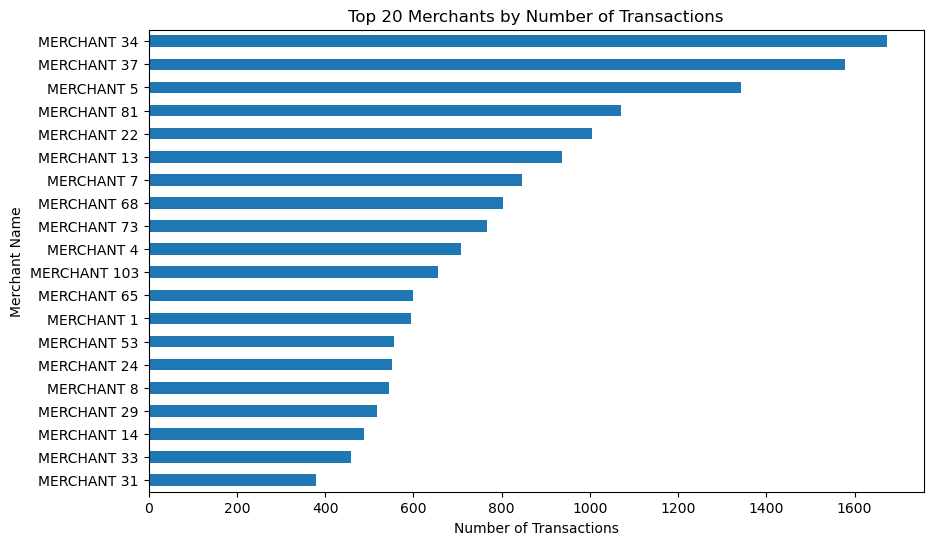

In [10]:
merchant_counts = credit_df['MERCH_NAME'].value_counts()

top_20_merchants = merchant_counts.head(20)

plt.figure(figsize=(10, 6))
top_20_merchants.plot(kind='barh')
plt.xlabel('Number of Transactions')
plt.ylabel('Merchant Name')
plt.title('Top 20 Merchants by Number of Transactions')
plt.gca().invert_yaxis()
plt.show()

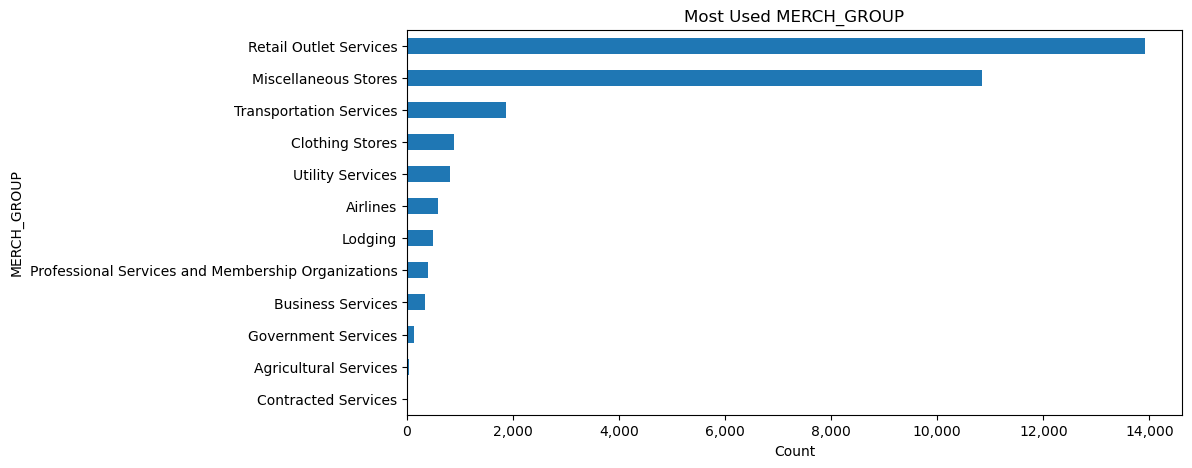

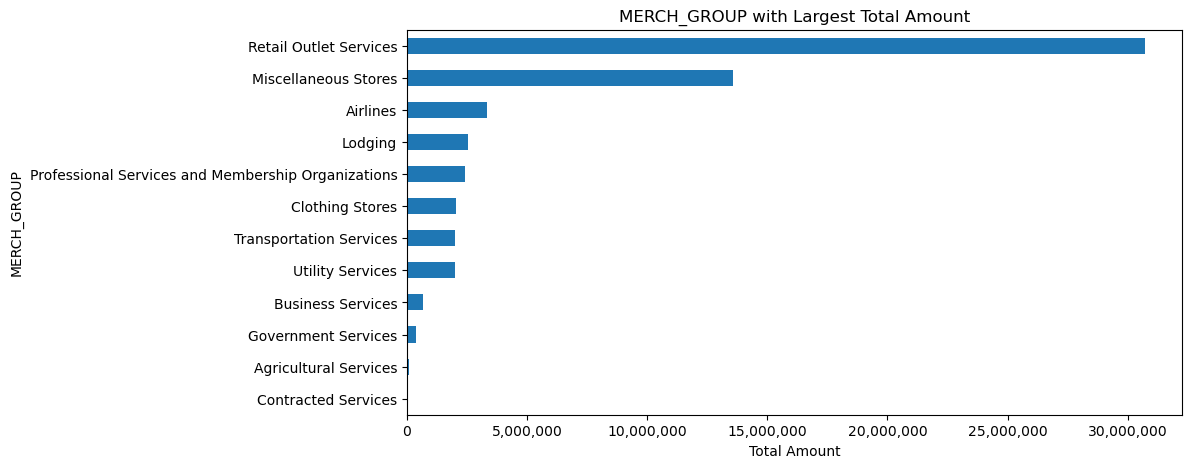

In [11]:
merch_group_counts = credit_df['MERCH_GROUP'].value_counts()

merch_group_counts = merch_group_counts.sort_values(ascending=True)

plt.figure(figsize=(10, 5))
ax = merch_group_counts.plot(kind='barh')
ax.set_title('Most Used MERCH_GROUP')
ax.set_xlabel('Count')
ax.set_ylabel('MERCH_GROUP')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

merch_group_total_amount = credit_df.groupby('MERCH_GROUP')['AMOUNT'].sum()

merch_group_total_amount = merch_group_total_amount.sort_values(ascending=True)

plt.figure(figsize=(10, 5))
ax = merch_group_total_amount.plot(kind='barh')
ax.set_title('MERCH_GROUP with Largest Total Amount')
ax.set_xlabel('Total Amount')
ax.set_ylabel('MERCH_GROUP')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

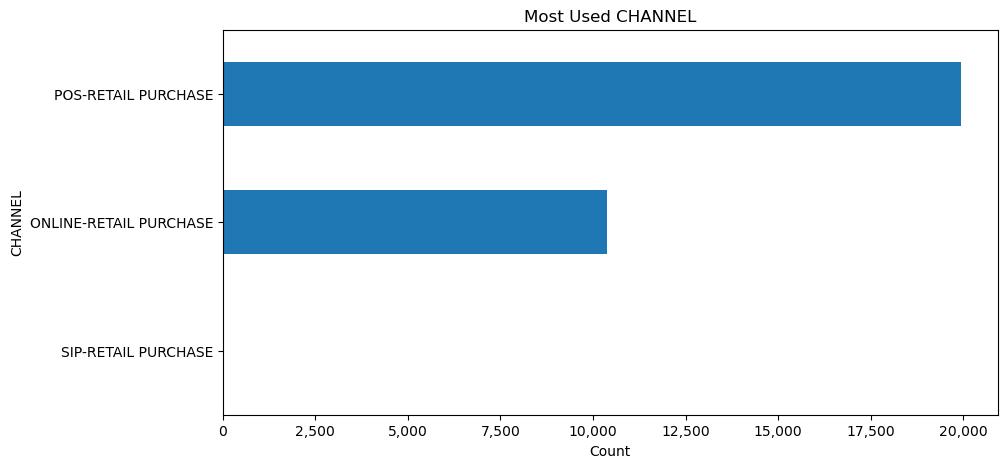

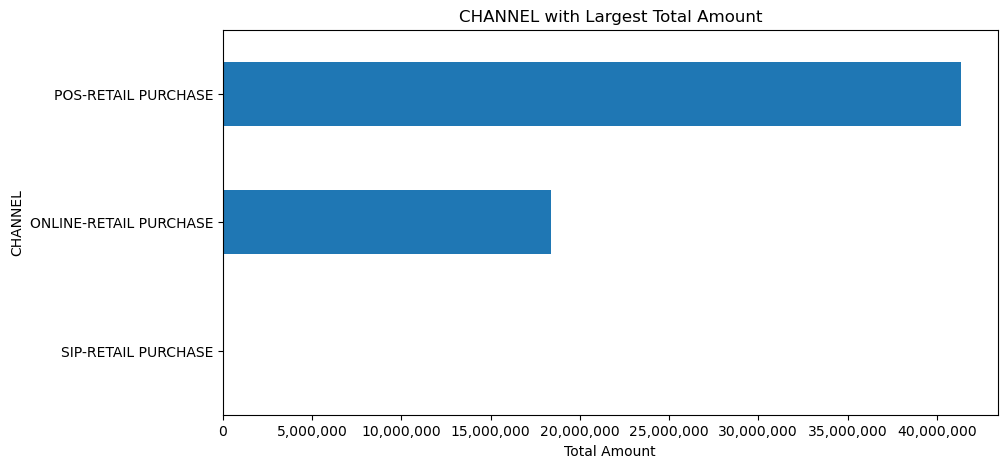

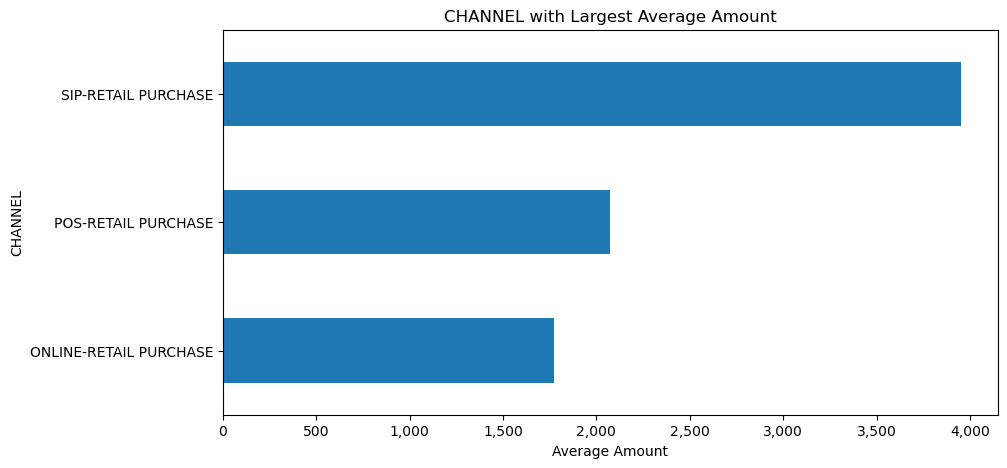

In [12]:
channel_counts = credit_df['CHANNEL'].value_counts()

channel_counts = channel_counts.sort_values(ascending=True)

plt.figure(figsize=(10, 5))
ax = channel_counts.plot(kind='barh')
ax.set_title('Most Used CHANNEL')
ax.set_xlabel('Count')
ax.set_ylabel('CHANNEL')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

channel_total_amount = credit_df.groupby('CHANNEL')['AMOUNT'].sum()

channel_total_amount = channel_total_amount.sort_values(ascending=True)

plt.figure(figsize=(10, 5))
ax = channel_total_amount.plot(kind='barh')
ax.set_title('CHANNEL with Largest Total Amount')
ax.set_xlabel('Total Amount')
ax.set_ylabel('CHANNEL')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

channel_average_amount = credit_df.groupby('CHANNEL')['AMOUNT'].mean()

channel_average_amount = channel_average_amount.sort_values(ascending=True)

plt.figure(figsize=(10, 5))
ax = channel_average_amount.plot(kind='barh')
ax.set_title('CHANNEL with Largest Average Amount')
ax.set_xlabel('Average Amount')
ax.set_ylabel('CHANNEL')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

In [13]:
credit_df['TRANSACTION_COUNT'] = 1

grouped_by_customer = credit_df.groupby('CUST_NUM').agg({
    'AMOUNT': ['sum', 'mean'],
    'MERCH_NAME': lambda x: x.mode().iloc[0],
    'MERCH_GROUP': lambda x: x.mode().iloc[0],
    'CHANNEL': lambda x: x.mode().iloc[0],
    'TRANSACTION_COUNT': 'sum'
}).reset_index()

grouped_by_customer.columns = ['CUST_NUM', 'TOTAL_AMOUNT', 'AVERAGE_AMOUNT', 'PREFERED_MERCH_NAME', 'PREFERED_MERCH_GROUP', 'PREFERRED_CHANNEL', 'TRANSACTION_COUNT']

credit_df_by_customer = grouped_by_customer.copy()

credit_df_by_customer.head()

CUST_NUM  TOTAL_AMOUNT  AVERAGE_AMOUNT PREFERED_MERCH_NAME  \
0  206.450963  62102.715245    31051.357622       MERCHANT 2601   
1  362.331340  37549.343106     3129.111925         MERCHANT 33   
2  565.598798  20881.381549     4176.276310        MERCHANT 620   
3  658.971927  17923.512310     2560.501759         MERCHANT 22   
4  726.733789  14729.502327     1636.611370          MERCHANT 1   

                                PREFERED_MERCH_GROUP       PREFERRED_CHANNEL  \
0  Professional Services and Membership Organizat...  ONLINE-RETAIL PURCHASE   
1                               Miscellaneous Stores     POS-RETAIL PURCHASE   
2                             Retail Outlet Services     POS-RETAIL PURCHASE   
3                             Retail Outlet Services     POS-RETAIL PURCHASE   
4                             Retail Outlet Services     POS-RETAIL PURCHASE   

   TRANSACTION_COUNT  
0                  2  
1                 12  
2                  5  
3                  7  
4                  9

In [14]:
credit_by_customer_merged_df = pd.merge(credit_df_by_customer, customer_df, on='CUST_NUM', how='inner')

credit_by_customer_merged_df.head()

CUST_NUM  TOTAL_AMOUNT  AVERAGE_AMOUNT PREFERED_MERCH_NAME  \
0  206.450963  62102.715245    31051.357622       MERCHANT 2601   
1  362.331340  37549.343106     3129.111925         MERCHANT 33   
2  565.598798  20881.381549     4176.276310        MERCHANT 620   
3  658.971927  17923.512310     2560.501759         MERCHANT 22   
4  726.733789  14729.502327     1636.611370          MERCHANT 1   

                                PREFERED_MERCH_GROUP       PREFERRED_CHANNEL  \
0  Professional Services and Membership Organizat...  ONLINE-RETAIL PURCHASE   
1                               Miscellaneous Stores     POS-RETAIL PURCHASE   
2                             Retail Outlet Services     POS-RETAIL PURCHASE   
3                             Retail Outlet Services     POS-RETAIL PURCHASE   
4                             Retail Outlet Services     POS-RETAIL PURCHASE   

   TRANSACTION_COUNT        PROVINCE                                  REGION  \
0                  2     NUEVA ECIJA              REGION III (CENTRAL LUZON)   
1                 12  SOUTH COTABATO               REGION XII (SOCCSKSARGEN)   
2                  5         BENGUET  CORDILLERA ADMINISTRATIVE REGION (CAR)   
3                  7  DAVAO ORIENTAL                REGION XI (DAVAO REGION)   
4                  9         CAGAYAN              REGION II (CAGAYAN VALLEY)   

  EDUCATION   AGE     TENURE BUSINESS_OWNER DIGITAL_FLAG INCOME_SOURCE  \
0       MID  37.0  12.166667              N      DIGITAL        SALARY   
1   NO_DATA  36.0   0.750000              N  TRADITIONAL        SALARY   
2       MID  37.0   8.750000              N      DIGITAL        SALARY   
3       MID  34.0   3.500000              N      DIGITAL        SALARY   
4       MID  58.0   7.833333              N  TRADITIONAL        SALARY   

   IDV_OR_ORG  SEGMENT SUBSEGMENT  GENDER MARITAL_STATUS  
0           1        3  CORE MASS  FEMALE         SINGLE  
1           1        3  CORE MASS    MALE        MARRIED  
2           1        3  CORE MASS  FEMALE         SINGLE  
3           1        3  CORE MASS    MALE         SINGLE  
4           1        3  CORE MASS  FEMALE         SINGLE

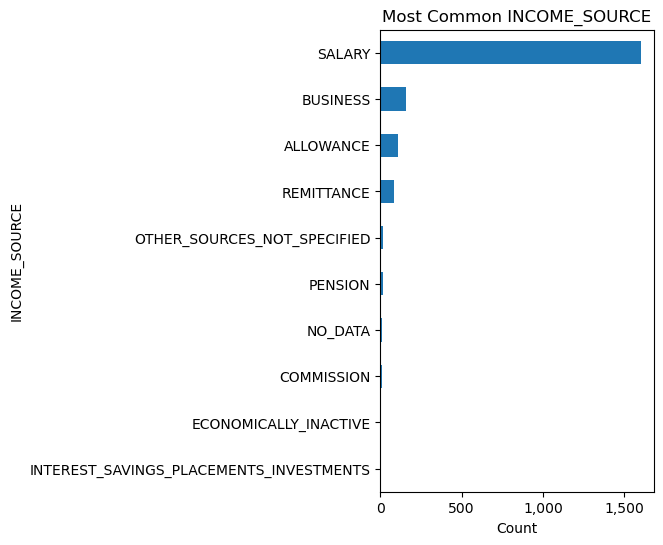

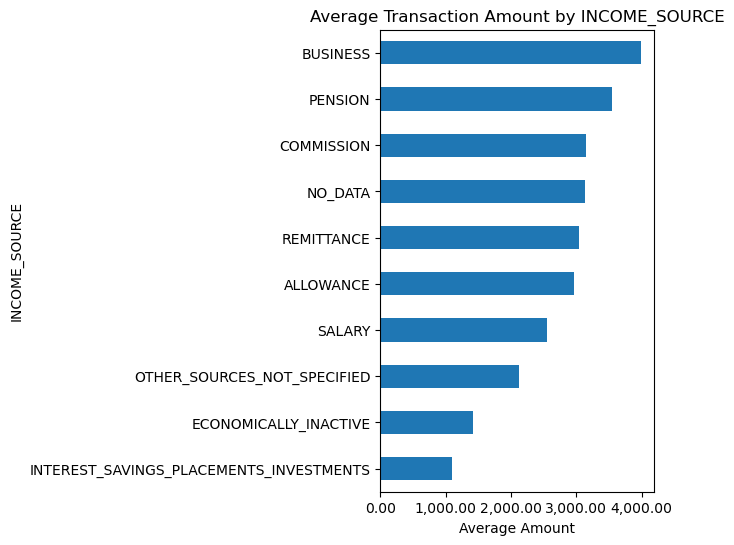

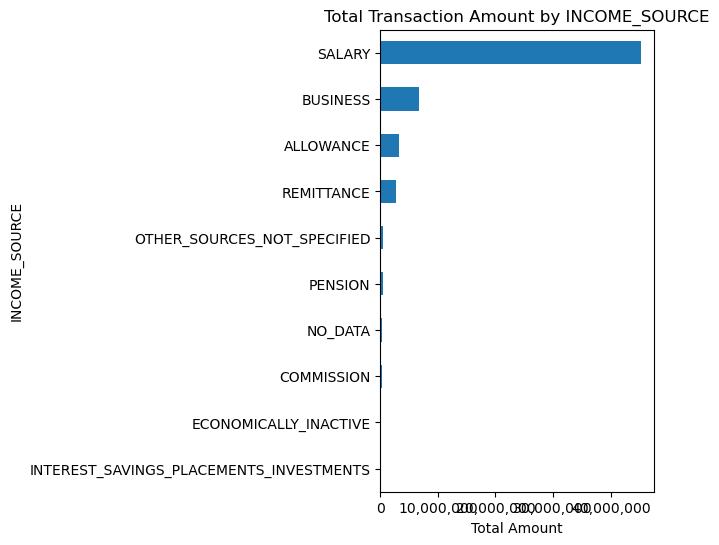

In [15]:
credit_by_customer_merged_income_filtered_df = credit_by_customer_merged_df[credit_by_customer_merged_df['INCOME_SOURCE'] != 'NO_DATA']

income_source_counts = credit_by_customer_merged_df['INCOME_SOURCE'].value_counts()

income_source_counts = income_source_counts.sort_values(ascending=True)

plt.figure(figsize=(12, 6))
plt.subplot(131)
ax1 = income_source_counts.plot(kind='barh')
ax1.set_title('Most Common INCOME_SOURCE')
ax1.set_xlabel('Count')
ax1.set_ylabel('INCOME_SOURCE')

ax1.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

income_source_avg_amount = credit_by_customer_merged_df.groupby('INCOME_SOURCE')['AVERAGE_AMOUNT'].mean()

income_source_avg_amount = income_source_avg_amount.sort_values(ascending=True)

plt.figure(figsize=(12, 6))
plt.subplot(132)
ax2 = income_source_avg_amount.plot(kind='barh')
ax2.set_title('Average Transaction Amount by INCOME_SOURCE')
ax2.set_xlabel('Average Amount')
ax2.set_ylabel('INCOME_SOURCE')

ax2.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.2f}'))
plt.show()

income_source_total_amount = credit_by_customer_merged_df.groupby('INCOME_SOURCE')['TOTAL_AMOUNT'].sum()

income_source_total_amount = income_source_total_amount.sort_values(ascending=True)

plt.figure(figsize=(12, 6))
plt.subplot(133)
ax3 = income_source_total_amount.plot(kind='barh')
ax3.set_title('Total Transaction Amount by INCOME_SOURCE')
ax3.set_xlabel('Total Amount')
ax3.set_ylabel('INCOME_SOURCE')

ax3.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

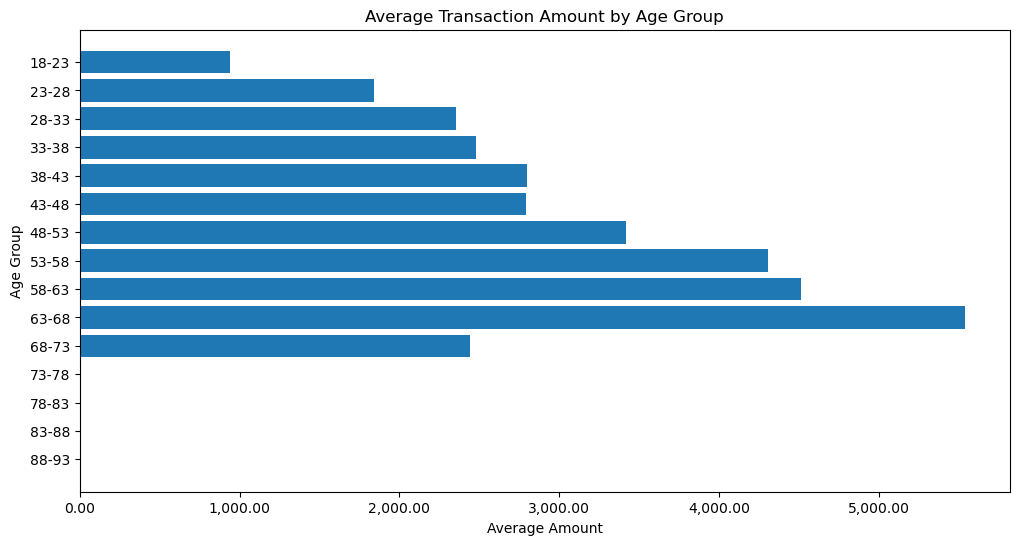

In [16]:
age_bins = [18, 23]
while age_bins[-1] < 93:
    next_bin = age_bins[-1] + 5
    age_bins.append(next_bin)

avg_amount_by_age = []
for i in range(len(age_bins) - 1):
    bin_start = age_bins[i]
    bin_end = age_bins[i + 1]
    bin_data = credit_by_customer_merged_df[
        (credit_by_customer_merged_df['AGE'] >= bin_start) &
        (credit_by_customer_merged_df['AGE'] < bin_end)
    ]
    if len(bin_data) >= 5:
        avg_amount = bin_data['AVERAGE_AMOUNT'].mean()
    else:
        avg_amount = 0
    avg_amount_by_age.append(avg_amount)

age_labels = [f'{start}-{end}' for start, end in zip(age_bins[:-1], age_bins[1:])]

plt.figure(figsize=(12, 6))
ax = plt.barh(age_labels, avg_amount_by_age)
plt.title('Average Transaction Amount by Age Group')
plt.xlabel('Average Amount')
plt.ylabel('Age Group')

plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.2f}'))
plt.show()

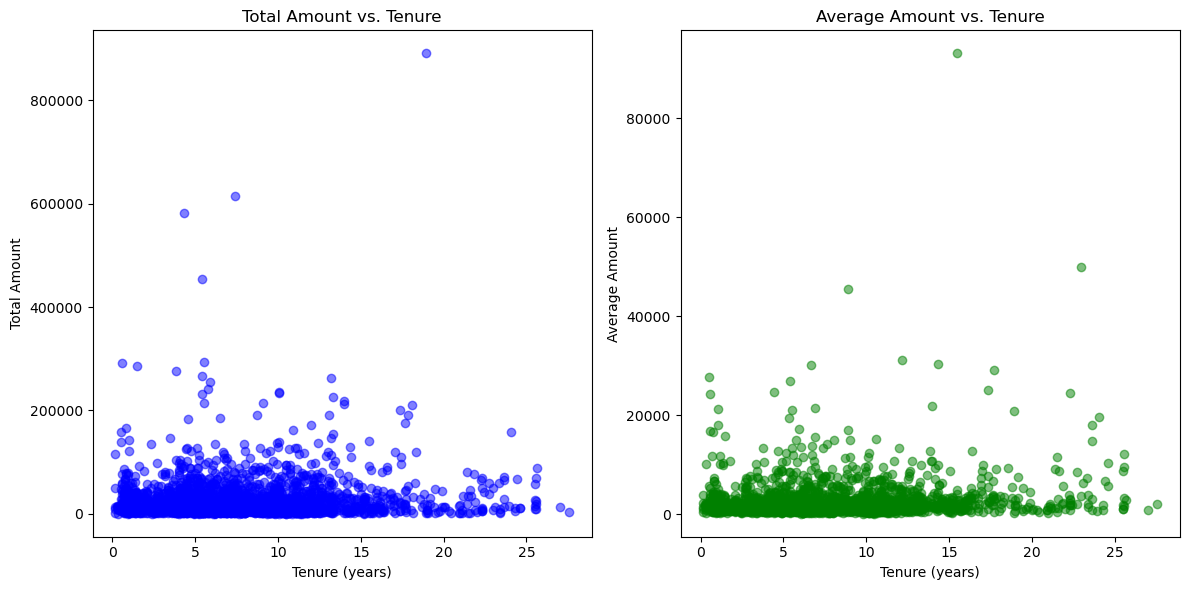

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(credit_by_customer_merged_df['TENURE'], credit_by_customer_merged_df['TOTAL_AMOUNT'], color='blue', alpha=0.5)
plt.xlabel('Tenure (years)')
plt.ylabel('Total Amount')
plt.title('Total Amount vs. Tenure')

plt.subplot(1, 2, 2)
plt.scatter(credit_by_customer_merged_df['TENURE'], credit_by_customer_merged_df['AVERAGE_AMOUNT'], color='green', alpha=0.5)
plt.xlabel('Tenure (years)')
plt.ylabel('Average Amount')
plt.title('Average Amount vs. Tenure')

plt.tight_layout()
plt.show()

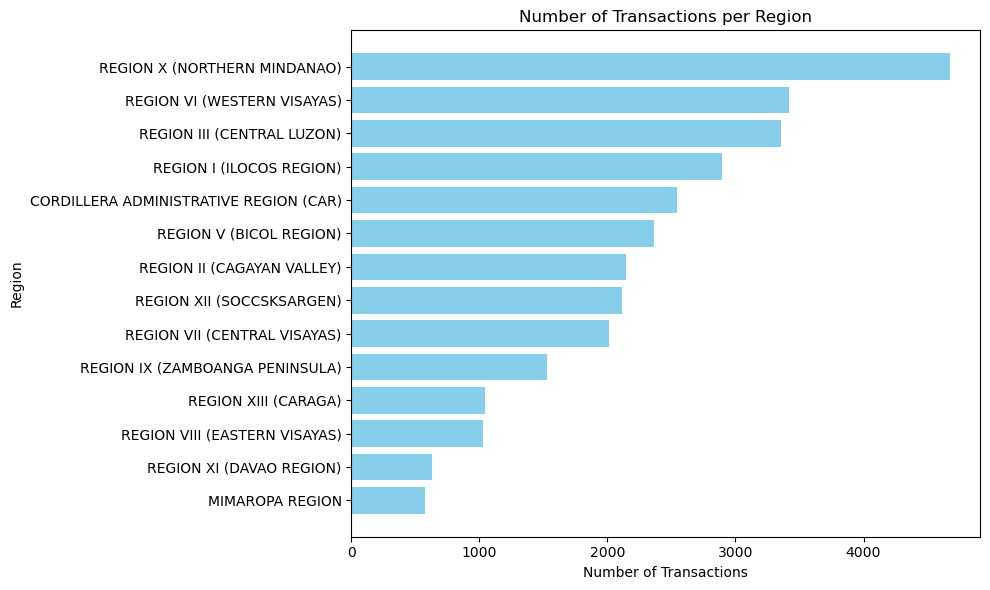

In [18]:
region_transaction_count = credit_by_customer_merged_df.groupby('REGION')['TRANSACTION_COUNT'].sum().reset_index()

region_transaction_count = region_transaction_count.sort_values(by='TRANSACTION_COUNT', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(region_transaction_count['REGION'], region_transaction_count['TRANSACTION_COUNT'], color='skyblue')
plt.xlabel('Number of Transactions')
plt.ylabel('Region')
plt.title('Number of Transactions per Region')
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

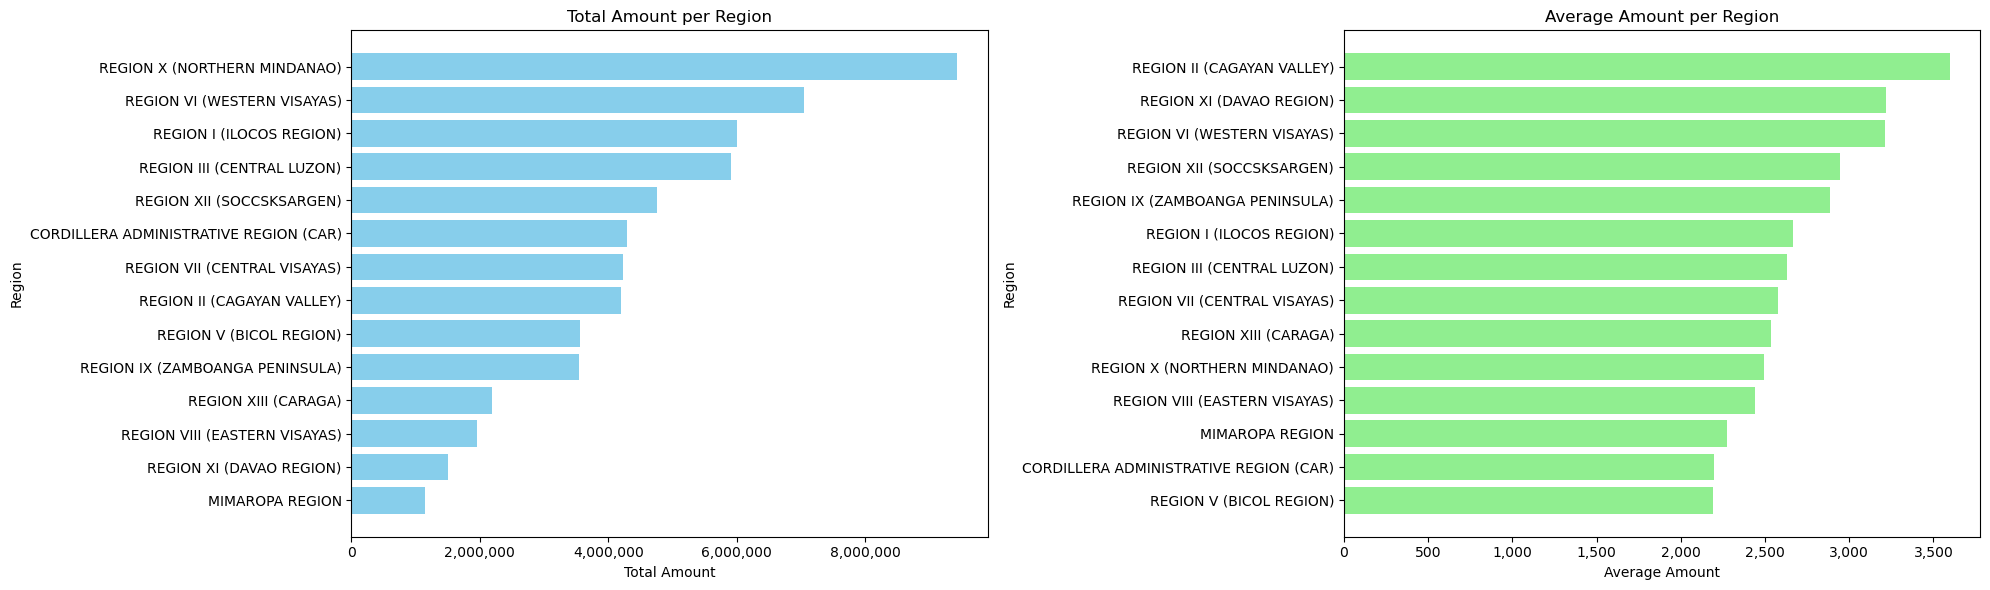

In [19]:
region_total_amount = credit_by_customer_merged_df.groupby('REGION')['TOTAL_AMOUNT'].sum().reset_index()
region_average_amount = credit_by_customer_merged_df.groupby('REGION')['AVERAGE_AMOUNT'].mean().reset_index()

region_total_amount = region_total_amount.sort_values(by='TOTAL_AMOUNT', ascending=False)
region_average_amount = region_average_amount.sort_values(by='AVERAGE_AMOUNT', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

def format_with_commas(x, pos):
    return "{:,}".format(int(x))

ax1.barh(region_total_amount['REGION'], region_total_amount['TOTAL_AMOUNT'], color='skyblue')
ax1.set_xlabel('Total Amount')
ax1.set_ylabel('Region')
ax1.set_title('Total Amount per Region')
ax1.invert_yaxis()
ax1.xaxis.set_major_formatter(mticker.FuncFormatter(format_with_commas))

ax2.barh(region_average_amount['REGION'], region_average_amount['AVERAGE_AMOUNT'], color='lightgreen')
ax2.set_xlabel('Average Amount')
ax2.set_ylabel('Region')
ax2.set_title('Average Amount per Region')
ax2.invert_yaxis()
ax2.xaxis.set_major_formatter(mticker.FuncFormatter(format_with_commas))

plt.tight_layout()

plt.show()

### **DEBIT PURCHASE TRANSACTIONS**

In [20]:
debit_df['TRANSACTION_COUNT'] = 1

debit_df = debit_df.dropna()

grouped_by_customer = debit_df.groupby('CUST_NUM').agg({
    'AMOUNT': ['sum', 'mean'],
    'CHANNEL': lambda x: x.mode().iloc[0],
    'TRANSACTION_COUNT': 'sum'
}).reset_index()

grouped_by_customer.columns = ['CUST_NUM', 'TOTAL_AMOUNT', 'AVERAGE_AMOUNT', 'PREFERRED_CHANNEL', 'TRANSACTION_COUNT']

debit_df_by_customer = grouped_by_customer.copy()

debit_df_by_customer

CUST_NUM   TOTAL_AMOUNT  AVERAGE_AMOUNT PREFERRED_CHANNEL  \
0         85.229103   50184.154417     7169.164917               POS   
1         96.457244    1004.822167      334.940722               POS   
2        107.814656   66438.521626     5110.655510               POS   
3        185.854782  236491.443096     5499.801002               POS   
4        187.360615    6155.534506      683.948278         ECOMMERCE   
...             ...            ...             ...               ...   
25613  14138.891187   70011.149742     4118.302926               POS   
25614  14139.061638   31574.984106     2870.453101               POS   
25615  14139.571564   10011.208531     1430.172647               POS   
25616  14140.050354  248488.739214     8568.577214               POS   
25617  14141.980201    4438.496233      887.699247               POS   

       TRANSACTION_COUNT  
0                      7  
1                      3  
2                     13  
3                     43  
4                      9  
...                  ...  
25613                 17  
25614                 11  
25615                  7  
25616                 29  
25617                  5  

[25618 rows x 5 columns]

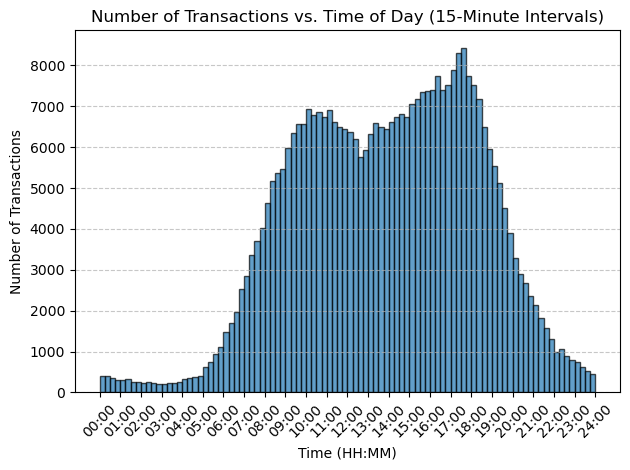

In [21]:
debit_df['TIME'] = debit_df['TIME'] / 60

bin_edges = range(0, 24 * 60 + 15, 15)

plt.hist(debit_df['TIME'], bins=bin_edges, edgecolor='k', alpha=0.7)

plt.xlabel('Time (HH:MM)')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions vs. Time of Day (15-Minute Intervals)')

plt.xticks(range(0, 24 * 60 + 15, 60), [f'{h:02d}:00' for h in range(25)], rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

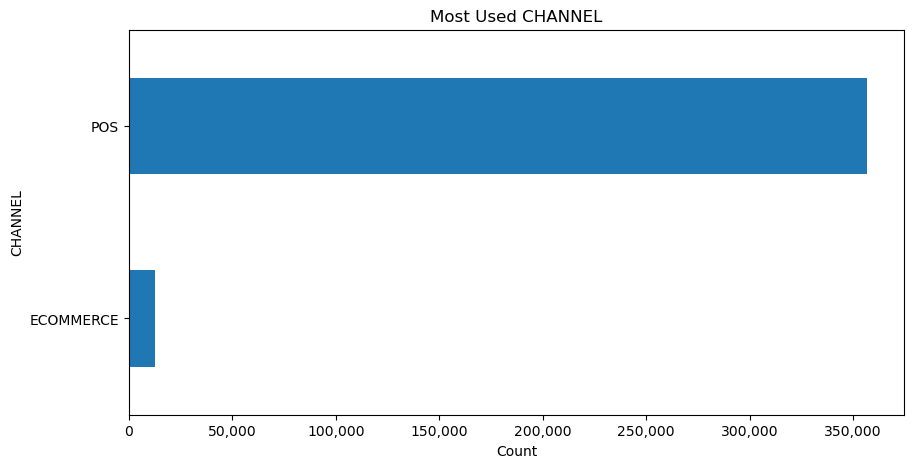

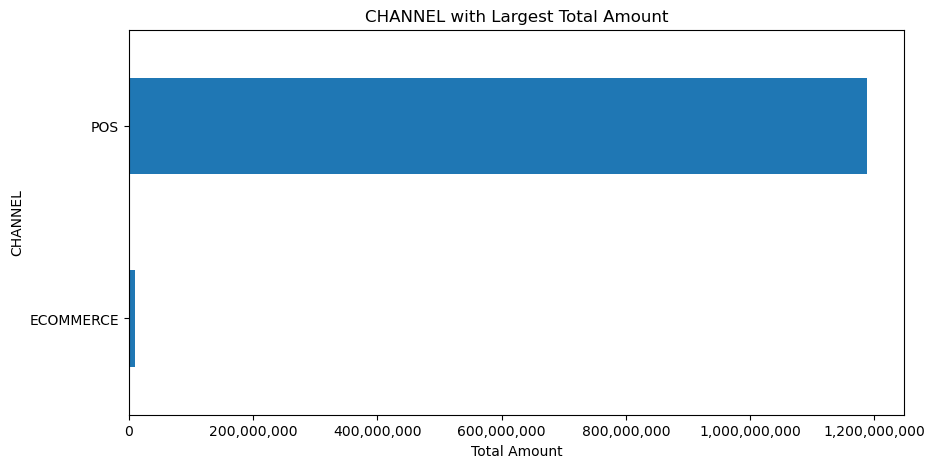

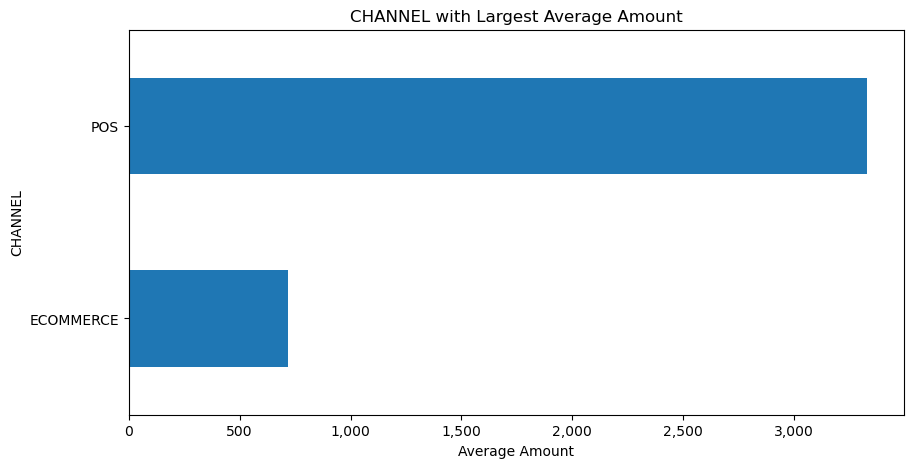

In [22]:
channel_counts = debit_df['CHANNEL'].value_counts()

channel_counts = channel_counts.sort_values(ascending=True)

plt.figure(figsize=(10, 5))
ax = channel_counts.plot(kind='barh')
ax.set_title('Most Used CHANNEL')
ax.set_xlabel('Count')
ax.set_ylabel('CHANNEL')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

channel_total_amount = debit_df.groupby('CHANNEL')['AMOUNT'].sum()

channel_total_amount = channel_total_amount.sort_values(ascending=True)

plt.figure(figsize=(10, 5))
ax = channel_total_amount.plot(kind='barh')
ax.set_title('CHANNEL with Largest Total Amount')
ax.set_xlabel('Total Amount')
ax.set_ylabel('CHANNEL')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

channel_average_amount = debit_df.groupby('CHANNEL')['AMOUNT'].mean()

channel_average_amount = channel_average_amount.sort_values(ascending=True)

plt.figure(figsize=(10, 5))
ax = channel_average_amount.plot(kind='barh')
ax.set_title('CHANNEL with Largest Average Amount')
ax.set_xlabel('Average Amount')
ax.set_ylabel('CHANNEL')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

In [23]:
debit_df_customer_merged_df = pd.merge(debit_df_by_customer, customer_df, on='CUST_NUM', how='inner')

debit_df_customer_merged_df

CUST_NUM   TOTAL_AMOUNT  AVERAGE_AMOUNT PREFERRED_CHANNEL  \
0         85.229103   50184.154417     7169.164917               POS   
1         96.457244    1004.822167      334.940722               POS   
2        107.814656   66438.521626     5110.655510               POS   
3        185.854782  236491.443096     5499.801002               POS   
4        187.360615    6155.534506      683.948278         ECOMMERCE   
...             ...            ...             ...               ...   
25608  14138.891187   70011.149742     4118.302926               POS   
25609  14139.061638   31574.984106     2870.453101               POS   
25610  14139.571564   10011.208531     1430.172647               POS   
25611  14140.050354  248488.739214     8568.577214               POS   
25612  14141.980201    4438.496233      887.699247               POS   

       TRANSACTION_COUNT                        PROVINCE  \
0                      7                  SOUTH COTABATO   
1                      3                 LANAO DEL NORTE   
2                     13               NEGROS OCCIDENTAL   
3                     43             ZAMBOANGA DEL NORTE   
4                      9                          TARLAC   
...                  ...                             ...   
25608                 17               NEGROS OCCIDENTAL   
25609                 11  COTABATO CITY (NOT A PROVINCE)   
25610                  7                         BENGUET   
25611                 29               ZAMBOANGA DEL SUR   
25612                  5                MISAMIS ORIENTAL   

                                       REGION EDUCATION   AGE    TENURE  \
0                   REGION XII (SOCCSKSARGEN)   NO_DATA  32.0  1.250000   
1                REGION X (NORTHERN MINDANAO)   NO_DATA  34.0  0.083333   
2                 REGION VI (WESTERN VISAYAS)       MID  44.0  3.833333   
3             REGION IX (ZAMBOANGA PENINSULA)       MID  32.0  7.666667   
4                  REGION III (CENTRAL LUZON)       MID  24.0  0.166667   
...                                       ...       ...   ...       ...   
25608             REGION VI (WESTERN VISAYAS)       LOW  36.0  3.500000   
25609               REGION XII (SOCCSKSARGEN)   NO_DATA  46.0  1.333333   
25610  CORDILLERA ADMINISTRATIVE REGION (CAR)   NO_DATA  40.0  0.666667   
25611         REGION IX (ZAMBOANGA PENINSULA)       MID  44.0  4.083333   
25612            REGION X (NORTHERN MINDANAO)       MID  36.0  4.666667   

      BUSINESS_OWNER DIGITAL_FLAG INCOME_SOURCE  IDV_OR_ORG  SEGMENT  \
0                  N  TRADITIONAL    REMITTANCE           1        3   
1                  N  TRADITIONAL        SALARY           1        3   
2                  N  TRADITIONAL        SALARY           1        3   
3                  N  TRADITIONAL        SALARY           1        3   
4                  N      DIGITAL        SALARY           1        3   
...              ...          ...           ...         ...      ...   
25608              N  TRADITIONAL        SALARY           1        3   
25609              N      DIGITAL        SALARY           1        3   
25610              N  TRADITIONAL      BUSINESS           1        3   
25611              Y  TRADITIONAL      BUSINESS           1        3   
25612              N  TRADITIONAL        SALARY           1        3   

      SUBSEGMENT  GENDER MARITAL_STATUS  
0      CORE MASS  FEMALE         SINGLE  
1      CORE MASS    MALE         SINGLE  
2      CORE MASS    MALE         SINGLE  
3      CORE MASS  FEMALE         SINGLE  
4      CORE MASS    MALE         SINGLE  
...          ...     ...            ...  
25608  CORE MASS  FEMALE         SINGLE  
25609  CORE MASS    MALE         SINGLE  
25610  CORE MASS  FEMALE         SINGLE  
25611  CORE MASS  FEMALE         SINGLE  
25612  CORE MASS  FEMALE        MARRIED  

[25613 rows x 18 columns]

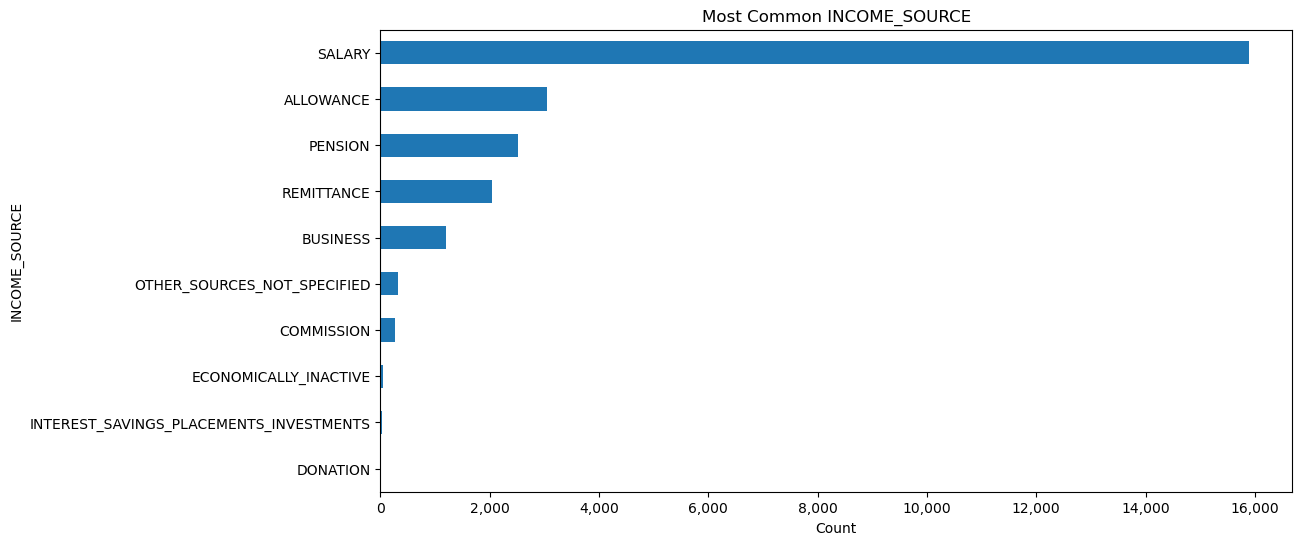

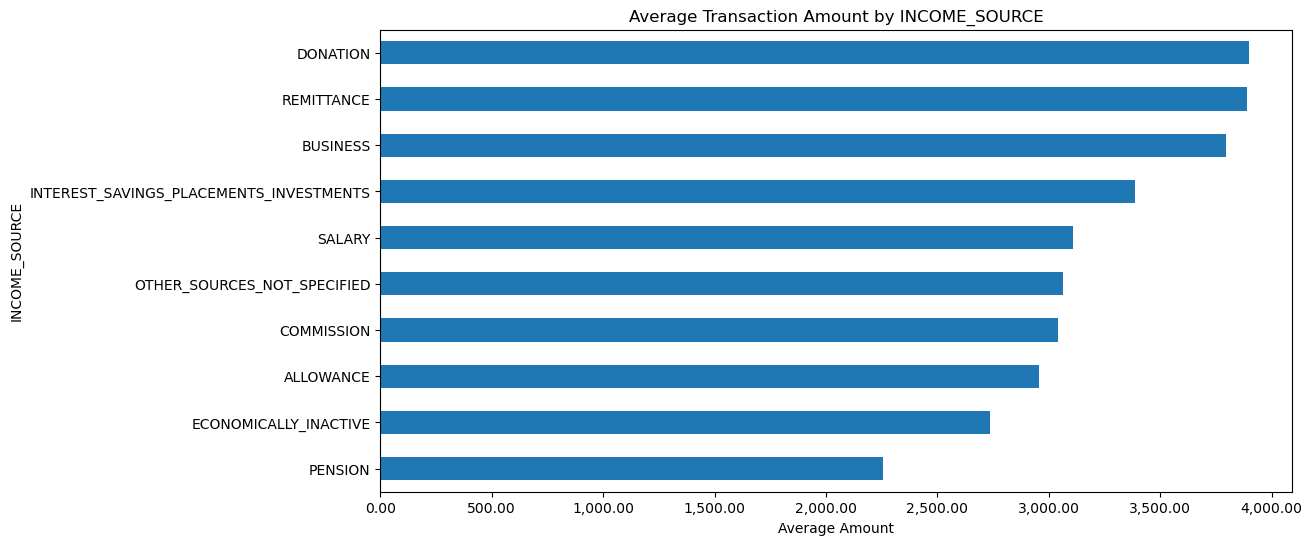

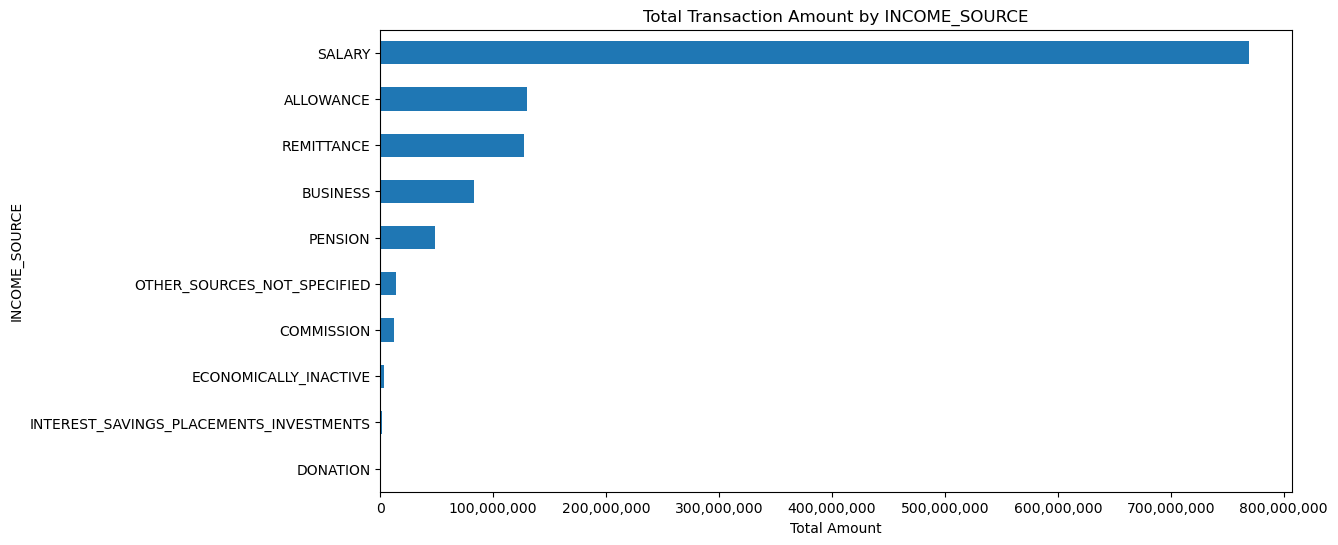

In [24]:
debit_df_customer_merged_income_filtered_df = debit_df_customer_merged_df[debit_df_customer_merged_df['INCOME_SOURCE'] != 'NO_DATA']

income_source_counts = debit_df_customer_merged_income_filtered_df['INCOME_SOURCE'].value_counts()

income_source_counts = income_source_counts.sort_values(ascending=True)

plt.figure(figsize=(40, 6))
plt.subplot(131)
ax1 = income_source_counts.plot(kind='barh')
ax1.set_title('Most Common INCOME_SOURCE')
ax1.set_xlabel('Count')
ax1.set_ylabel('INCOME_SOURCE')

ax1.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

income_source_avg_amount = debit_df_customer_merged_income_filtered_df.groupby('INCOME_SOURCE')['AVERAGE_AMOUNT'].mean()

income_source_avg_amount = income_source_avg_amount.sort_values(ascending=True)

plt.figure(figsize=(40, 6))
plt.subplot(132)
ax2 = income_source_avg_amount.plot(kind='barh')
ax2.set_title('Average Transaction Amount by INCOME_SOURCE')
ax2.set_xlabel('Average Amount')
ax2.set_ylabel('INCOME_SOURCE')

ax2.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.2f}'))
plt.show()

income_source_total_amount = debit_df_customer_merged_income_filtered_df.groupby('INCOME_SOURCE')['TOTAL_AMOUNT'].sum()

income_source_total_amount = income_source_total_amount.sort_values(ascending=True)

plt.figure(figsize=(40, 6))
plt.subplot(133)
ax3 = income_source_total_amount.plot(kind='barh')
ax3.set_title('Total Transaction Amount by INCOME_SOURCE')
ax3.set_xlabel('Total Amount')
ax3.set_ylabel('INCOME_SOURCE')

ax3.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

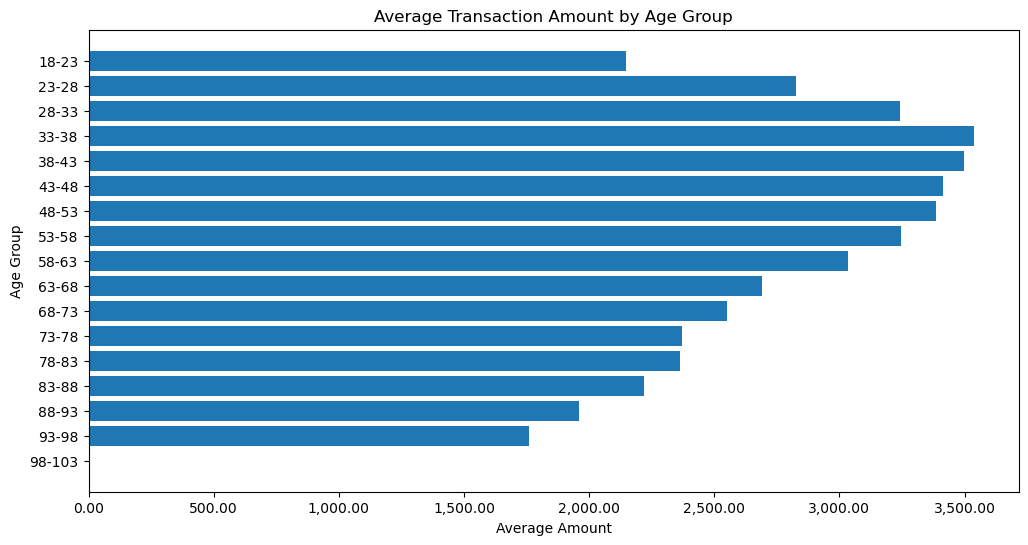

In [25]:
age_bins = [18, 23]
while age_bins[-1] < 103:
    next_bin = age_bins[-1] + 5
    age_bins.append(next_bin)

avg_amount_by_age = []
for i in range(len(age_bins) - 1):
    bin_start = age_bins[i]
    bin_end = age_bins[i + 1]
    bin_data = debit_df_customer_merged_df[
        (debit_df_customer_merged_df['AGE'] >= bin_start) &
        (debit_df_customer_merged_df['AGE'] < bin_end)
    ]
    if len(bin_data) >= 5:
        avg_amount = bin_data['AVERAGE_AMOUNT'].mean()
    else:
        avg_amount = 0
    avg_amount_by_age.append(avg_amount)

age_labels = [f'{start}-{end}' for start, end in zip(age_bins[:-1], age_bins[1:])]

plt.figure(figsize=(12, 6))
ax = plt.barh(age_labels, avg_amount_by_age)
plt.title('Average Transaction Amount by Age Group')
plt.xlabel('Average Amount')
plt.ylabel('Age Group')

plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.2f}'))
plt.show()

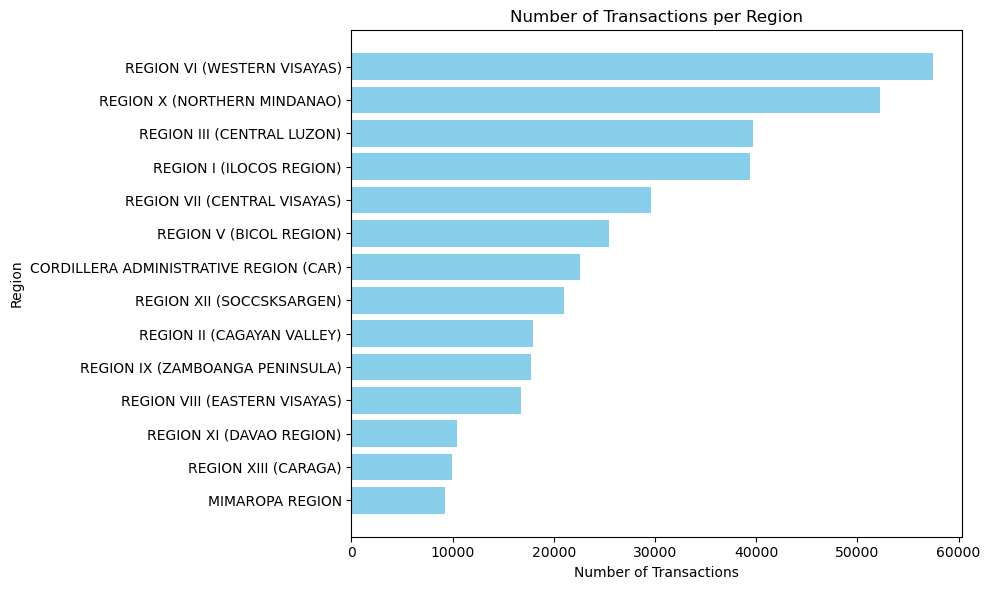

In [26]:
region_transaction_count = debit_df_customer_merged_df.groupby('REGION')['TRANSACTION_COUNT'].sum().reset_index()

region_transaction_count = region_transaction_count.sort_values(by='TRANSACTION_COUNT', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(region_transaction_count['REGION'], region_transaction_count['TRANSACTION_COUNT'], color='skyblue')
plt.xlabel('Number of Transactions')
plt.ylabel('Region')
plt.title('Number of Transactions per Region')
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

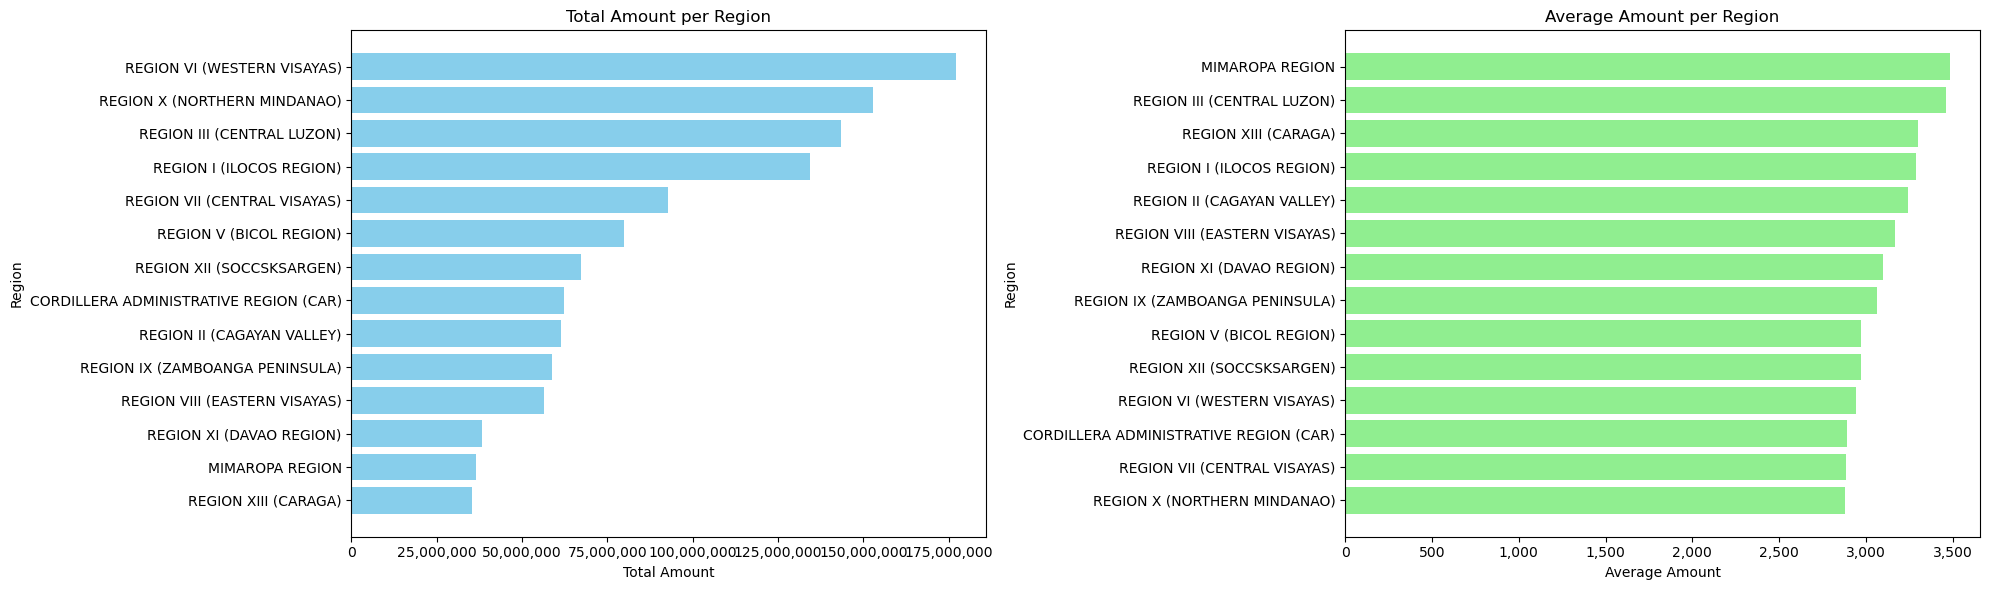

In [27]:
region_total_amount = debit_df_customer_merged_df.groupby('REGION')['TOTAL_AMOUNT'].sum().reset_index()
region_average_amount = debit_df_customer_merged_df.groupby('REGION')['AVERAGE_AMOUNT'].mean().reset_index()

region_total_amount = region_total_amount.sort_values(by='TOTAL_AMOUNT', ascending=False)
region_average_amount = region_average_amount.sort_values(by='AVERAGE_AMOUNT', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

def format_with_commas(x, pos):
    return "{:,}".format(int(x))

ax1.barh(region_total_amount['REGION'], region_total_amount['TOTAL_AMOUNT'], color='skyblue')
ax1.set_xlabel('Total Amount')
ax1.set_ylabel('Region')
ax1.set_title('Total Amount per Region')
ax1.invert_yaxis()
ax1.xaxis.set_major_formatter(mticker.FuncFormatter(format_with_commas))

ax2.barh(region_average_amount['REGION'], region_average_amount['AVERAGE_AMOUNT'], color='lightgreen')
ax2.set_xlabel('Average Amount')
ax2.set_ylabel('Region')
ax2.set_title('Average Amount per Region')
ax2.invert_yaxis()
ax2.xaxis.set_major_formatter(mticker.FuncFormatter(format_with_commas))

plt.tight_layout()

plt.show()

### **FINANCIAL DIGITAL TRANSACTIONS**

In [28]:
financial_df['TRANSACTION_COUNT'] = 1

financial_df = financial_df.dropna()

grouped_by_customer = financial_df.groupby('CUST_NUM').agg({
    'AMOUNT': ['sum', 'mean'],
    'CHANNEL': lambda x: x.mode().iloc[0],
    'TRAN_TYPE': lambda x: x.mode().iloc[0],
    'TRANSACTION_COUNT': 'sum'
}).reset_index()

grouped_by_customer.columns = ['CUST_NUM', 'TOTAL_AMOUNT', 'AVERAGE_AMOUNT' ,'PREFERRED_CHANNEL', 'PREFERRED_TRAN_TYPE', 'TRANSACTION_COUNT']

financial_df_by_customer = grouped_by_customer.copy()

financial_df_by_customer.head()

CUST_NUM  TOTAL_AMOUNT  AVERAGE_AMOUNT PREFERRED_CHANNEL  \
0  107.814656  23682.085967     3947.014328               WEB   
1  187.360615   3120.851302     1040.283767            MOBILE   
2  206.450963  49780.514283     9956.102857            MOBILE   
3  220.508503  46004.061262     6572.008752               WEB   
4  310.618737   7439.726666      572.286667            MOBILE   

  PREFERRED_TRAN_TYPE  TRANSACTION_COUNT  
0            E-WALLET                  6  
1            E-WALLET                  3  
2       BILLS PAYMENT                  5  
3            E-WALLET                  7  
4            E-WALLET                 13

In [29]:
financial_df['DATE_AND_TIME'] = pd.to_datetime(financial_df['DATE_AND_TIME'])

financial_df['TIME'] = (financial_df['DATE_AND_TIME'] - financial_df['DATE_AND_TIME'].dt.normalize()).dt.total_seconds()

financial_df.head()

CUST_NUM       AMOUNT       DATE_AND_TIME CHANNEL      TRAN_TYPE  \
0   4418.325475  2000.885936 2023-04-01 07:55:10  MOBILE       E-WALLET   
1   4418.325475  2000.407658 2023-04-01 07:54:01  MOBILE       E-WALLET   
2   4418.325475  9829.356544 2023-04-14 11:04:20  MOBILE  BILLS PAYMENT   
3   7356.780546  2000.575996 2023-04-11 09:41:43  MOBILE       E-WALLET   
4  10768.575579   100.667732 2023-04-02 20:36:51     WEB       E-WALLET   

   TRANSACTION_COUNT     TIME  
0                  1  28510.0  
1                  1  28441.0  
2                  1  39860.0  
3                  1  34903.0  
4                  1  74211.0

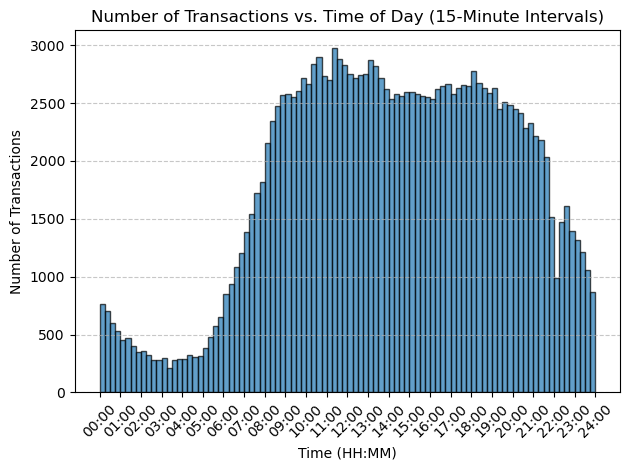

In [30]:
financial_df['TIME'] = financial_df['TIME'] / 60

bin_edges = range(0, 24 * 60 + 15, 15)

plt.hist(financial_df['TIME'], bins=bin_edges, edgecolor='k', alpha=0.7)

plt.xlabel('Time (HH:MM)')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions vs. Time of Day (15-Minute Intervals)')

plt.xticks(range(0, 24 * 60 + 15, 60), [f'{h:02d}:00' for h in range(25)], rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

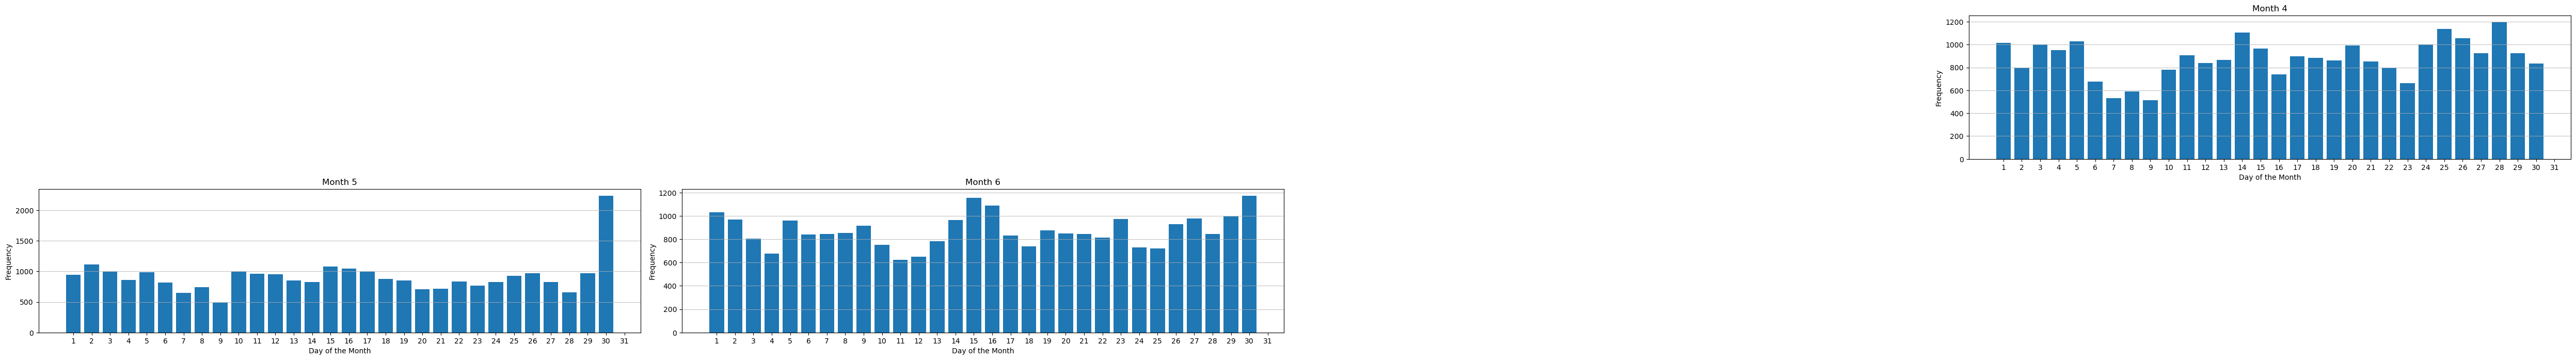

In [31]:
incoming_df['DATE'] = pd.to_datetime(incoming_df['DATE'])

incoming_df['MONTH'] = incoming_df['DATE'].dt.month
incoming_df['DAY'] = incoming_df['DATE'].dt.day

unique_months = incoming_df['MONTH'].unique()

plt.figure(figsize=(50, 10))

for month in unique_months:
    plt.subplot(3, 4, month)
    plt.hist(incoming_df[incoming_df['MONTH'] == month]['DAY'], bins=range(1, 32), rwidth=0.8, align='left')
    plt.title(f'Month {month}')
    plt.xlabel('Day of the Month')
    plt.ylabel('Frequency')
    plt.xticks(range(1, 32))
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

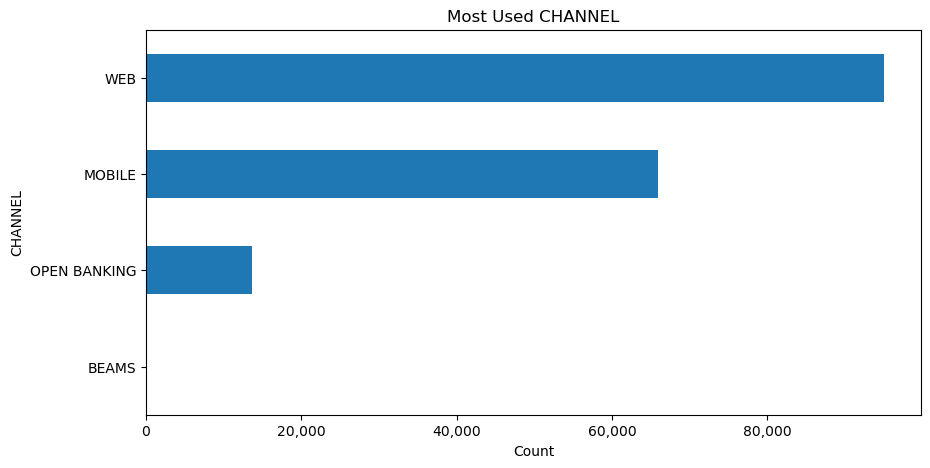

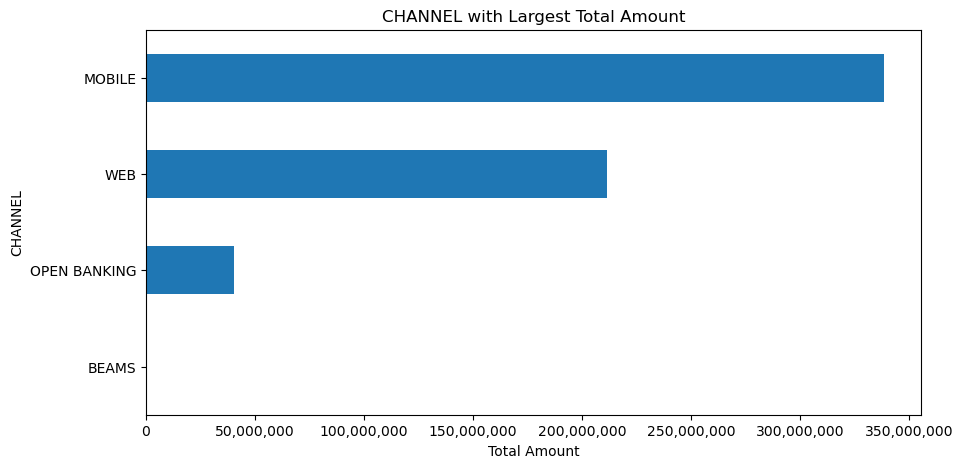

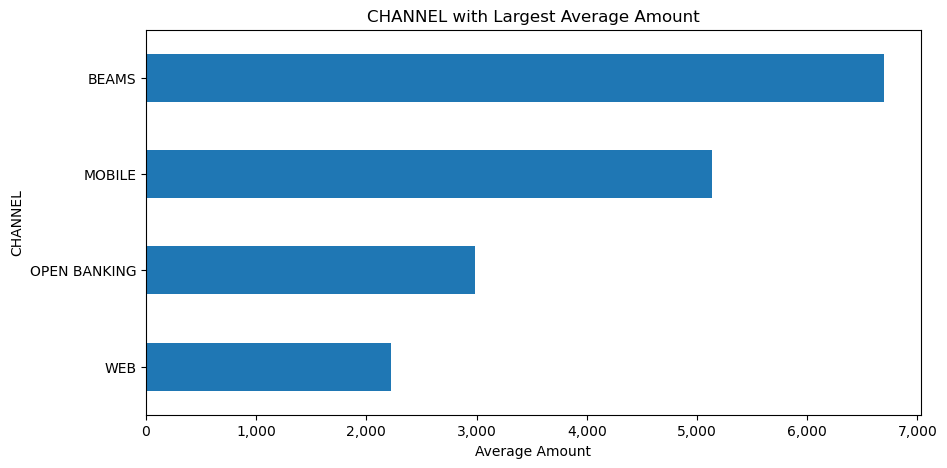

In [32]:
channel_counts = financial_df['CHANNEL'].value_counts()

channel_counts = channel_counts.sort_values(ascending=True)

plt.figure(figsize=(10, 5))
ax = channel_counts.plot(kind='barh')
ax.set_title('Most Used CHANNEL')
ax.set_xlabel('Count')
ax.set_ylabel('CHANNEL')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

channel_total_amount = financial_df.groupby('CHANNEL')['AMOUNT'].sum()

channel_total_amount = channel_total_amount.sort_values(ascending=True)

plt.figure(figsize=(10, 5))
ax = channel_total_amount.plot(kind='barh')
ax.set_title('CHANNEL with Largest Total Amount')
ax.set_xlabel('Total Amount')
ax.set_ylabel('CHANNEL')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

channel_average_amount = financial_df.groupby('CHANNEL')['AMOUNT'].mean()

channel_average_amount = channel_average_amount.sort_values(ascending=True)

plt.figure(figsize=(10, 5))
ax = channel_average_amount.plot(kind='barh')
ax.set_title('CHANNEL with Largest Average Amount')
ax.set_xlabel('Average Amount')
ax.set_ylabel('CHANNEL')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

In [33]:
financial_df_customer_merged_df = pd.merge(financial_df_by_customer, customer_df, on='CUST_NUM', how='inner')

financial_df_customer_merged_df

CUST_NUM  TOTAL_AMOUNT  AVERAGE_AMOUNT PREFERRED_CHANNEL  \
0        107.814656  23682.085967     3947.014328               WEB   
1        187.360615   3120.851302     1040.283767            MOBILE   
2        206.450963  49780.514283     9956.102857            MOBILE   
3        220.508503  46004.061262     6572.008752               WEB   
4        310.618737   7439.726666      572.286667            MOBILE   
...             ...           ...             ...               ...   
10155  14136.974287  12401.439176     6200.719588               WEB   
10156  14137.581971  14643.311533      504.941777               WEB   
10157  14139.061638  58130.342663    19376.780888            MOBILE   
10158  14140.490939  94905.092926    11863.136616               WEB   
10159  14141.980201  33210.040203     1660.502010               WEB   

      PREFERRED_TRAN_TYPE  TRANSACTION_COUNT                        PROVINCE  \
0                E-WALLET                  6               NEGROS OCCIDENTAL   
1                E-WALLET                  3                          TARLAC   
2           BILLS PAYMENT                  5                     NUEVA ECIJA   
3                E-WALLET                  7                         BENGUET   
4                E-WALLET                 13               NEGROS OCCIDENTAL   
...                   ...                ...                             ...   
10155       BILLS PAYMENT                  2               ZAMBOANGA DEL SUR   
10156            E-WALLET                 29                           BOHOL   
10157       BILLS PAYMENT                  3  COTABATO CITY (NOT A PROVINCE)   
10158            E-WALLET                  8                      PANGASINAN   
10159            E-WALLET                 20                MISAMIS ORIENTAL   

                                       REGION EDUCATION   AGE     TENURE  \
0                 REGION VI (WESTERN VISAYAS)       MID  44.0   3.833333   
1                  REGION III (CENTRAL LUZON)       MID  24.0   0.166667   
2                  REGION III (CENTRAL LUZON)       MID  37.0  12.166667   
3      CORDILLERA ADMINISTRATIVE REGION (CAR)   NO_DATA  28.0   4.250000   
4                 REGION VI (WESTERN VISAYAS)       MID  23.0   0.916667   
...                                       ...       ...   ...        ...   
10155         REGION IX (ZAMBOANGA PENINSULA)       MID  43.0  11.583333   
10156            REGION VII (CENTRAL VISAYAS)   NO_DATA  27.0   4.000000   
10157               REGION XII (SOCCSKSARGEN)   NO_DATA  46.0   1.333333   
10158                REGION I (ILOCOS REGION)   NO_DATA  33.0   0.666667   
10159            REGION X (NORTHERN MINDANAO)       MID  36.0   4.666667   

      BUSINESS_OWNER DIGITAL_FLAG INCOME_SOURCE  IDV_OR_ORG  SEGMENT  \
0                  N  TRADITIONAL        SALARY           1        3   
1                  N      DIGITAL        SALARY           1        3   
2                  N      DIGITAL        SALARY           1        3   
3                  N      DIGITAL        SALARY           1        3   
4                  N  TRADITIONAL        SALARY           1        3   
...              ...          ...           ...         ...      ...   
10155              N      DIGITAL        SALARY           1        3   
10156              N      DIGITAL    REMITTANCE           1        3   
10157              N      DIGITAL        SALARY           1        3   
10158              N      DIGITAL        SALARY           1        3   
10159              N  TRADITIONAL        SALARY           1        3   

      SUBSEGMENT  GENDER MARITAL_STATUS  
0      CORE MASS    MALE         SINGLE  
1      CORE MASS    MALE         SINGLE  
2      CORE MASS  FEMALE         SINGLE  
3      CORE MASS  FEMALE        MARRIED  
4      CORE MASS  FEMALE         SINGLE  
...          ...     ...            ...  
10155  CORE MASS  FEMALE        MARRIED  
10156  CORE MASS  FEMALE        MARRIED  
10157  CORE MASS    MALE         SINGLE  

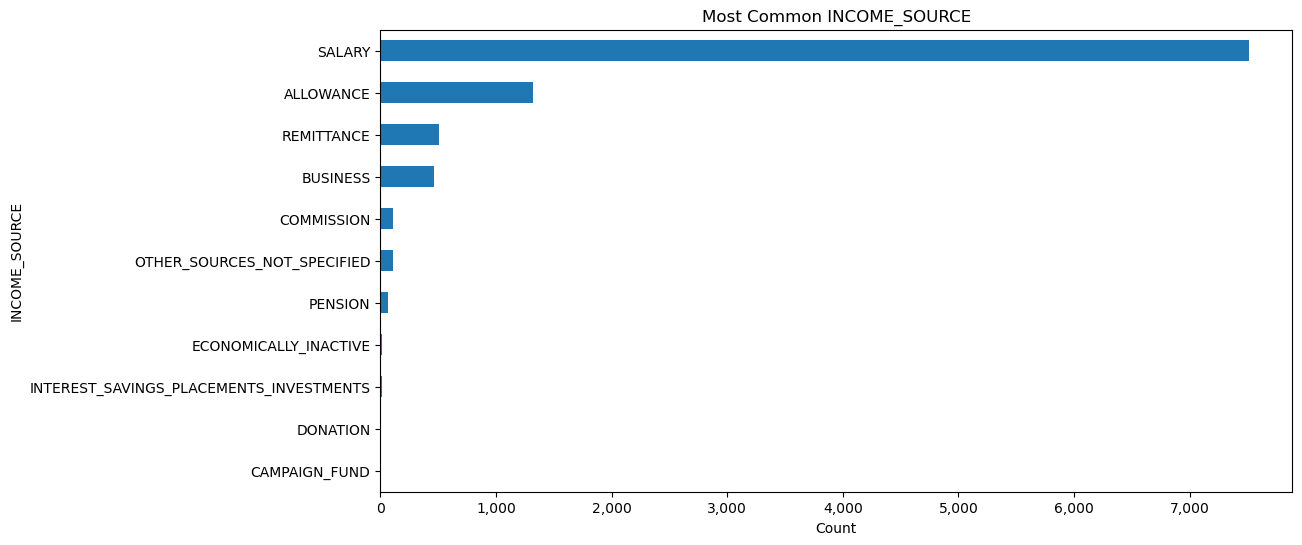

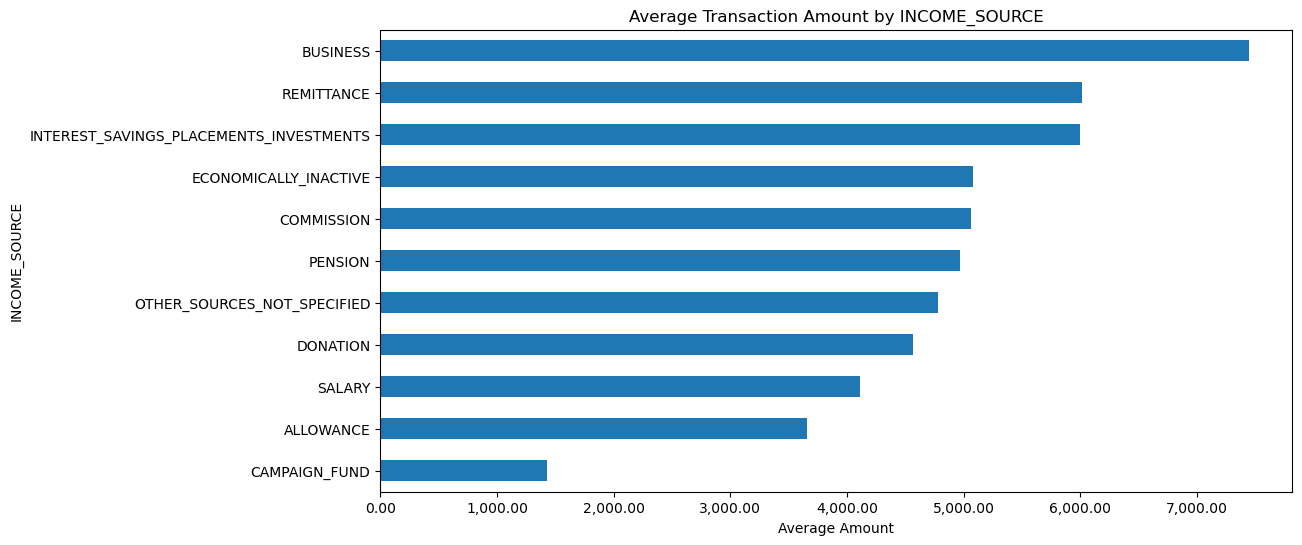

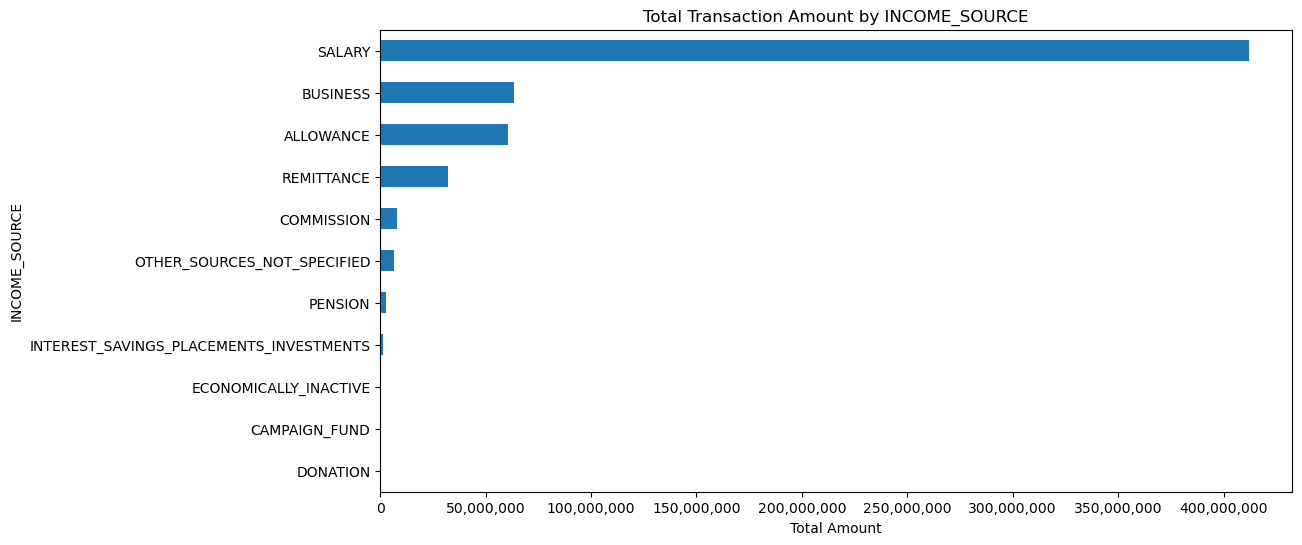

In [34]:
financial_df_customer_merged_merged_income_filtered_df = financial_df_customer_merged_df[financial_df_customer_merged_df['INCOME_SOURCE'] != 'NO_DATA']

income_source_counts = financial_df_customer_merged_merged_income_filtered_df['INCOME_SOURCE'].value_counts()

income_source_counts = income_source_counts.sort_values(ascending=True)

plt.figure(figsize=(40, 6))
plt.subplot(131)
ax1 = income_source_counts.plot(kind='barh')
ax1.set_title('Most Common INCOME_SOURCE')
ax1.set_xlabel('Count')
ax1.set_ylabel('INCOME_SOURCE')

ax1.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

income_source_avg_amount = financial_df_customer_merged_merged_income_filtered_df.groupby('INCOME_SOURCE')['AVERAGE_AMOUNT'].mean()

income_source_avg_amount = income_source_avg_amount.sort_values(ascending=True)

plt.figure(figsize=(40, 6))
plt.subplot(132)
ax2 = income_source_avg_amount.plot(kind='barh')
ax2.set_title('Average Transaction Amount by INCOME_SOURCE')
ax2.set_xlabel('Average Amount')
ax2.set_ylabel('INCOME_SOURCE')

ax2.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.2f}'))
plt.show()

income_source_total_amount = financial_df_customer_merged_merged_income_filtered_df.groupby('INCOME_SOURCE')['TOTAL_AMOUNT'].sum()

income_source_total_amount = income_source_total_amount.sort_values(ascending=True)

plt.figure(figsize=(40, 6))
plt.subplot(133)
ax3 = income_source_total_amount.plot(kind='barh')
ax3.set_title('Total Transaction Amount by INCOME_SOURCE')
ax3.set_xlabel('Total Amount')
ax3.set_ylabel('INCOME_SOURCE')

ax3.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

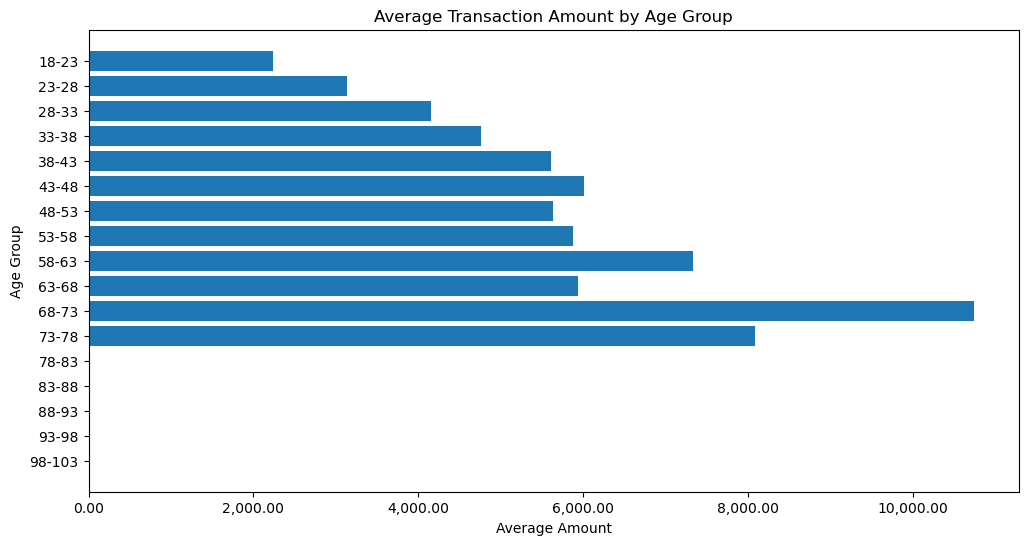

In [35]:
age_bins = [18, 23]
while age_bins[-1] < 103:
    next_bin = age_bins[-1] + 5
    age_bins.append(next_bin)

avg_amount_by_age = []
for i in range(len(age_bins) - 1):
    bin_start = age_bins[i]
    bin_end = age_bins[i + 1]
    bin_data = financial_df_customer_merged_df[
        (financial_df_customer_merged_df['AGE'] >= bin_start) &
        (financial_df_customer_merged_df['AGE'] < bin_end)
    ]
    if len(bin_data) >= 5:
        avg_amount = bin_data['AVERAGE_AMOUNT'].mean()
    else:
        avg_amount = 0
    avg_amount_by_age.append(avg_amount)

age_labels = [f'{start}-{end}' for start, end in zip(age_bins[:-1], age_bins[1:])]

plt.figure(figsize=(12, 6))
ax = plt.barh(age_labels, avg_amount_by_age)
plt.title('Average Transaction Amount by Age Group')
plt.xlabel('Average Amount')
plt.ylabel('Age Group')

plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.2f}'))
plt.show()

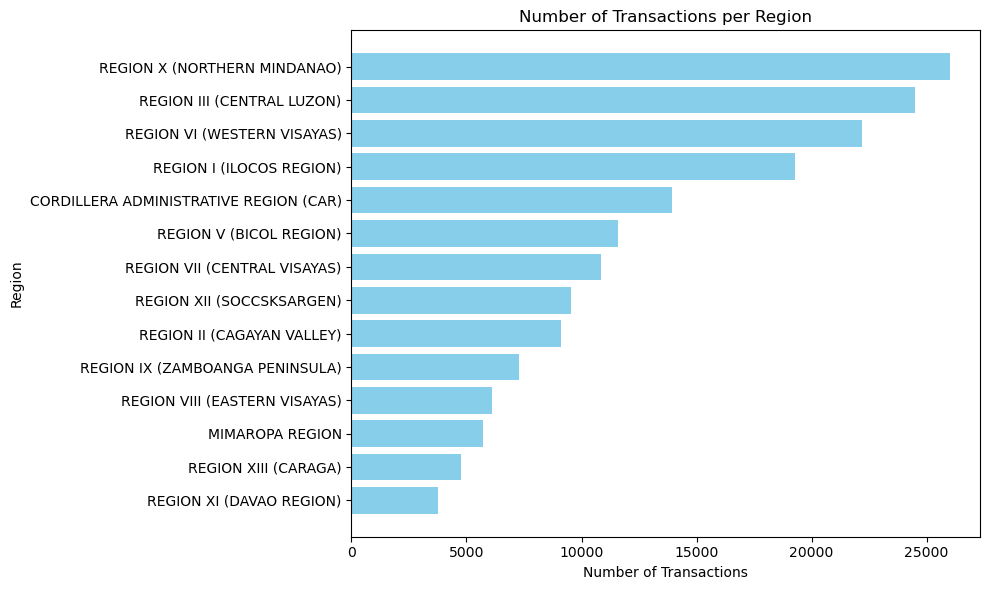

In [36]:
region_transaction_count = financial_df_customer_merged_df.groupby('REGION')['TRANSACTION_COUNT'].sum().reset_index()

region_transaction_count = region_transaction_count.sort_values(by='TRANSACTION_COUNT', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(region_transaction_count['REGION'], region_transaction_count['TRANSACTION_COUNT'], color='skyblue')
plt.xlabel('Number of Transactions')
plt.ylabel('Region')
plt.title('Number of Transactions per Region')
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

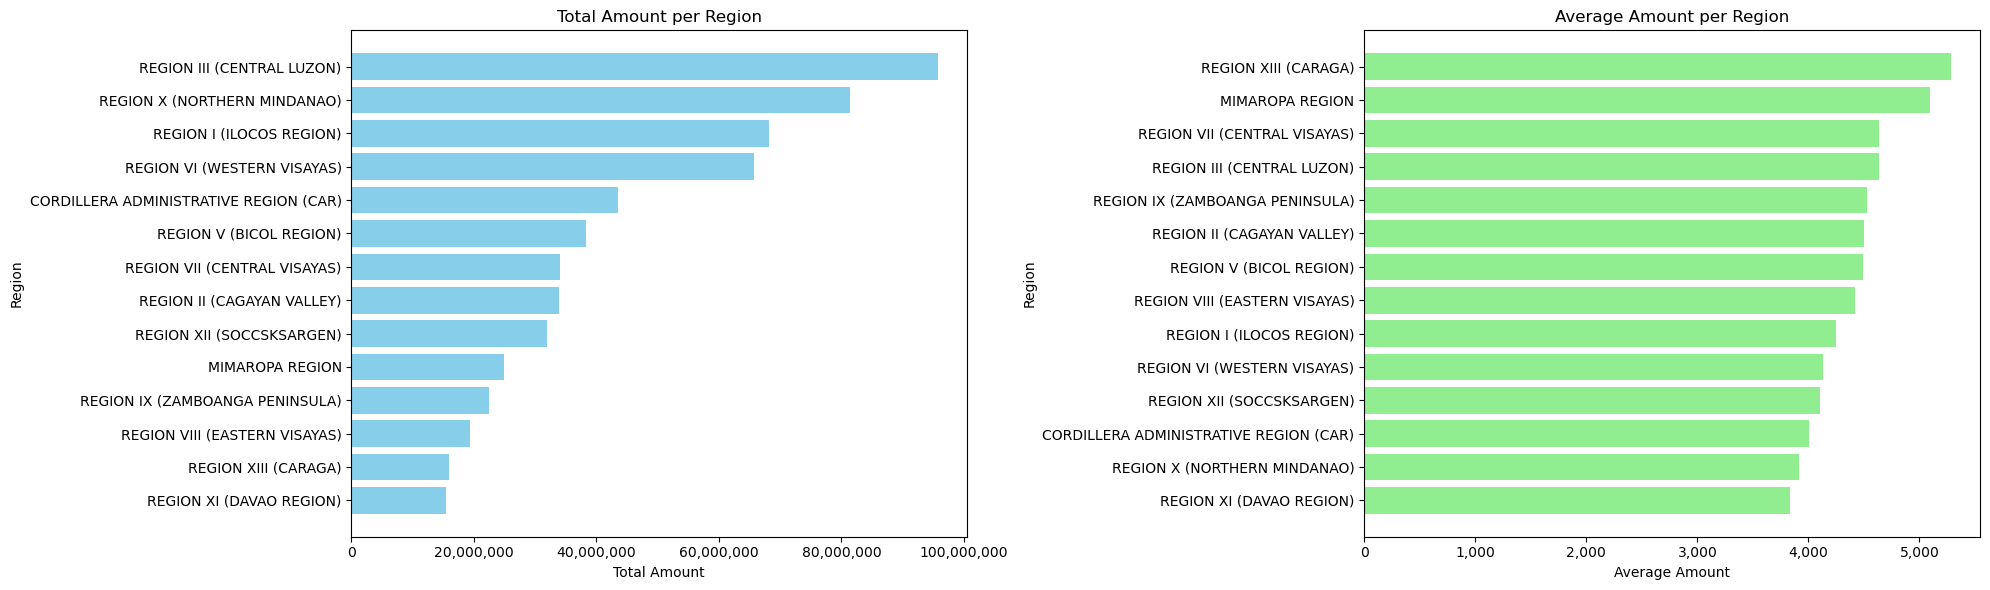

In [37]:
region_total_amount = financial_df_customer_merged_df.groupby('REGION')['TOTAL_AMOUNT'].sum().reset_index()
region_average_amount = financial_df_customer_merged_df.groupby('REGION')['AVERAGE_AMOUNT'].mean().reset_index()

region_total_amount = region_total_amount.sort_values(by='TOTAL_AMOUNT', ascending=False)
region_average_amount = region_average_amount.sort_values(by='AVERAGE_AMOUNT', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

def format_with_commas(x, pos):
    return "{:,}".format(int(x))

ax1.barh(region_total_amount['REGION'], region_total_amount['TOTAL_AMOUNT'], color='skyblue')
ax1.set_xlabel('Total Amount')
ax1.set_ylabel('Region')
ax1.set_title('Total Amount per Region')
ax1.invert_yaxis()
ax1.xaxis.set_major_formatter(mticker.FuncFormatter(format_with_commas))

ax2.barh(region_average_amount['REGION'], region_average_amount['AVERAGE_AMOUNT'], color='lightgreen')
ax2.set_xlabel('Average Amount')
ax2.set_ylabel('Region')
ax2.set_title('Average Amount per Region')
ax2.invert_yaxis()
ax2.xaxis.set_major_formatter(mticker.FuncFormatter(format_with_commas))

plt.tight_layout()

plt.show()

### **INCOMING INSTAPAY TRANSACTIONS**

In [38]:
incoming_df['TRANSACTION_COUNT'] = 1

incoming_df = incoming_df.dropna()

grouped_by_customer = incoming_df.groupby('CUST_NUM').agg({
    'AMOUNT': ['sum', 'mean'],
    'BPI_ACCT_TYPE': lambda x: x.mode().iloc[0],
    'SRC_BANK_NAME': lambda x: x.mode().iloc[0],
    'TRANSACTION_COUNT': 'sum'
}).reset_index()

grouped_by_customer.columns = ['CUST_NUM', 'TOTAL_AMOUNT', 'AVERAGE_AMOUNT','PREFERRED_BPI_ACCT_TYPE', 'PREFERRED_SRC_BANK_NAME', 'TRANSACTION_COUNT']

incoming_df_by_customer = grouped_by_customer.copy()

incoming_df_by_customer

CUST_NUM   TOTAL_AMOUNT  AVERAGE_AMOUNT PREFERRED_BPI_ACCT_TYPE  \
0         85.229103   14998.173414     4999.391138                      SA   
1        107.814656   35496.189903     8874.047476                      SA   
2        185.854782  219814.484785     8454.403261                      SA   
3        206.450963  174541.715135    14545.142928                      SA   
4        220.508503   45498.181391    22749.090696                      SA   
...             ...            ...             ...                     ...   
12924  14137.003360  299394.756749    42770.679536                      SA   
12925  14137.138466  677488.264077    42343.016505                      SA   
12926  14137.581971     999.339460      999.339460                      SA   
12927  14140.050354     699.425618      699.425618                      SA   
12928  14140.490939   84995.849305    16999.169861                      SA   

      PREFERRED_SRC_BANK_NAME  TRANSACTION_COUNT  
0                         DOG                  3  
1                       HUMAN                  4  
2                       HUMAN                 26  
3                         DOG                 12  
4                         DOG                  2  
...                       ...                ...  
12924                     CAT                  7  
12925                    LION                 16  
12926                   HUMAN                  1  
12927                   HUMAN                  1  
12928                   HUMAN                  5  

[12929 rows x 6 columns]

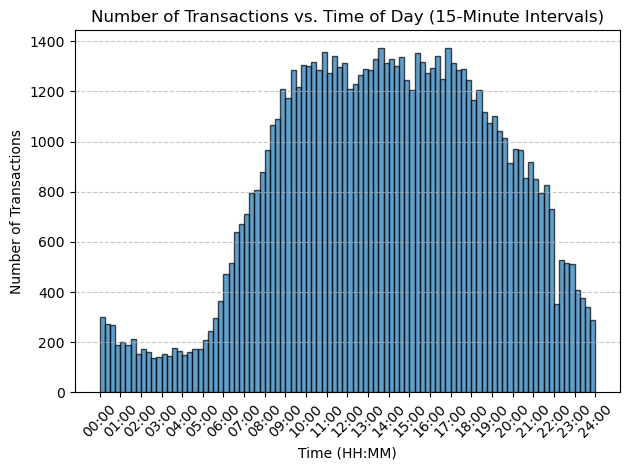

In [39]:
incoming_df['TIME'] = incoming_df['TIME'] / 60

bin_edges = range(0, 24 * 60 + 15, 15)

plt.hist(incoming_df['TIME'], bins=bin_edges, edgecolor='k', alpha=0.7)

plt.xlabel('Time (HH:MM)')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions vs. Time of Day (15-Minute Intervals)')

plt.xticks(range(0, 24 * 60 + 15, 60), [f'{h:02d}:00' for h in range(25)], rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

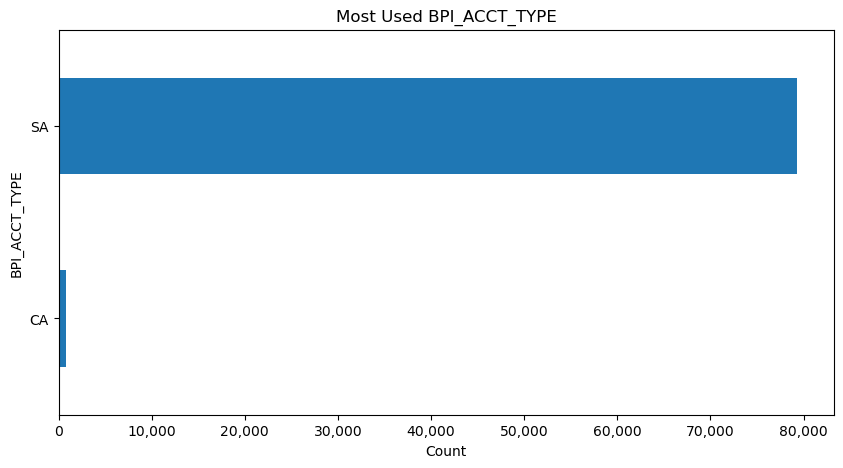

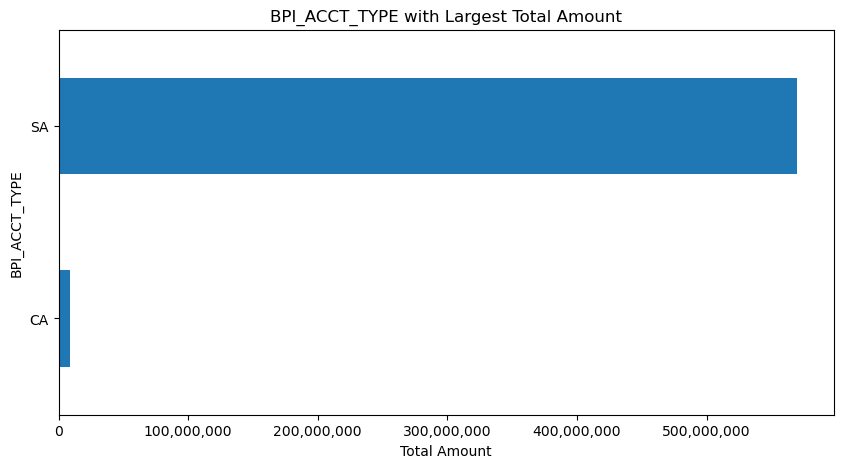

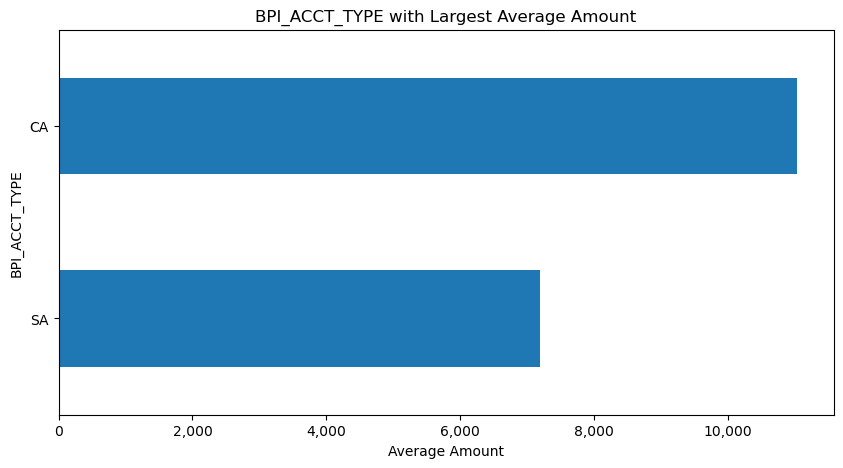

In [40]:
account_type_counts = incoming_df['BPI_ACCT_TYPE'].value_counts()

account_type_counts = account_type_counts.sort_values(ascending=True)

plt.figure(figsize=(10, 5))
ax = account_type_counts.plot(kind='barh')
ax.set_title('Most Used BPI_ACCT_TYPE')
ax.set_xlabel('Count')
ax.set_ylabel('BPI_ACCT_TYPE')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

account_type_total_amount = incoming_df.groupby('BPI_ACCT_TYPE')['AMOUNT'].sum()

account_type_total_amount = account_type_total_amount.sort_values(ascending=True)

plt.figure(figsize=(10, 5))
ax = account_type_total_amount.plot(kind='barh')
ax.set_title('BPI_ACCT_TYPE with Largest Total Amount')
ax.set_xlabel('Total Amount')
ax.set_ylabel('BPI_ACCT_TYPE')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

account_type_average_amount = incoming_df.groupby('BPI_ACCT_TYPE')['AMOUNT'].mean()

account_type_average_amount = account_type_average_amount.sort_values(ascending=True)

plt.figure(figsize=(10, 5))
ax = account_type_average_amount.plot(kind='barh')
ax.set_title('BPI_ACCT_TYPE with Largest Average Amount')
ax.set_xlabel('Average Amount')
ax.set_ylabel('BPI_ACCT_TYPE')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

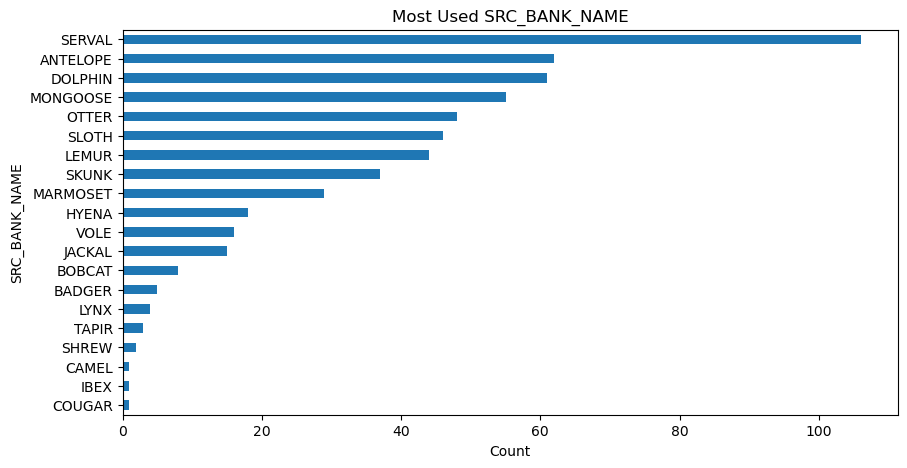

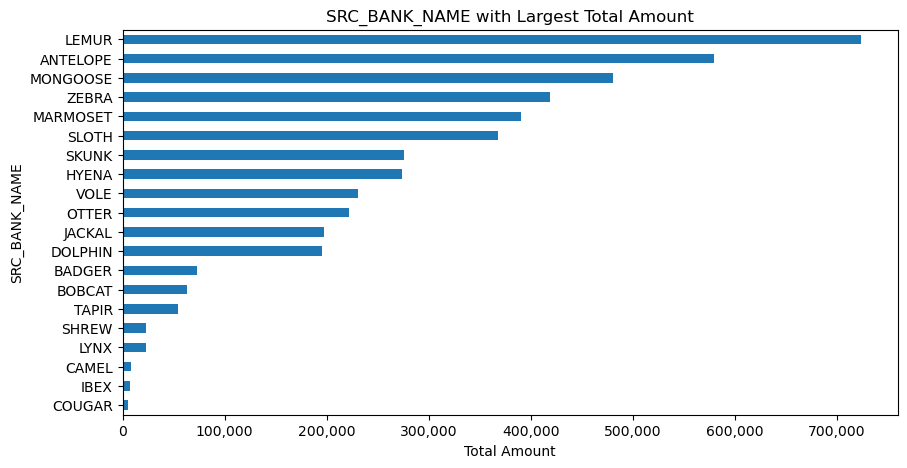

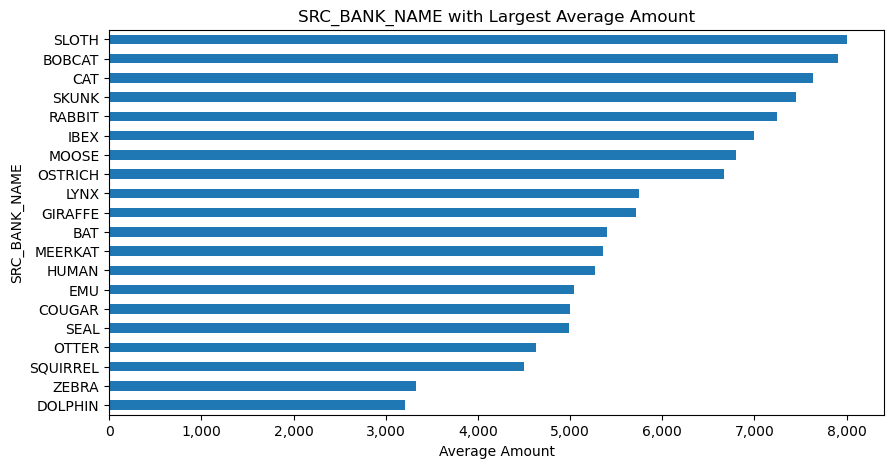

In [41]:
bank_name_counts = incoming_df['SRC_BANK_NAME'].value_counts()

bank_name_counts = bank_name_counts.sort_values(ascending=True)

bank_name_counts_20 = bank_name_counts.head(20)

plt.figure(figsize=(10, 5))
ax = bank_name_counts_20.plot(kind='barh')
ax.set_title('Most Used SRC_BANK_NAME')
ax.set_xlabel('Count')
ax.set_ylabel('SRC_BANK_NAME')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

bank_name_total_amount = incoming_df.groupby('SRC_BANK_NAME')['AMOUNT'].sum()

bank_name_total_amount = bank_name_total_amount.sort_values(ascending=True)

bank_name_total_amount_20 = bank_name_total_amount.head(20)

plt.figure(figsize=(10, 5))
ax = bank_name_total_amount_20.plot(kind='barh')
ax.set_title('SRC_BANK_NAME with Largest Total Amount')
ax.set_xlabel('Total Amount')
ax.set_ylabel('SRC_BANK_NAME')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

bank_name_average_amount = incoming_df.groupby('SRC_BANK_NAME')['AMOUNT'].mean()

bank_name_average_amount = bank_name_average_amount.sort_values(ascending=True)

bank_name_average_amount_20 = bank_name_average_amount.head(20)

plt.figure(figsize=(10, 5))
ax = bank_name_average_amount_20.plot(kind='barh')
ax.set_title('SRC_BANK_NAME with Largest Average Amount')
ax.set_xlabel('Average Amount')
ax.set_ylabel('SRC_BANK_NAME')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

In [42]:
incoming_df_customer_merged_df = pd.merge(incoming_df_by_customer, customer_df, on='CUST_NUM', how='inner')

incoming_df_customer_merged_df.head()

CUST_NUM   TOTAL_AMOUNT  AVERAGE_AMOUNT PREFERRED_BPI_ACCT_TYPE  \
0   85.229103   14998.173414     4999.391138                      SA   
1  107.814656   35496.189903     8874.047476                      SA   
2  185.854782  219814.484785     8454.403261                      SA   
3  206.450963  174541.715135    14545.142928                      SA   
4  220.508503   45498.181391    22749.090696                      SA   

  PREFERRED_SRC_BANK_NAME  TRANSACTION_COUNT             PROVINCE  \
0                     DOG                  3       SOUTH COTABATO   
1                   HUMAN                  4    NEGROS OCCIDENTAL   
2                   HUMAN                 26  ZAMBOANGA DEL NORTE   
3                     DOG                 12          NUEVA ECIJA   
4                     DOG                  2              BENGUET   

                                   REGION EDUCATION   AGE     TENURE  \
0               REGION XII (SOCCSKSARGEN)   NO_DATA  32.0   1.250000   
1             REGION VI (WESTERN VISAYAS)       MID  44.0   3.833333   
2         REGION IX (ZAMBOANGA PENINSULA)       MID  32.0   7.666667   
3              REGION III (CENTRAL LUZON)       MID  37.0  12.166667   
4  CORDILLERA ADMINISTRATIVE REGION (CAR)   NO_DATA  28.0   4.250000   

  BUSINESS_OWNER DIGITAL_FLAG INCOME_SOURCE  IDV_OR_ORG  SEGMENT SUBSEGMENT  \
0              N  TRADITIONAL    REMITTANCE           1        3  CORE MASS   
1              N  TRADITIONAL        SALARY           1        3  CORE MASS   
2              N  TRADITIONAL        SALARY           1        3  CORE MASS   
3              N      DIGITAL        SALARY           1        3  CORE MASS   
4              N      DIGITAL        SALARY           1        3  CORE MASS   

   GENDER MARITAL_STATUS  
0  FEMALE         SINGLE  
1    MALE         SINGLE  
2  FEMALE         SINGLE  
3  FEMALE         SINGLE  
4  FEMALE        MARRIED

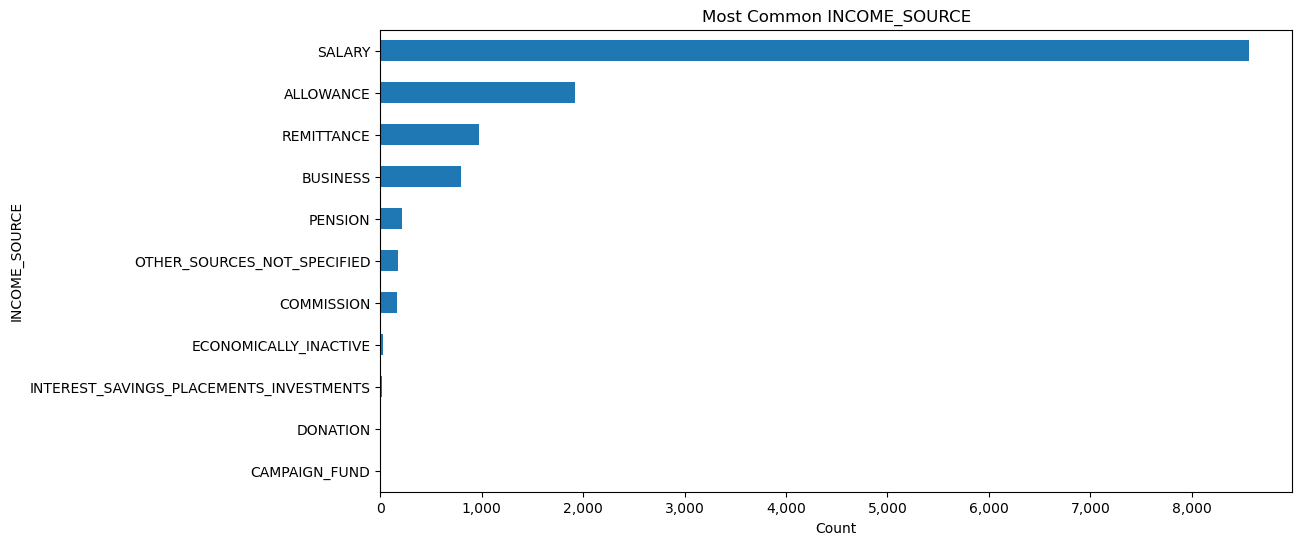

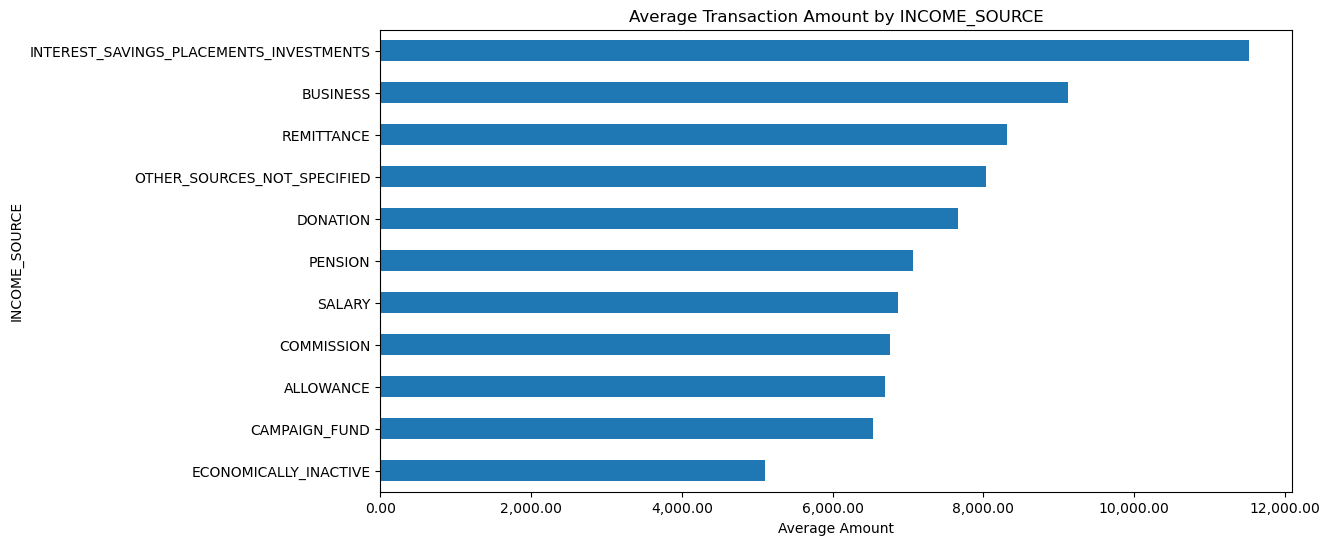

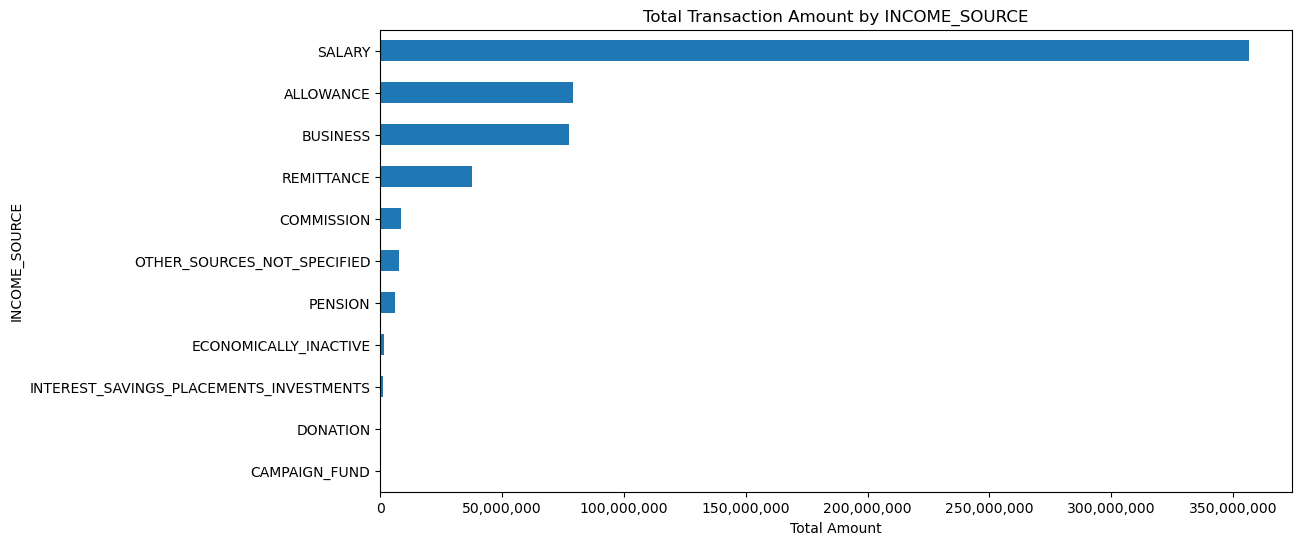

In [43]:
incoming_df_customer_merged_income_filtered_df = incoming_df_customer_merged_df[incoming_df_customer_merged_df['INCOME_SOURCE'] != 'NO_DATA']

income_source_counts = incoming_df_customer_merged_income_filtered_df['INCOME_SOURCE'].value_counts()

income_source_counts = income_source_counts.sort_values(ascending=True)

plt.figure(figsize=(40, 6))
plt.subplot(131)
ax1 = income_source_counts.plot(kind='barh')
ax1.set_title('Most Common INCOME_SOURCE')
ax1.set_xlabel('Count')
ax1.set_ylabel('INCOME_SOURCE')

ax1.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

income_source_avg_amount = incoming_df_customer_merged_income_filtered_df.groupby('INCOME_SOURCE')['AVERAGE_AMOUNT'].mean()

income_source_avg_amount = income_source_avg_amount.sort_values(ascending=True)

plt.figure(figsize=(40, 6))
plt.subplot(132)
ax2 = income_source_avg_amount.plot(kind='barh')
ax2.set_title('Average Transaction Amount by INCOME_SOURCE')
ax2.set_xlabel('Average Amount')
ax2.set_ylabel('INCOME_SOURCE')

ax2.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.2f}'))
plt.show()

income_source_total_amount = incoming_df_customer_merged_income_filtered_df.groupby('INCOME_SOURCE')['TOTAL_AMOUNT'].sum()

income_source_total_amount = income_source_total_amount.sort_values(ascending=True)

plt.figure(figsize=(40, 6))
plt.subplot(133)
ax3 = income_source_total_amount.plot(kind='barh')
ax3.set_title('Total Transaction Amount by INCOME_SOURCE')
ax3.set_xlabel('Total Amount')
ax3.set_ylabel('INCOME_SOURCE')

ax3.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

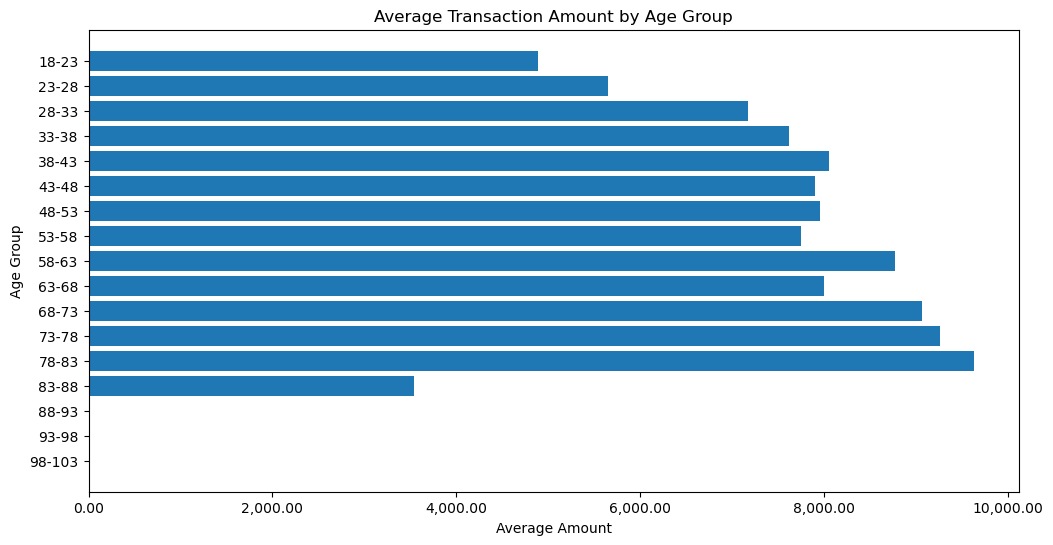

In [44]:
age_bins = [18, 23]
while age_bins[-1] < 103:
    next_bin = age_bins[-1] + 5
    age_bins.append(next_bin)

avg_amount_by_age = []
for i in range(len(age_bins) - 1):
    bin_start = age_bins[i]
    bin_end = age_bins[i + 1]
    bin_data = incoming_df_customer_merged_df[
        (incoming_df_customer_merged_df['AGE'] >= bin_start) &
        (incoming_df_customer_merged_df['AGE'] < bin_end)
    ]
    if len(bin_data) >= 5:
        avg_amount = bin_data['AVERAGE_AMOUNT'].mean()
    else:
        avg_amount = 0
    avg_amount_by_age.append(avg_amount)

age_labels = [f'{start}-{end}' for start, end in zip(age_bins[:-1], age_bins[1:])]

plt.figure(figsize=(12, 6))
ax = plt.barh(age_labels, avg_amount_by_age)
plt.title('Average Transaction Amount by Age Group')
plt.xlabel('Average Amount')
plt.ylabel('Age Group')

plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.2f}'))
plt.show()

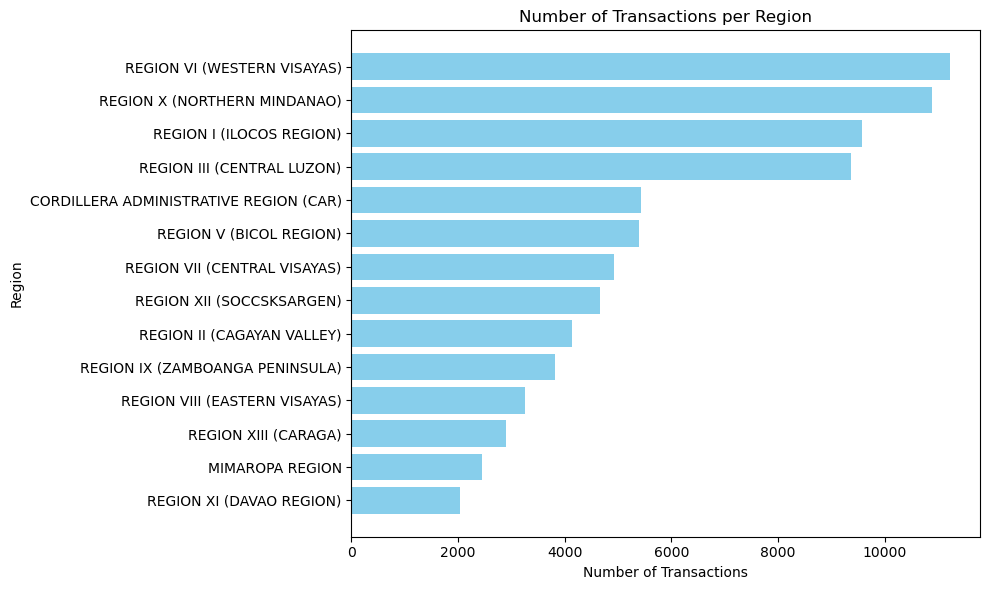

In [45]:
region_transaction_count = incoming_df_customer_merged_df.groupby('REGION')['TRANSACTION_COUNT'].sum().reset_index()

region_transaction_count = region_transaction_count.sort_values(by='TRANSACTION_COUNT', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(region_transaction_count['REGION'], region_transaction_count['TRANSACTION_COUNT'], color='skyblue')
plt.xlabel('Number of Transactions')
plt.ylabel('Region')
plt.title('Number of Transactions per Region')
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

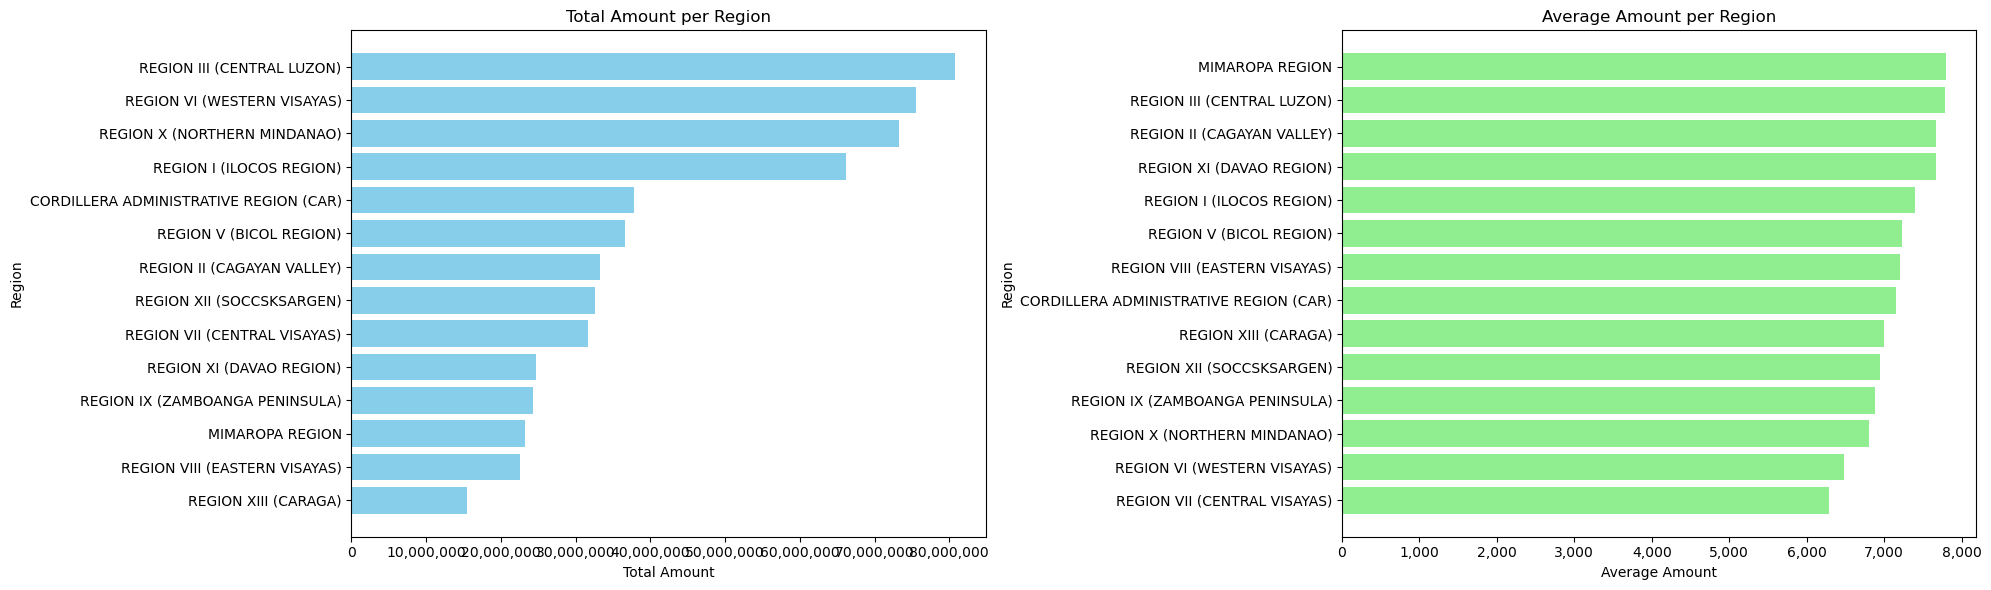

In [46]:
region_total_amount = incoming_df_customer_merged_df.groupby('REGION')['TOTAL_AMOUNT'].sum().reset_index()
region_average_amount = incoming_df_customer_merged_df.groupby('REGION')['AVERAGE_AMOUNT'].mean().reset_index()

region_total_amount = region_total_amount.sort_values(by='TOTAL_AMOUNT', ascending=False)
region_average_amount = region_average_amount.sort_values(by='AVERAGE_AMOUNT', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

def format_with_commas(x, pos):
    return "{:,}".format(int(x))

ax1.barh(region_total_amount['REGION'], region_total_amount['TOTAL_AMOUNT'], color='skyblue')
ax1.set_xlabel('Total Amount')
ax1.set_ylabel('Region')
ax1.set_title('Total Amount per Region')
ax1.invert_yaxis()
ax1.xaxis.set_major_formatter(mticker.FuncFormatter(format_with_commas))

ax2.barh(region_average_amount['REGION'], region_average_amount['AVERAGE_AMOUNT'], color='lightgreen')
ax2.set_xlabel('Average Amount')
ax2.set_ylabel('Region')
ax2.set_title('Average Amount per Region')
ax2.invert_yaxis()
ax2.xaxis.set_major_formatter(mticker.FuncFormatter(format_with_commas))

plt.tight_layout()

plt.show()

### **OUTGOING INSTAPAY TRANSACTIONS**

In [47]:
outgoing_df['TRANSACTION_COUNT'] = 1

outgoing_df = outgoing_df.dropna()

grouped_by_customer = outgoing_df.groupby('CUST_NUM').agg({
    'AMOUNT': ['sum', 'mean'],
    'CHANNEL': lambda x: x.mode().iloc[0],
    'RCV_BANK_NAME': lambda x: x.mode().iloc[0],
    'TRANSACTION_COUNT': 'sum'
}).reset_index()

grouped_by_customer.columns = ['CUST_NUM', 'TOTAL_AMOUNT', 'AVERAGE_AMOUNT', 'PREFERRED_CHANNEL', 'PREFERRED_RCV_BANK_NAME', 'TRANSACTION_COUNT']

outgoing_df_by_customer = grouped_by_customer.copy()

outgoing_df_by_customer

CUST_NUM   TOTAL_AMOUNT  AVERAGE_AMOUNT PREFERRED_CHANNEL  \
0        85.229103   17999.470331    17999.470331            MOBILE   
1       206.450963   40799.088988    20399.544494            MOBILE   
2       242.495361    3649.452688      912.363172            MOBILE   
3       290.351511   85190.443990     3703.932347            MOBILE   
4       362.331340  598769.789415    14256.423558            MOBILE   
...            ...            ...             ...               ...   
6225  14134.713368    2499.219936     1249.609968            MOBILE   
6226  14135.057198    6498.738758     2166.246253            MOBILE   
6227  14136.046972   89752.852403     5609.553275            MOBILE   
6228  14136.758539   16998.048241     5666.016080            MOBILE   
6229  14139.061638   11147.525890     2229.505178            MOBILE   

     PREFERRED_RCV_BANK_NAME  TRANSACTION_COUNT  
0                    CHEETAH                  1  
1                        DOG                  2  
2                      HUMAN                  4  
3                      HUMAN                 23  
4                      HUMAN                 42  
...                      ...                ...  
6225                     CAT                  2  
6226                   HUMAN                  3  
6227                   HUMAN                 16  
6228                     CAT                  3  
6229                   HUMAN                  5  

[6230 rows x 6 columns]

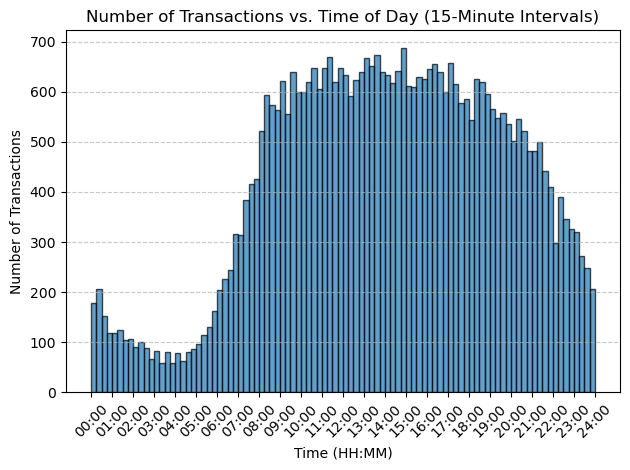

In [48]:
outgoing_df['TIME'] = outgoing_df['TIME'] / 60

bin_edges = range(0, 24 * 60 + 15, 15)

plt.hist(outgoing_df['TIME'], bins=bin_edges, edgecolor='k', alpha=0.7)

plt.xlabel('Time (HH:MM)')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions vs. Time of Day (15-Minute Intervals)')

plt.xticks(range(0, 24 * 60 + 15, 60), [f'{h:02d}:00' for h in range(25)], rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

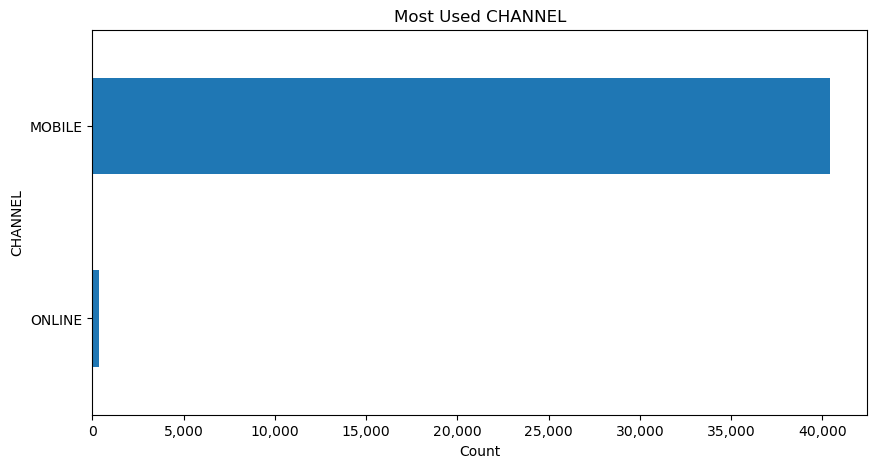

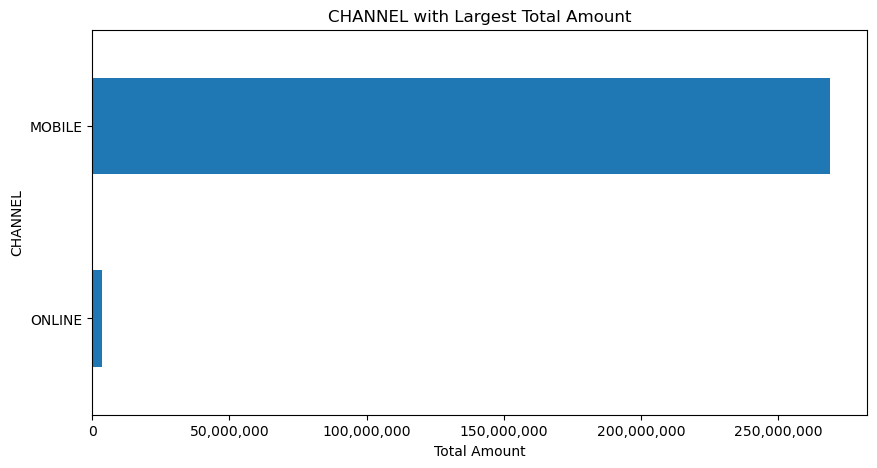

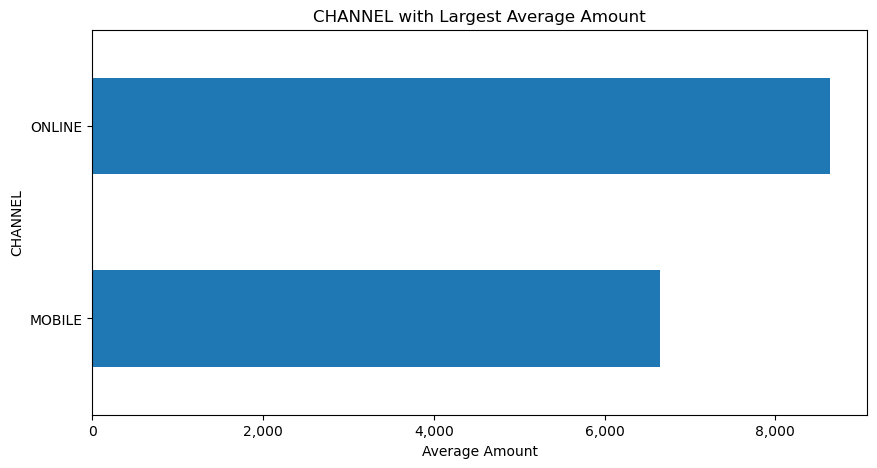

In [49]:
channel_counts = outgoing_df['CHANNEL'].value_counts()

channel_counts = channel_counts.sort_values(ascending=True)

plt.figure(figsize=(10, 5))
ax = channel_counts.plot(kind='barh')
ax.set_title('Most Used CHANNEL')
ax.set_xlabel('Count')
ax.set_ylabel('CHANNEL')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

channel_total_amount = outgoing_df.groupby('CHANNEL')['AMOUNT'].sum()

channel_total_amount = channel_total_amount.sort_values(ascending=True)

plt.figure(figsize=(10, 5))
ax = channel_total_amount.plot(kind='barh')
ax.set_title('CHANNEL with Largest Total Amount')
ax.set_xlabel('Total Amount')
ax.set_ylabel('CHANNEL')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

channel_average_amount = outgoing_df.groupby('CHANNEL')['AMOUNT'].mean()

channel_average_amount = channel_average_amount.sort_values(ascending=True)

plt.figure(figsize=(10, 5))
ax = channel_average_amount.plot(kind='barh')
ax.set_title('CHANNEL with Largest Average Amount')
ax.set_xlabel('Average Amount')
ax.set_ylabel('CHANNEL')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

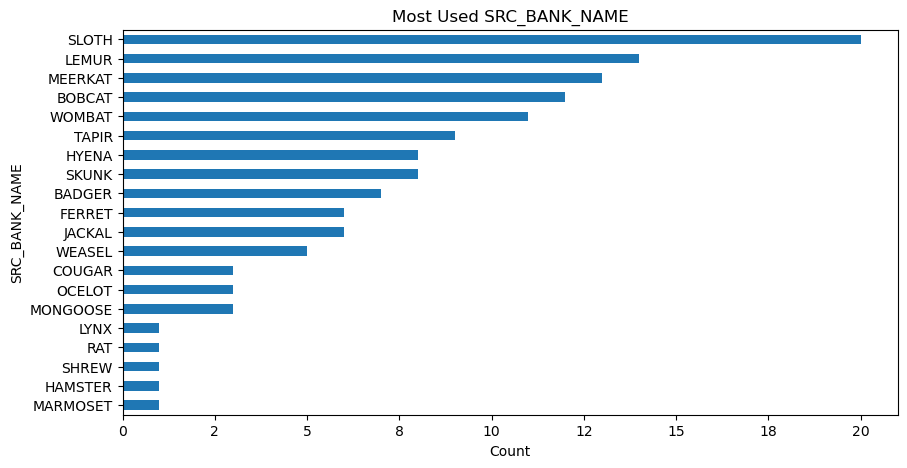

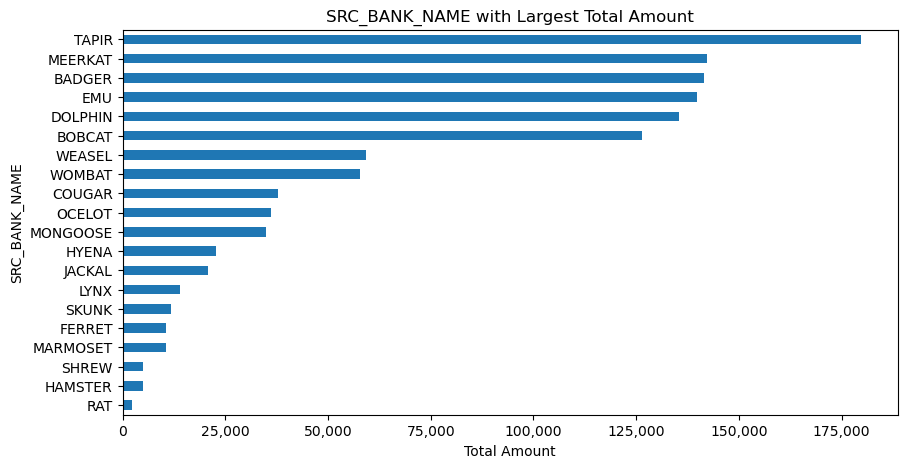

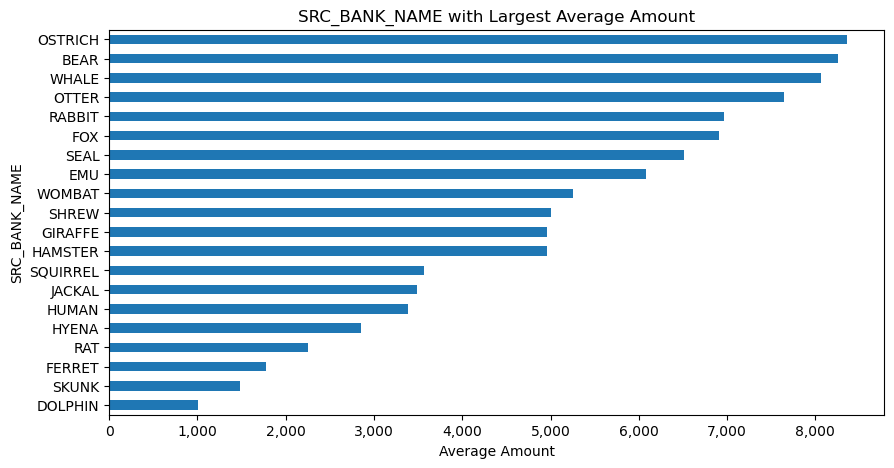

In [50]:
bank_name_counts = outgoing_df['RCV_BANK_NAME'].value_counts()

bank_name_counts = bank_name_counts.sort_values(ascending=True)

bank_name_counts_20 = bank_name_counts.head(20)

plt.figure(figsize=(10, 5))
ax = bank_name_counts_20.plot(kind='barh')
ax.set_title('Most Used SRC_BANK_NAME')
ax.set_xlabel('Count')
ax.set_ylabel('SRC_BANK_NAME')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

bank_name_total_amount = outgoing_df.groupby('RCV_BANK_NAME')['AMOUNT'].sum()

bank_name_total_amount = bank_name_total_amount.sort_values(ascending=True)

bank_name_total_amount_20 = bank_name_total_amount.head(20)

plt.figure(figsize=(10, 5))
ax = bank_name_total_amount_20.plot(kind='barh')
ax.set_title('SRC_BANK_NAME with Largest Total Amount')
ax.set_xlabel('Total Amount')
ax.set_ylabel('SRC_BANK_NAME')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

bank_name_average_amount = outgoing_df.groupby('RCV_BANK_NAME')['AMOUNT'].mean()

bank_name_average_amount = bank_name_average_amount.sort_values(ascending=True)

bank_name_average_amount_20 = bank_name_average_amount.head(20)

plt.figure(figsize=(10, 5))
ax = bank_name_average_amount_20.plot(kind='barh')
ax.set_title('SRC_BANK_NAME with Largest Average Amount')
ax.set_xlabel('Average Amount')
ax.set_ylabel('SRC_BANK_NAME')

ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

In [51]:
outgoing_df_customer_merged_df = pd.merge(outgoing_df_by_customer, customer_df, on='CUST_NUM', how='inner')

outgoing_df_customer_merged_df.head()

CUST_NUM   TOTAL_AMOUNT  AVERAGE_AMOUNT PREFERRED_CHANNEL  \
0   85.229103   17999.470331    17999.470331            MOBILE   
1  206.450963   40799.088988    20399.544494            MOBILE   
2  242.495361    3649.452688      912.363172            MOBILE   
3  290.351511   85190.443990     3703.932347            MOBILE   
4  362.331340  598769.789415    14256.423558            MOBILE   

  PREFERRED_RCV_BANK_NAME  TRANSACTION_COUNT           PROVINCE  \
0                 CHEETAH                  1     SOUTH COTABATO   
1                     DOG                  2        NUEVA ECIJA   
2                   HUMAN                  4  NEGROS OCCIDENTAL   
3                   HUMAN                 23           ZAMBALES   
4                   HUMAN                 42     SOUTH COTABATO   

                        REGION EDUCATION   AGE     TENURE BUSINESS_OWNER  \
0    REGION XII (SOCCSKSARGEN)   NO_DATA  32.0   1.250000              N   
1   REGION III (CENTRAL LUZON)       MID  37.0  12.166667              N   
2  REGION VI (WESTERN VISAYAS)       LOW  23.0   5.000000              N   
3   REGION III (CENTRAL LUZON)   NO_DATA  30.0   0.416667              N   
4    REGION XII (SOCCSKSARGEN)   NO_DATA  36.0   0.750000              N   

  DIGITAL_FLAG INCOME_SOURCE  IDV_OR_ORG  SEGMENT SUBSEGMENT  GENDER  \
0  TRADITIONAL    REMITTANCE           1        3  CORE MASS  FEMALE   
1      DIGITAL        SALARY           1        3  CORE MASS  FEMALE   
2  TRADITIONAL        SALARY           1        3  CORE MASS  FEMALE   
3      DIGITAL        SALARY           1        3  CORE MASS  FEMALE   
4  TRADITIONAL        SALARY           1        3  CORE MASS    MALE   

  MARITAL_STATUS  
0         SINGLE  
1         SINGLE  
2         SINGLE  
3         SINGLE  
4        MARRIED

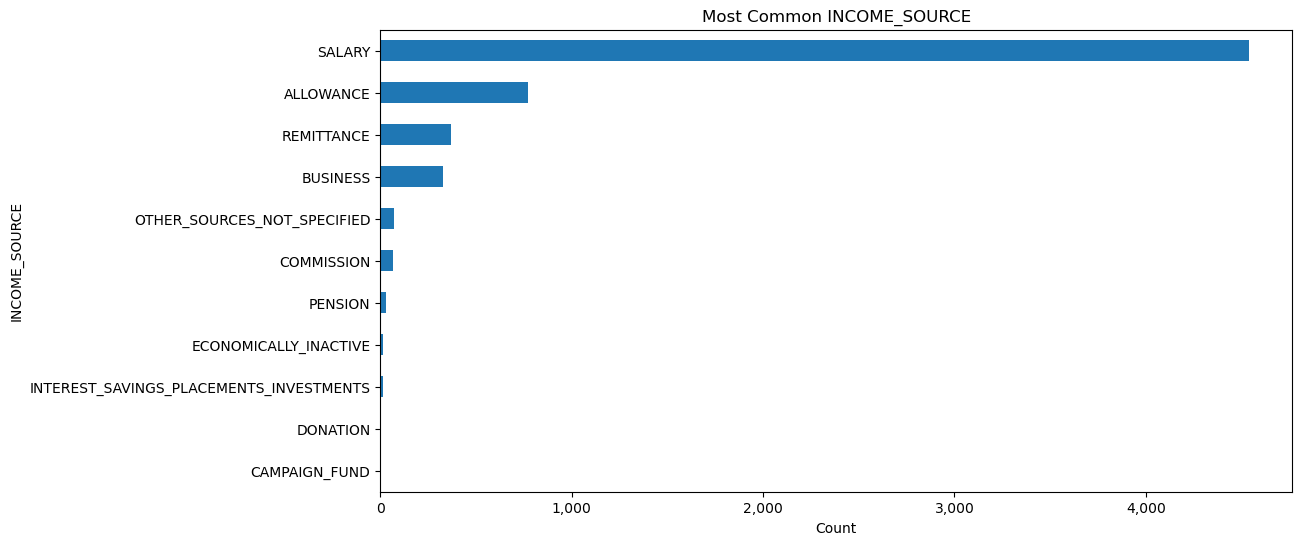

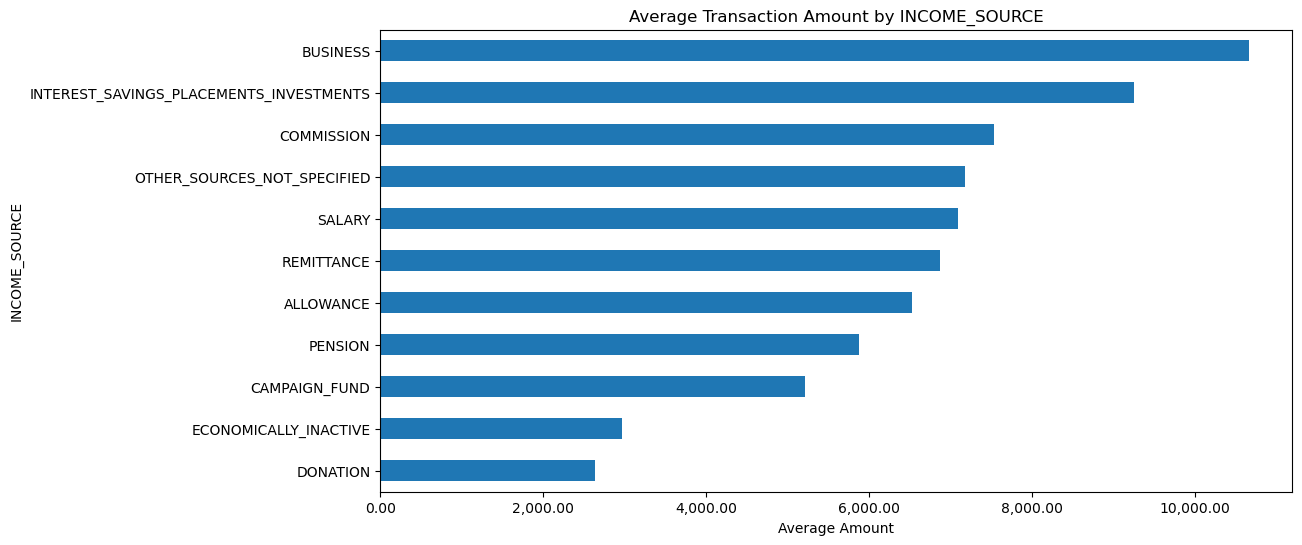

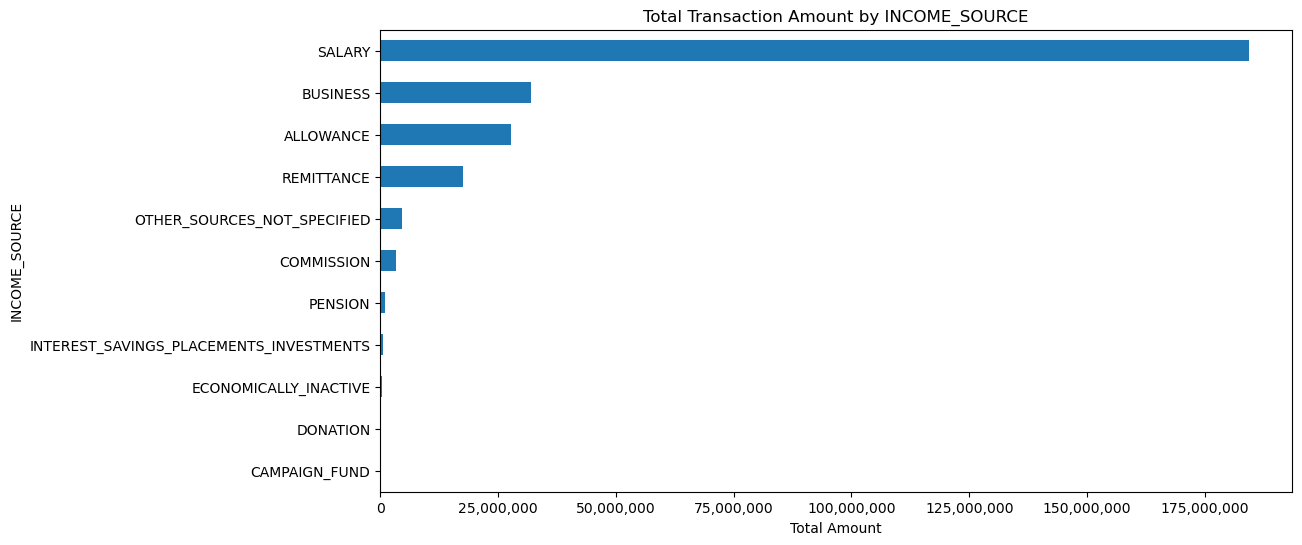

In [52]:
outgoing_df_customer_merged_income_filtered_df = outgoing_df_customer_merged_df[outgoing_df_customer_merged_df['INCOME_SOURCE'] != 'NO_DATA']

income_source_counts = outgoing_df_customer_merged_income_filtered_df['INCOME_SOURCE'].value_counts()

income_source_counts = income_source_counts.sort_values(ascending=True)

plt.figure(figsize=(40, 6))
plt.subplot(131)
ax1 = income_source_counts.plot(kind='barh')
ax1.set_title('Most Common INCOME_SOURCE')
ax1.set_xlabel('Count')
ax1.set_ylabel('INCOME_SOURCE')

ax1.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

income_source_avg_amount = outgoing_df_customer_merged_income_filtered_df.groupby('INCOME_SOURCE')['AVERAGE_AMOUNT'].mean()

income_source_avg_amount = income_source_avg_amount.sort_values(ascending=True)

plt.figure(figsize=(40, 6))
plt.subplot(132)
ax2 = income_source_avg_amount.plot(kind='barh')
ax2.set_title('Average Transaction Amount by INCOME_SOURCE')
ax2.set_xlabel('Average Amount')
ax2.set_ylabel('INCOME_SOURCE')

ax2.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.2f}'))
plt.show()

income_source_total_amount = outgoing_df_customer_merged_income_filtered_df.groupby('INCOME_SOURCE')['TOTAL_AMOUNT'].sum()

income_source_total_amount = income_source_total_amount.sort_values(ascending=True)

plt.figure(figsize=(40, 6))
plt.subplot(133)
ax3 = income_source_total_amount.plot(kind='barh')
ax3.set_title('Total Transaction Amount by INCOME_SOURCE')
ax3.set_xlabel('Total Amount')
ax3.set_ylabel('INCOME_SOURCE')

ax3.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

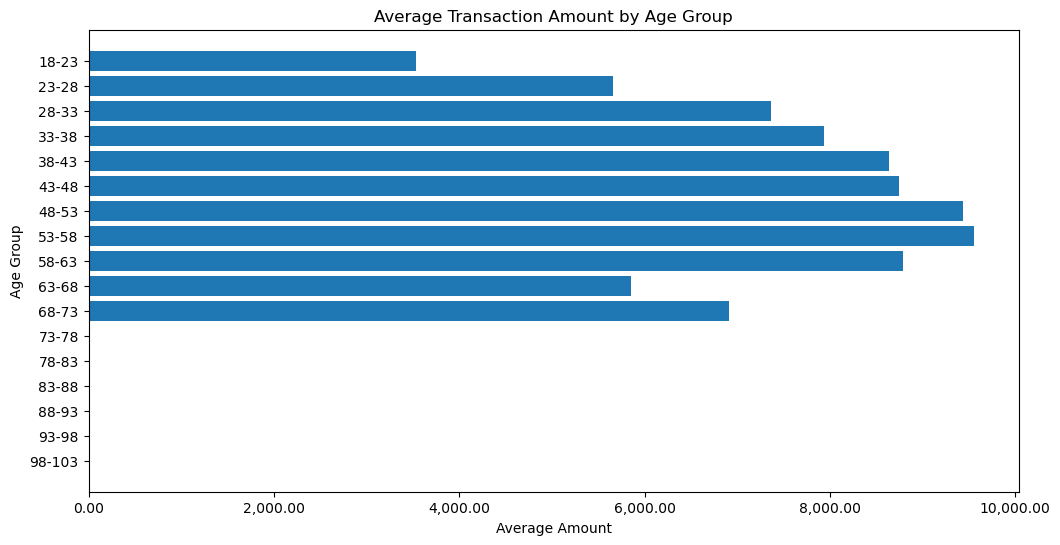

In [53]:
age_bins = [18, 23]
while age_bins[-1] < 103:
    next_bin = age_bins[-1] + 5
    age_bins.append(next_bin)

avg_amount_by_age = []
for i in range(len(age_bins) - 1):
    bin_start = age_bins[i]
    bin_end = age_bins[i + 1]
    bin_data = outgoing_df_customer_merged_df[
        (outgoing_df_customer_merged_df['AGE'] >= bin_start) &
        (outgoing_df_customer_merged_df['AGE'] < bin_end)
    ]
    if len(bin_data) >= 5:
        avg_amount = bin_data['AVERAGE_AMOUNT'].mean()
    else:
        avg_amount = 0
    avg_amount_by_age.append(avg_amount)

age_labels = [f'{start}-{end}' for start, end in zip(age_bins[:-1], age_bins[1:])]

plt.figure(figsize=(12, 6))
ax = plt.barh(age_labels, avg_amount_by_age)
plt.title('Average Transaction Amount by Age Group')
plt.xlabel('Average Amount')
plt.ylabel('Age Group')

plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.2f}'))
plt.show()

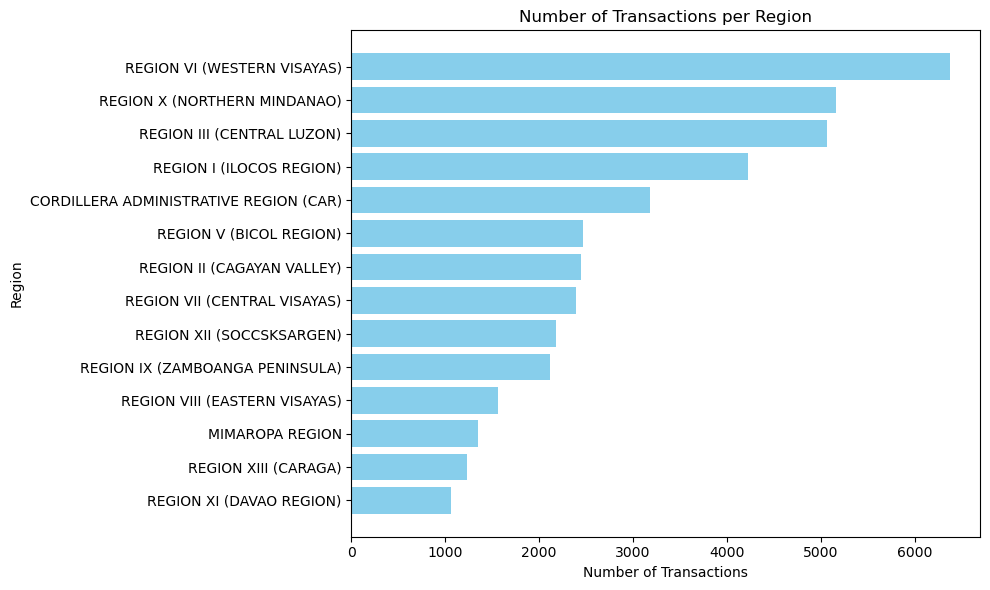

In [54]:
region_transaction_count = outgoing_df_customer_merged_df.groupby('REGION')['TRANSACTION_COUNT'].sum().reset_index()

region_transaction_count = region_transaction_count.sort_values(by='TRANSACTION_COUNT', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(region_transaction_count['REGION'], region_transaction_count['TRANSACTION_COUNT'], color='skyblue')
plt.xlabel('Number of Transactions')
plt.ylabel('Region')
plt.title('Number of Transactions per Region')
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

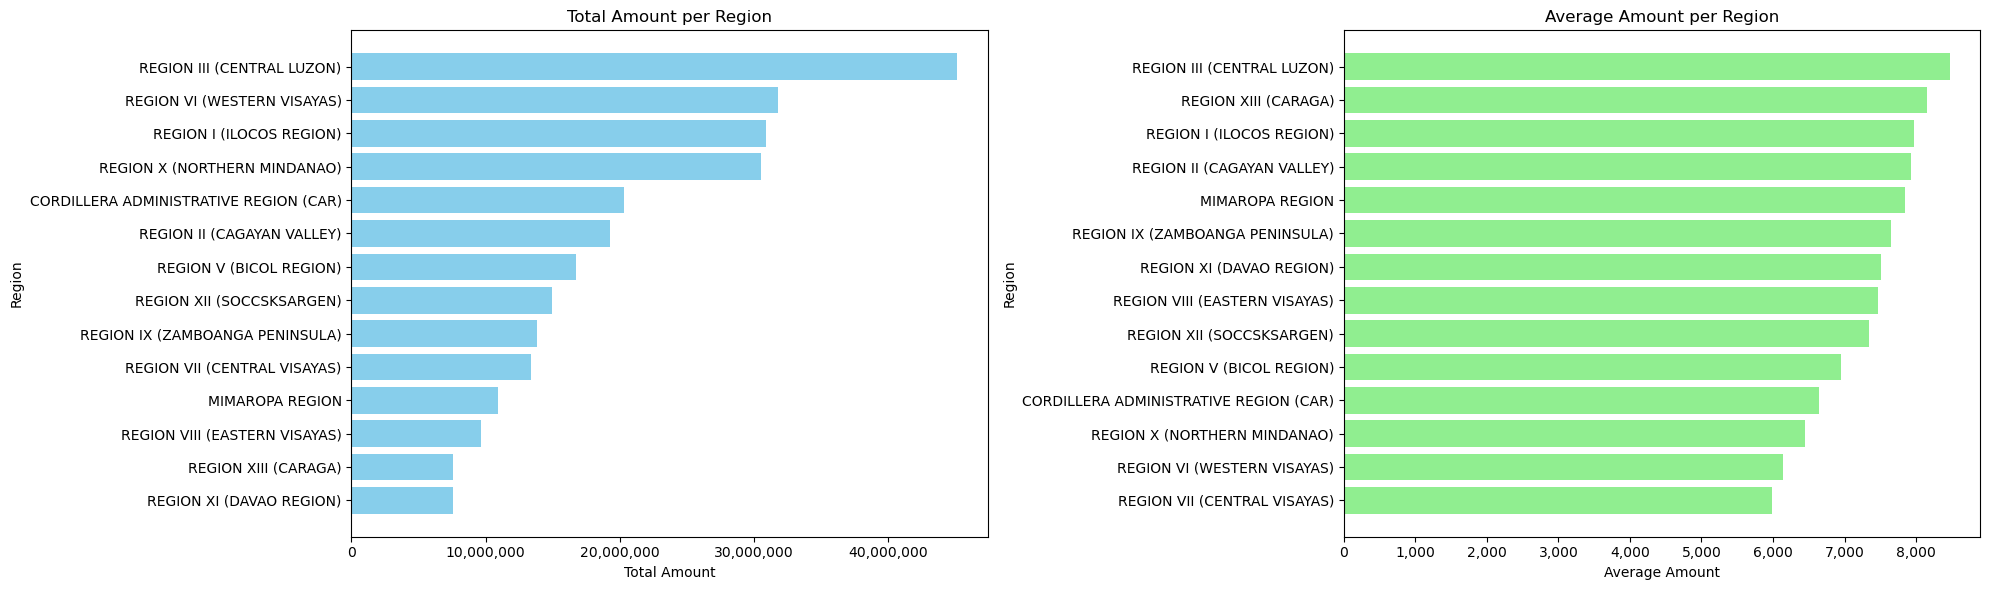

In [55]:
region_total_amount = outgoing_df_customer_merged_df.groupby('REGION')['TOTAL_AMOUNT'].sum().reset_index()
region_average_amount = outgoing_df_customer_merged_df.groupby('REGION')['AVERAGE_AMOUNT'].mean().reset_index()

region_total_amount = region_total_amount.sort_values(by='TOTAL_AMOUNT', ascending=False)
region_average_amount = region_average_amount.sort_values(by='AVERAGE_AMOUNT', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

def format_with_commas(x, pos):
    return "{:,}".format(int(x))

ax1.barh(region_total_amount['REGION'], region_total_amount['TOTAL_AMOUNT'], color='skyblue')
ax1.set_xlabel('Total Amount')
ax1.set_ylabel('Region')
ax1.set_title('Total Amount per Region')
ax1.invert_yaxis()
ax1.xaxis.set_major_formatter(mticker.FuncFormatter(format_with_commas))

ax2.barh(region_average_amount['REGION'], region_average_amount['AVERAGE_AMOUNT'], color='lightgreen')
ax2.set_xlabel('Average Amount')
ax2.set_ylabel('Region')
ax2.set_title('Average Amount per Region')
ax2.invert_yaxis()
ax2.xaxis.set_major_formatter(mticker.FuncFormatter(format_with_commas))

plt.tight_layout()

plt.show()

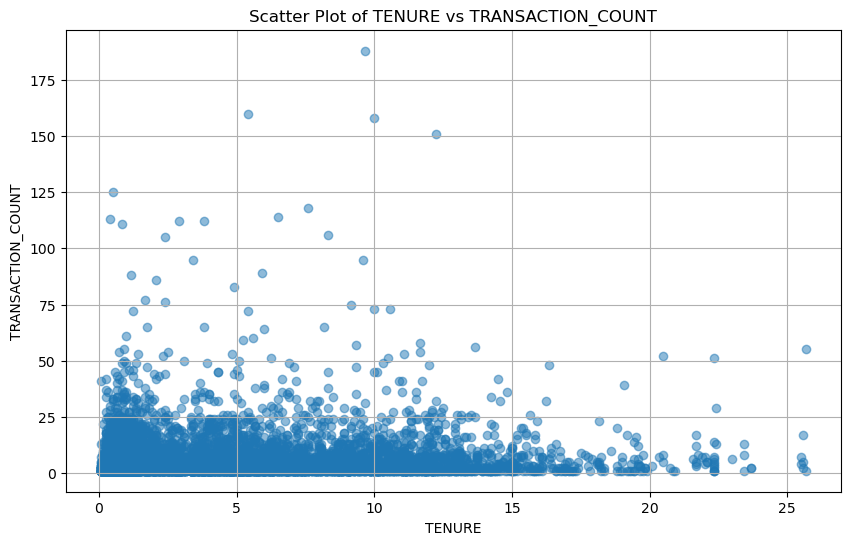

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(outgoing_df_customer_merged_df['TENURE'], outgoing_df_customer_merged_df['TRANSACTION_COUNT'], alpha=0.5)
plt.title('Scatter Plot of TENURE vs TRANSACTION_COUNT')
plt.xlabel('TENURE')
plt.ylabel('TRANSACTION_COUNT')
plt.grid(True)
plt.show()

## **MERGED DATASET**

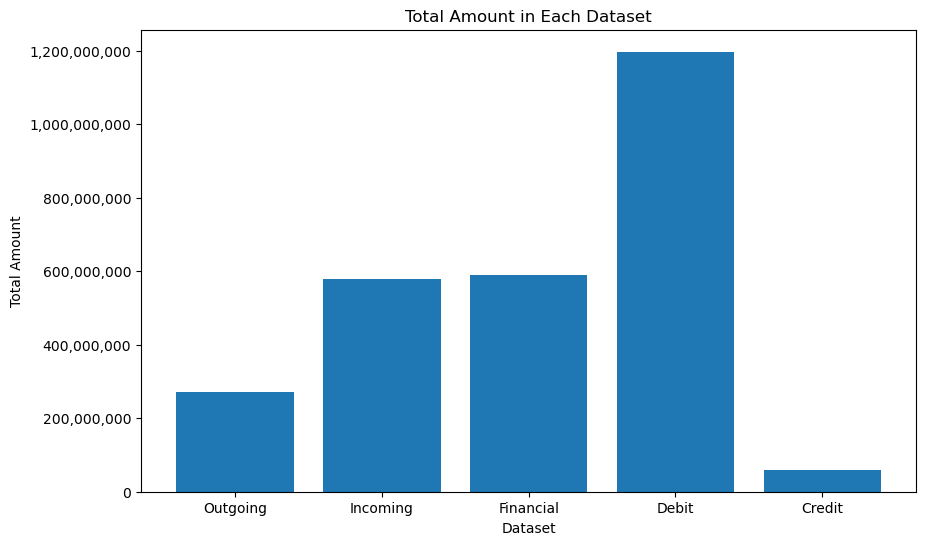

In [57]:
total_amounts = {
    'Outgoing': outgoing_df['AMOUNT'].sum(),
    'Incoming': incoming_df['AMOUNT'].sum(),
    'Financial': financial_df['AMOUNT'].sum(),
    'Debit': debit_df['AMOUNT'].sum(),
    'Credit': credit_df['AMOUNT'].sum()
}
plt.figure(figsize=(10, 6))
plt.bar(total_amounts.keys(), total_amounts.values())
plt.xlabel('Dataset')
plt.ylabel('Total Amount')
plt.title('Total Amount in Each Dataset')

formatter = mticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

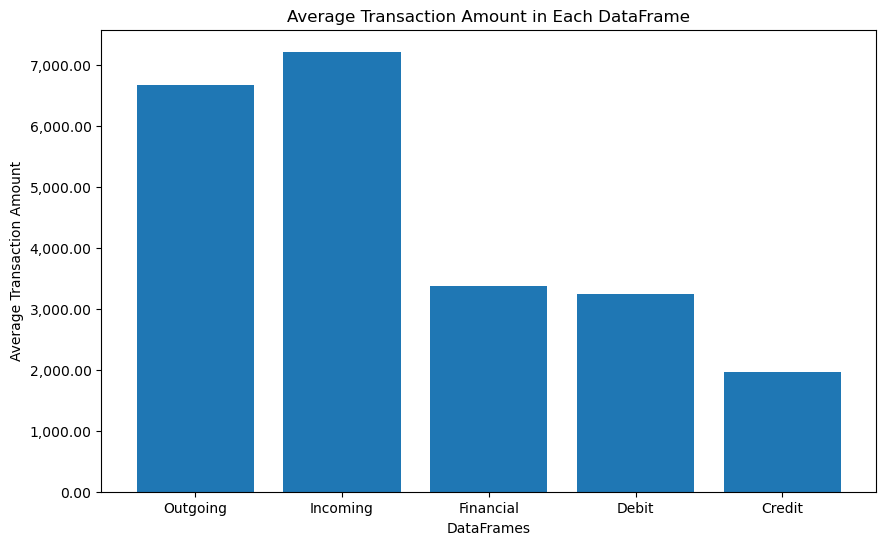

In [58]:
average_amounts = {
    'Outgoing': outgoing_df['AMOUNT'].mean(),
    'Incoming': incoming_df['AMOUNT'].mean(),
    'Financial': financial_df['AMOUNT'].mean(),
    'Debit': debit_df['AMOUNT'].mean(),
    'Credit': credit_df['AMOUNT'].mean()
}

plt.figure(figsize=(10, 6))
plt.bar(average_amounts.keys(), average_amounts.values())
plt.xlabel('DataFrames')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount in Each DataFrame')

formatter = mticker.StrMethodFormatter('{x:,.2f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [59]:
credit_df_by_customer = credit_df_by_customer.rename(columns={
    'TOTAL_AMOUNT': 'CREDIT_TOTAL_AMOUNT',
    'AVERAGE_AMOUNT': 'CREDIT_AVERAGE_AMOUNT',
    'PREFERRED_CHANNEL': 'CREDIT_PREFERRED_CHANNEL',
    'TRANSACTION_COUNT': 'CREDIT_TRANSACTION_COUNT'
})

debit_df_by_customer = debit_df_by_customer.rename(columns={
    'TOTAL_AMOUNT': 'DEBIT_TOTAL_AMOUNT',
    'AVERAGE_AMOUNT': 'DEBIT_AVERAGE_AMOUNT',
    'PREFERRED_CHANNEL': 'DEBIT_PREFERRED_CHANNEL',
    'TRANSACTION_COUNT': 'DEBIT_TRANSACTION_COUNT'
})

financial_df_by_customer = financial_df_by_customer.rename(columns={
    'TOTAL_AMOUNT': 'FINANCIAL_TOTAL_AMOUNT',
    'AVERAGE_AMOUNT': 'FINANCIAL_AVERAGE_AMOUNT',
    'PREFERRED_CHANNEL': 'FINANCIAL_PREFERRED_CHANNEL',
    'TRANSACTION_COUNT': 'FINANCIAL_TRANSACTION_COUNT'
})

incoming_df_by_customer = incoming_df_by_customer.rename(columns={
    'TOTAL_AMOUNT': 'INCOMING_TOTAL_AMOUNT',
    'AVERAGE_AMOUNT': 'INCOMING_AVERAGE_AMOUNT',
    'PREFERRED_CHANNEL': 'INCOMING_PREFERRED_CHANNEL',
    'TRANSACTION_COUNT': 'INCOMING_TRANSACTION_COUNT'
})

outgoing_df_by_customer = outgoing_df_by_customer.rename(columns={
    'TOTAL_AMOUNT': 'OUTGOING_TOTAL_AMOUNT',
    'AVERAGE_AMOUNT': 'OUTGOING_AVERAGE_AMOUNT',
    'PREFERRED_CHANNEL': 'OUTGOING_PREFERRED_CHANNEL',
    'TRANSACTION_COUNT': 'OUTGOING_TRANSACTION_COUNT'
})

merged_df = customer_df.merge(credit_df_by_customer, on='CUST_NUM', how='left')
merged_df = merged_df.merge(debit_df_by_customer, on='CUST_NUM', how='left')
merged_df = merged_df.merge(financial_df_by_customer, on='CUST_NUM', how='left')
merged_df = merged_df.merge(incoming_df_by_customer, on='CUST_NUM', how='left')
merged_df = merged_df.merge(outgoing_df_by_customer, on='CUST_NUM', how='left')

merged_df

CUST_NUM            PROVINCE  \
0      11712.654012             BENGUET   
1        436.605085             BENGUET   
2        921.989154             BENGUET   
3       1119.634762             BENGUET   
4       1709.755538             BENGUET   
...             ...                 ...   
46121  14060.827927      SULTAN KUDARAT   
46122  14101.987945      SULTAN KUDARAT   
46123  11266.634103  OCCIDENTAL MINDORO   
46124   8992.043372  OCCIDENTAL MINDORO   
46125  11776.173572  OCCIDENTAL MINDORO   

                                       REGION EDUCATION   AGE    TENURE  \
0      CORDILLERA ADMINISTRATIVE REGION (CAR)   NO_DATA  20.0  1.833333   
1      CORDILLERA ADMINISTRATIVE REGION (CAR)   NO_DATA  21.0  4.250000   
2      CORDILLERA ADMINISTRATIVE REGION (CAR)   NO_DATA  23.0  2.000000   
3      CORDILLERA ADMINISTRATIVE REGION (CAR)       LOW  13.0  5.583333   
4      CORDILLERA ADMINISTRATIVE REGION (CAR)   NO_DATA  20.0  1.250000   
...                                       ...       ...   ...       ...   
46121               REGION XII (SOCCSKSARGEN)       MID  34.0  9.916667   
46122               REGION XII (SOCCSKSARGEN)   NO_DATA  25.0  2.000000   
46123                         MIMAROPA REGION   NO_DATA  30.0  2.750000   
46124                         MIMAROPA REGION   NO_DATA  53.0  2.916667   
46125                         MIMAROPA REGION       MID  28.0  1.833333   

      BUSINESS_OWNER DIGITAL_FLAG INCOME_SOURCE  IDV_OR_ORG  ...  \
0                  N      DIGITAL     ALLOWANCE           1  ...   
1                  N      NO_DATA        SALARY           1  ...   
2                  N  TRADITIONAL     ALLOWANCE           1  ...   
3                  N  TRADITIONAL     ALLOWANCE           1  ...   
4                  N      DIGITAL        SALARY           1  ...   
...              ...          ...           ...         ...  ...   
46121              N  TRADITIONAL        SALARY           1  ...   
46122              N      DIGITAL        SALARY           1  ...   
46123              N      DIGITAL        SALARY           1  ...   
46124              N  TRADITIONAL        SALARY           1  ...   
46125              N      DIGITAL        SALARY           1  ...   

       INCOMING_TOTAL_AMOUNT INCOMING_AVERAGE_AMOUNT PREFERRED_BPI_ACCT_TYPE  \
0               13095.957256             2619.191451                      SA   
1                        NaN                     NaN                     NaN   
2               13396.837358             3349.209339                      SA   
3                        NaN                     NaN                     NaN   
4               15546.981865             3886.745466                      SA   
...                      ...                     ...                     ...   
46121            8399.157542             4199.578771                      SA   
46122                    NaN                     NaN                     NaN   
46123                    NaN                     NaN                     NaN   
46124                    NaN                     NaN                     NaN   
46125           30450.762108             2342.366316                      SA   

      PREFERRED_SRC_BANK_NAME  INCOMING_TRANSACTION_COUNT  \
0                       HUMAN                         5.0   
1                         NaN                         NaN   
2                       HUMAN                         4.0   
3                         NaN                         NaN   
4                         CAT                         4.0   
...                       ...                         ...   
46121                   HUMAN                         2.0   
46122                     NaN                         NaN   
46123                     NaN                         NaN   
46124                     NaN                         NaN   
46125                   HUMAN                        13.0   

       OUTGOING_TOTAL_AMOUNT OUTGOING_AVERAGE_AMOUNT  \
0               27643.9758

In [60]:
merged_df_no_null = merged_df.dropna()
merged_df_no_null

CUST_NUM               PROVINCE  \
2596    9184.151784               BUKIDNON   
3383   12335.892509       ORIENTAL MINDORO   
3452    1046.127143                BENGUET   
3584    2707.940177                BENGUET   
3605    6223.253169                BENGUET   
...             ...                    ...   
45633   8037.779669                ANTIQUE   
45837  13075.265275                ANTIQUE   
45844  13222.890002                ANTIQUE   
45943  10605.989063  SAMAR (WESTERN SAMAR)   
46113  13671.029369         SULTAN KUDARAT   

                                       REGION EDUCATION   AGE     TENURE  \
2596             REGION X (NORTHERN MINDANAO)       LOW  22.0   3.166667   
3383                          MIMAROPA REGION       LOW  22.0   3.500000   
3452   CORDILLERA ADMINISTRATIVE REGION (CAR)      HIGH  28.0   6.083333   
3584   CORDILLERA ADMINISTRATIVE REGION (CAR)       MID  35.0  16.333333   
3605   CORDILLERA ADMINISTRATIVE REGION (CAR)       MID  44.0  20.916667   
...                                       ...       ...   ...        ...   
45633             REGION VI (WESTERN VISAYAS)       MID  43.0   8.750000   
45837             REGION VI (WESTERN VISAYAS)       MID  33.0   6.916667   
45844             REGION VI (WESTERN VISAYAS)       MID  49.0  23.666667   
45943           REGION VIII (EASTERN VISAYAS)       MID  26.0   4.916667   
46113               REGION XII (SOCCSKSARGEN)   NO_DATA  34.0   2.750000   

      BUSINESS_OWNER DIGITAL_FLAG INCOME_SOURCE  IDV_OR_ORG  ...  \
2596               N      DIGITAL        SALARY           1  ...   
3383               N      DIGITAL        SALARY           1  ...   
3452               N      DIGITAL        SALARY           1  ...   
3584               N      DIGITAL        SALARY           1  ...   
3605               N      DIGITAL        SALARY           1  ...   
...              ...          ...           ...         ...  ...   
45633              N      DIGITAL        SALARY           1  ...   
45837              N      DIGITAL        SALARY           1  ...   
45844              N      DIGITAL        SALARY           1  ...   
45943              N      DIGITAL     ALLOWANCE           1  ...   
46113              N      DIGITAL        SALARY           1  ...   

       INCOMING_TOTAL_AMOUNT INCOMING_AVERAGE_AMOUNT PREFERRED_BPI_ACCT_TYPE  \
2596             1110.928737             1110.928737                      SA   
3383            31251.894859             2403.991912                      SA   
3452           187779.803759            17070.891251                      SA   
3584           159838.685940            12295.283534                      SA   
3605           119946.672243            23989.334449                      SA   
...                      ...                     ...                     ...   
45633            1198.688032             1198.688032                      SA   
45837           13663.019343             3415.754836                      SA   
45844            3893.642268             1946.821134                      SA   
45943            1549.523756             1549.523756                      SA   
46113           64965.528847             9280.789835                      SA   

      PREFERRED_SRC_BANK_NAME  INCOMING_TRANSACTION_COUNT  \
2596                    HUMAN                         1.0   
3383                    HUMAN                        13.0   
3452                    KOALA                        11.0   
3584                    HUMAN                        13.0   
3605                      DOG                         5.0   
...                       ...                         ...   
45633                   HUMAN                         1.0   
45837                 GIRAFFE                         4.0   
45844                   HUMAN                         2.0   
45943                ELEPHANT                         1.0   
46113                     DOG                         7.0   

       OUTGOING_TOTAL_AMOUNT OUTGO

In [61]:
columns_to_fill = [
    'CREDIT_TOTAL_AMOUNT', 'CREDIT_AVERAGE_AMOUNT',
    'DEBIT_TOTAL_AMOUNT', 'DEBIT_AVERAGE_AMOUNT',
    'FINANCIAL_TOTAL_AMOUNT', 'FINANCIAL_AVERAGE_AMOUNT',
    'INCOMING_TOTAL_AMOUNT', 'INCOMING_AVERAGE_AMOUNT',
    'OUTGOING_TOTAL_AMOUNT', 'OUTGOING_AVERAGE_AMOUNT',
    'CREDIT_TRANSACTION_COUNT', 'DEBIT_TRANSACTION_COUNT',
    'FINANCIAL_TRANSACTION_COUNT', 'INCOMING_TRANSACTION_COUNT',
    'OUTGOING_TRANSACTION_COUNT'
]

merged_df[columns_to_fill] = merged_df[columns_to_fill].fillna(0)

In [62]:
merged_df['GENERATION'] = merged_df['AGE'].apply(lambda x: 'Millennial' if x < 40 else 'Older Generation')

total_amount_columns = [col for col in merged_df.columns if 'TOTAL_AMOUNT' in col]

merged_df['TOTAL_AMOUNT_SUM'] = merged_df[total_amount_columns].sum(axis=1)

merged_df = merged_df[merged_df['TOTAL_AMOUNT_SUM'] != 0]

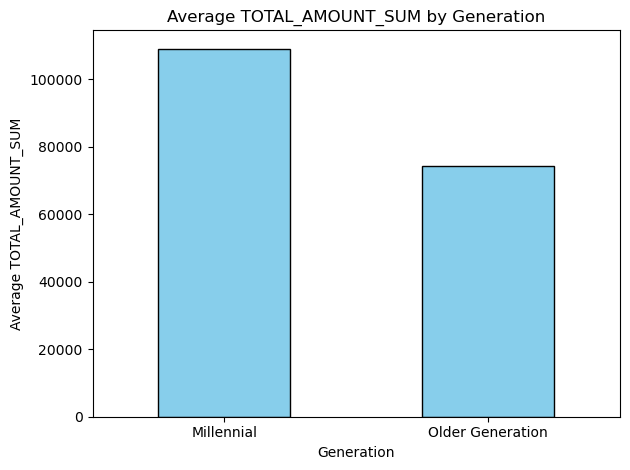

In [63]:
average_total_amount_by_generation = merged_df.groupby('GENERATION')['TOTAL_AMOUNT_SUM'].mean()

average_total_amount_by_generation.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Generation')
plt.ylabel('Average TOTAL_AMOUNT_SUM')
plt.title('Average TOTAL_AMOUNT_SUM by Generation')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

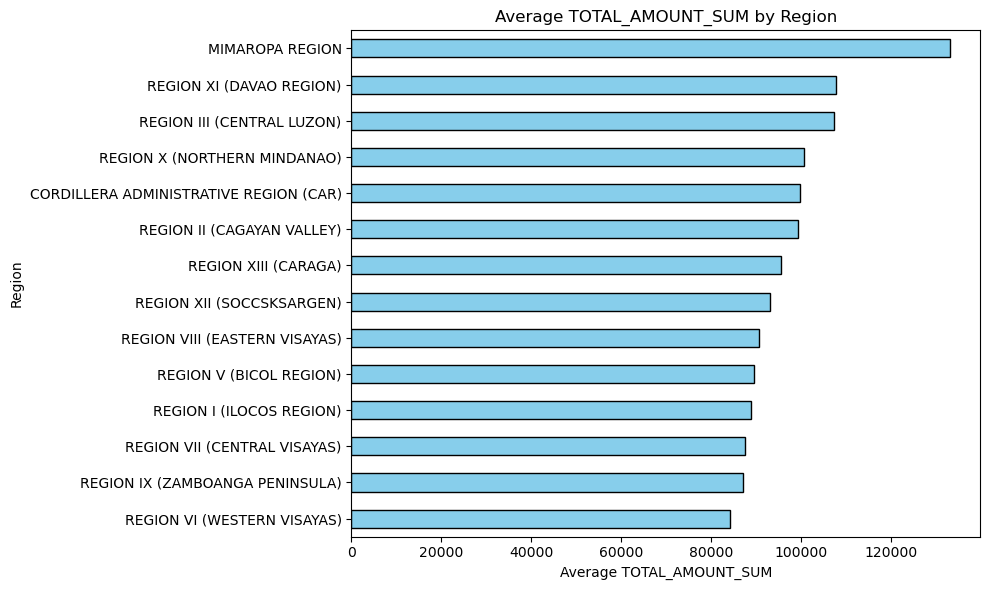

In [64]:
average_total_amount_by_region = merged_df.groupby('REGION')['TOTAL_AMOUNT_SUM'].mean()

plt.figure(figsize=(10, 6))
average_total_amount_by_region.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Average TOTAL_AMOUNT_SUM')
plt.ylabel('Region')
plt.title('Average TOTAL_AMOUNT_SUM by Region')
plt.tight_layout()

plt.show()

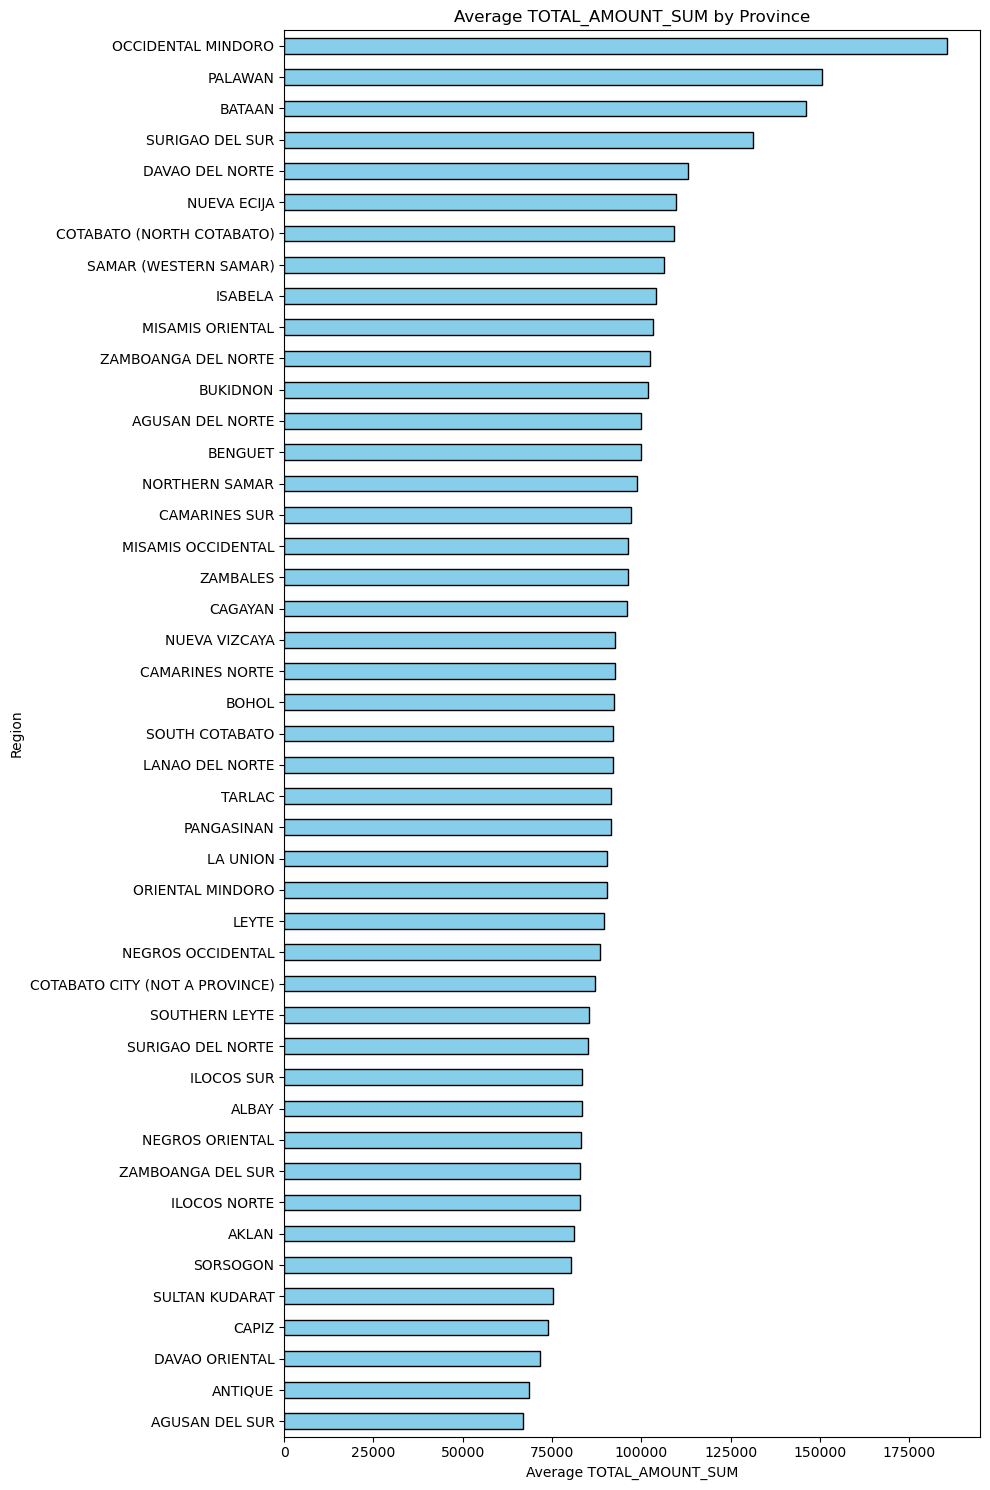

In [65]:
average_total_amount_by_province = merged_df.groupby('PROVINCE')['TOTAL_AMOUNT_SUM'].mean()

plt.figure(figsize=(10, 15))
average_total_amount_by_province.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Average TOTAL_AMOUNT_SUM')
plt.ylabel('Region')
plt.title('Average TOTAL_AMOUNT_SUM by Province')
plt.tight_layout()

plt.show()

C:\Users\Mykiell\AppData\Local\Temp\ipykernel_1368\1390174688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['TOTAL_TRANSACTION_COUNT'] = merged_df[transaction_count_columns].sum(axis=1)


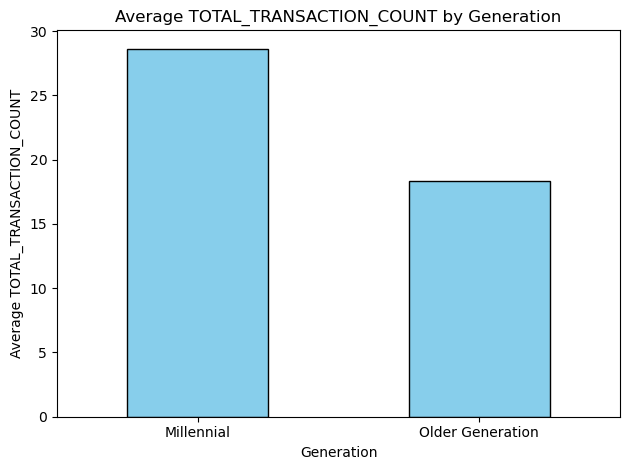

In [66]:
transaction_count_columns = [col for col in merged_df.columns if 'TRANSACTION_COUNT' in col]

merged_df['TOTAL_TRANSACTION_COUNT'] = merged_df[transaction_count_columns].sum(axis=1)

average_transaction_count_by_generation = merged_df.groupby('GENERATION')['TOTAL_TRANSACTION_COUNT'].mean()

average_transaction_count_by_generation.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Generation')
plt.ylabel('Average TOTAL_TRANSACTION_COUNT')
plt.title('Average TOTAL_TRANSACTION_COUNT by Generation')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

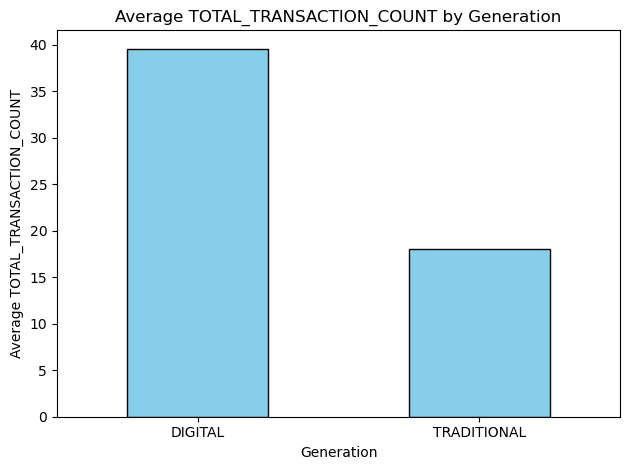

In [67]:
merged_df_digital_flag_filtered = merged_df[merged_df["DIGITAL_FLAG"] != "NO_DATA"]

average_transaction_count_by_digital_flag = merged_df_digital_flag_filtered.groupby('DIGITAL_FLAG')['TOTAL_TRANSACTION_COUNT'].mean()

average_transaction_count_by_digital_flag.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Generation')
plt.ylabel('Average TOTAL_TRANSACTION_COUNT')
plt.title('Average TOTAL_TRANSACTION_COUNT by Generation')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [68]:
merged_df

CUST_NUM            PROVINCE  \
0      11712.654012             BENGUET   
2        921.989154             BENGUET   
3       1119.634762             BENGUET   
4       1709.755538             BENGUET   
6       1964.683690             BENGUET   
...             ...                 ...   
46118  13908.768601      SULTAN KUDARAT   
46121  14060.827927      SULTAN KUDARAT   
46123  11266.634103  OCCIDENTAL MINDORO   
46124   8992.043372  OCCIDENTAL MINDORO   
46125  11776.173572  OCCIDENTAL MINDORO   

                                       REGION EDUCATION   AGE    TENURE  \
0      CORDILLERA ADMINISTRATIVE REGION (CAR)   NO_DATA  20.0  1.833333   
2      CORDILLERA ADMINISTRATIVE REGION (CAR)   NO_DATA  23.0  2.000000   
3      CORDILLERA ADMINISTRATIVE REGION (CAR)       LOW  13.0  5.583333   
4      CORDILLERA ADMINISTRATIVE REGION (CAR)   NO_DATA  20.0  1.250000   
6      CORDILLERA ADMINISTRATIVE REGION (CAR)       LOW  22.0  5.333333   
...                                       ...       ...   ...       ...   
46118               REGION XII (SOCCSKSARGEN)   NO_DATA  54.0  2.083333   
46121               REGION XII (SOCCSKSARGEN)       MID  34.0  9.916667   
46123                         MIMAROPA REGION   NO_DATA  30.0  2.750000   
46124                         MIMAROPA REGION   NO_DATA  53.0  2.916667   
46125                         MIMAROPA REGION       MID  28.0  1.833333   

      BUSINESS_OWNER DIGITAL_FLAG INCOME_SOURCE  IDV_OR_ORG  ...  \
0                  N      DIGITAL     ALLOWANCE           1  ...   
2                  N  TRADITIONAL     ALLOWANCE           1  ...   
3                  N  TRADITIONAL     ALLOWANCE           1  ...   
4                  N      DIGITAL        SALARY           1  ...   
6                  N  TRADITIONAL     ALLOWANCE           1  ...   
...              ...          ...           ...         ...  ...   
46118              N  TRADITIONAL        SALARY           1  ...   
46121              N  TRADITIONAL        SALARY           1  ...   
46123              N      DIGITAL        SALARY           1  ...   
46124              N  TRADITIONAL        SALARY           1  ...   
46125              N      DIGITAL        SALARY           1  ...   

       PREFERRED_SRC_BANK_NAME INCOMING_TRANSACTION_COUNT  \
0                        HUMAN                        5.0   
2                        HUMAN                        4.0   
3                          NaN                        0.0   
4                          CAT                        4.0   
6                      GIRAFFE                        6.0   
...                        ...                        ...   
46118                    HUMAN                        3.0   
46121                    HUMAN                        2.0   
46123                      NaN                        0.0   
46124                      NaN                        0.0   
46125                    HUMAN                       13.0   

      OUTGOING_TOTAL_AMOUNT OUTGOING_AVERAGE_AMOUNT  \
0              27643.975823             1626.116225   
2                  0.000000                0.000000   
3                  0.000000                0.000000   
4                  0.000000                0.000000   
6                  0.000000                0.000000   
...                     ...                     ...   
46118              0.000000                0.000000   
46121              0.000000                0.000000   
46123         168147.211967             8007.010094   
46124              0.000000                0.000000   
46125              0.000000                0.000000   

       OUTGOING_PREFERRED_CHANNEL  PREFERRED_RCV_BANK_NAME  \
0                          MOBILE                    HUMAN   
2                             NaN                      NaN   
3                             NaN                      NaN   
4                             NaN                      NaN   
6                             NaN                      NaN   
...       

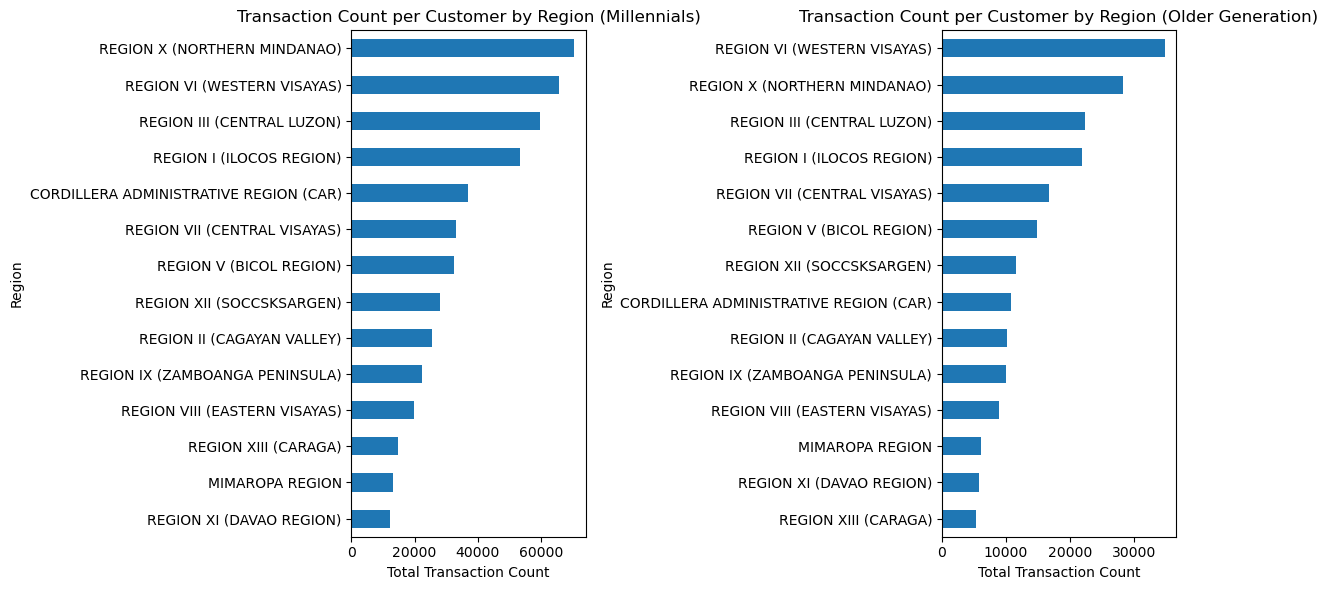

In [69]:
millennial_df = merged_df[merged_df['GENERATION'] == 'Millennial']
older_generation_df = merged_df[merged_df['GENERATION'] == 'Older Generation']

millennial_transaction_count = millennial_df.groupby('REGION')['TOTAL_TRANSACTION_COUNT'].sum().sort_values(ascending=True)
older_generation_transaction_count = older_generation_df.groupby('REGION')['TOTAL_TRANSACTION_COUNT'].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
millennial_transaction_count.plot(kind='barh')
plt.xlabel('Total Transaction Count')
plt.ylabel('Region')
plt.title('Transaction Count per Customer by Region (Millennials)')

plt.subplot(1, 2, 2)
older_generation_transaction_count.plot(kind='barh')
plt.xlabel('Total Transaction Count')
plt.ylabel('Region')
plt.title('Transaction Count per Customer by Region (Older Generation)')

plt.tight_layout()

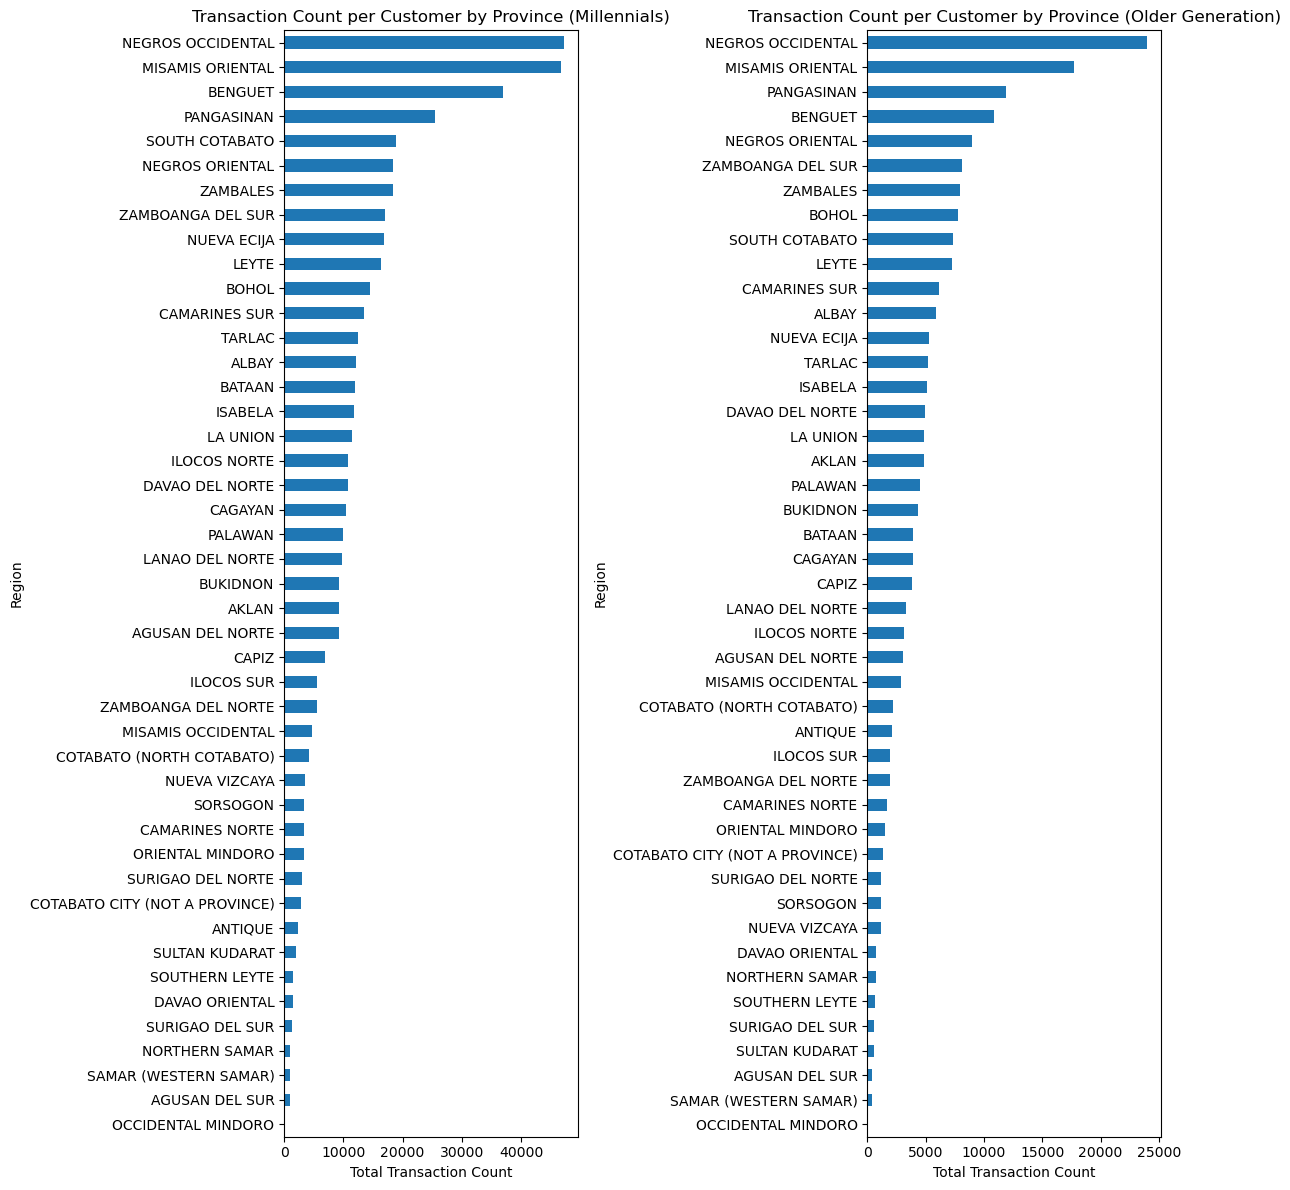

In [70]:
millennial_transaction_count_province = millennial_df.groupby('PROVINCE')['TOTAL_TRANSACTION_COUNT'].sum().sort_values(ascending=True)
older_generation_transaction_count_province = older_generation_df.groupby('PROVINCE')['TOTAL_TRANSACTION_COUNT'].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
millennial_transaction_count_province.plot(kind='barh')
plt.xlabel('Total Transaction Count')
plt.ylabel('Region')
plt.title('Transaction Count per Customer by Province (Millennials)')

plt.subplot(1, 2, 2)
older_generation_transaction_count_province.plot(kind='barh')
plt.xlabel('Total Transaction Count')
plt.ylabel('Region')
plt.title('Transaction Count per Customer by Province (Older Generation)')

plt.tight_layout()

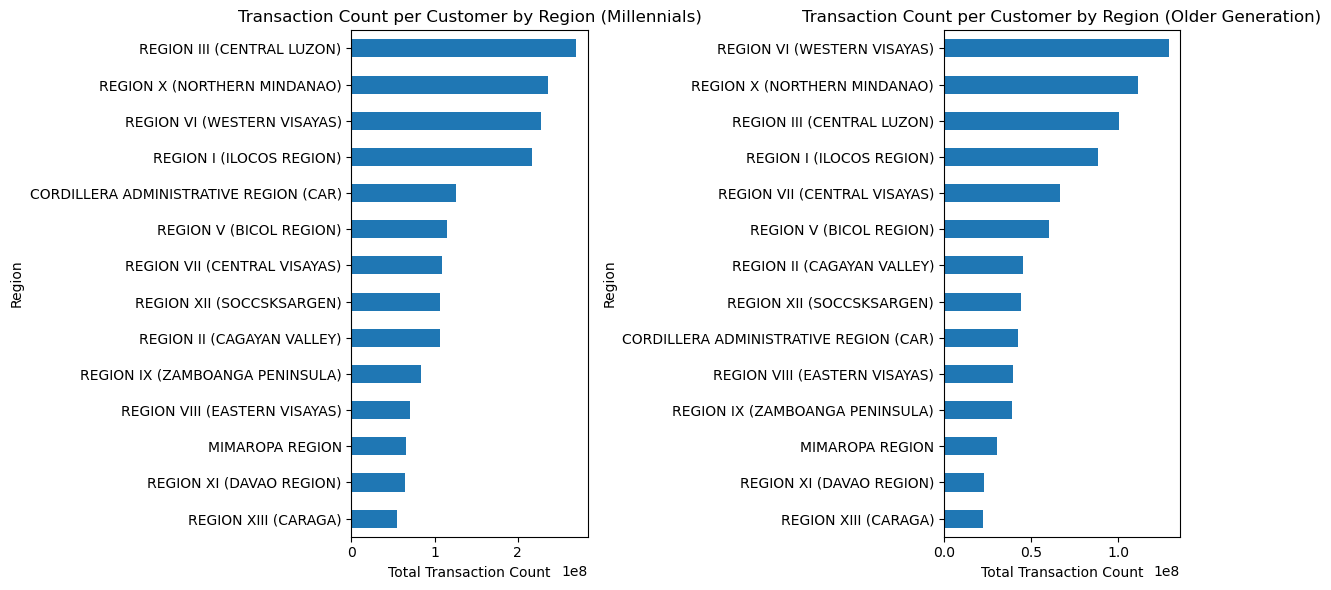

In [71]:
millennial_total_amount_region = millennial_df.groupby('REGION')['TOTAL_AMOUNT_SUM'].sum().sort_values(ascending=True)
older_generation_total_amount_region = older_generation_df.groupby('REGION')['TOTAL_AMOUNT_SUM'].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
millennial_total_amount_region.plot(kind='barh')
plt.xlabel('Total Transaction Count')
plt.ylabel('Region')
plt.title('Transaction Count per Customer by Region (Millennials)')

plt.subplot(1, 2, 2)
older_generation_total_amount_region.plot(kind='barh')
plt.xlabel('Total Transaction Count')
plt.ylabel('Region')
plt.title('Transaction Count per Customer by Region (Older Generation)')

plt.tight_layout()

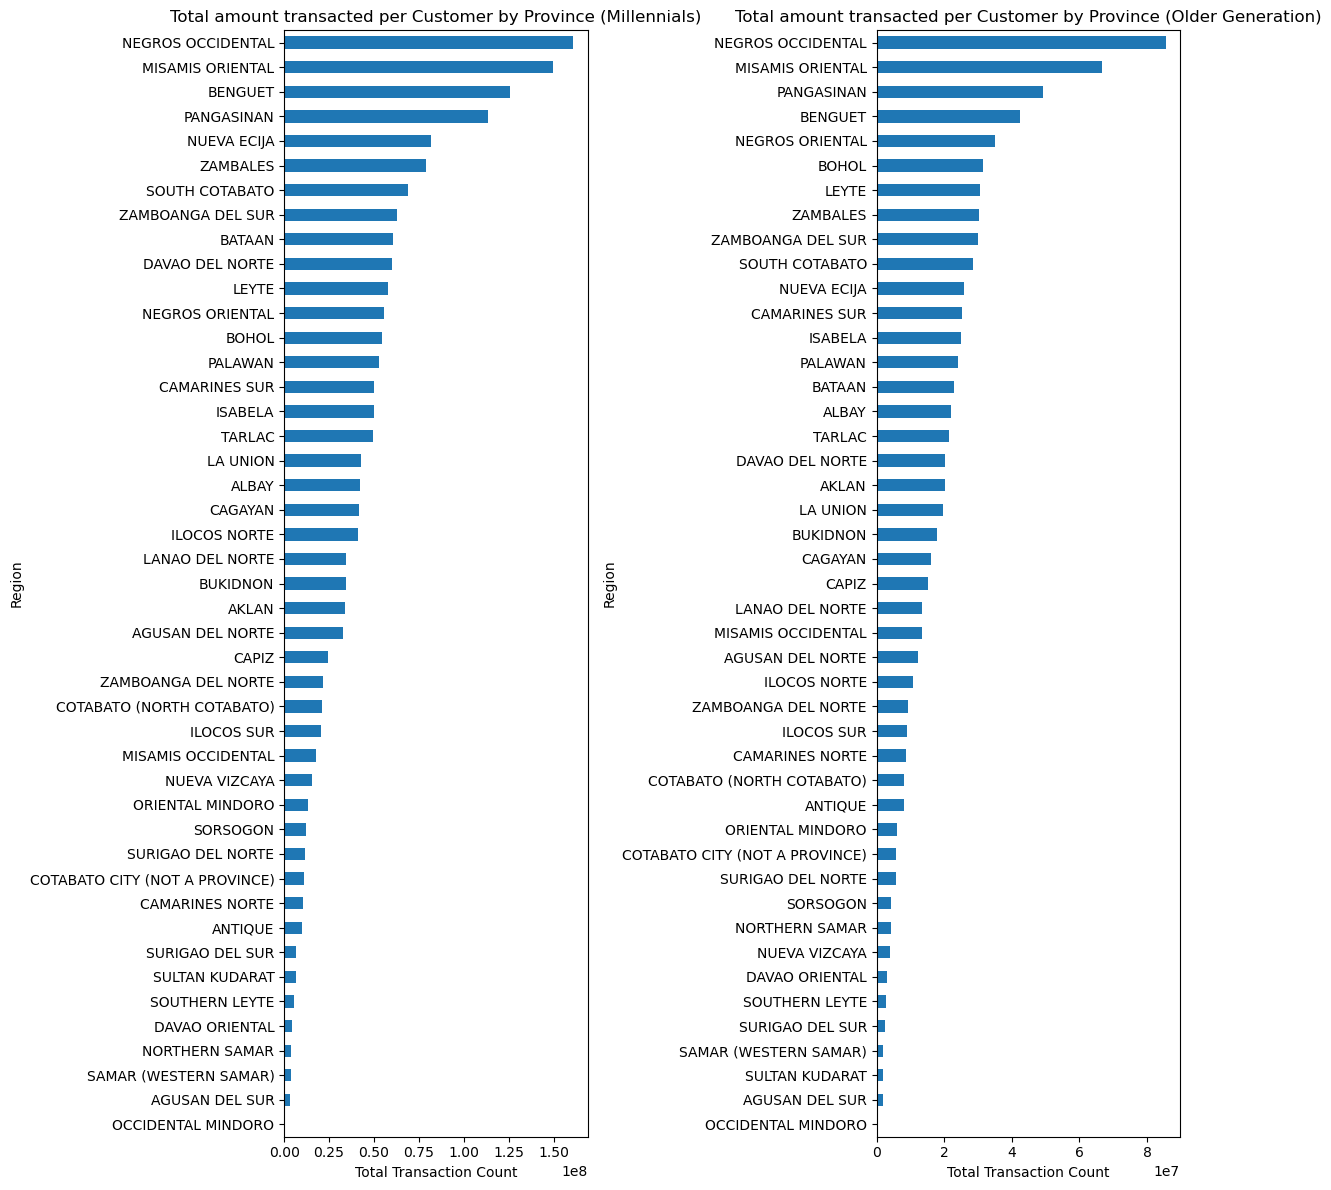

In [72]:
millennial_total_amount_province = millennial_df.groupby('PROVINCE')['TOTAL_AMOUNT_SUM'].sum().sort_values(ascending=True)
older_generation_total_amount_province = older_generation_df.groupby('PROVINCE')['TOTAL_AMOUNT_SUM'].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
millennial_total_amount_province.plot(kind='barh')
plt.xlabel('Total Transaction Count')
plt.ylabel('Region')
plt.title('Total amount transacted per Customer by Province (Millennials)')

plt.subplot(1, 2, 2)
older_generation_total_amount_province.plot(kind='barh')
plt.xlabel('Total Transaction Count')
plt.ylabel('Region')
plt.title('Total amount transacted per Customer by Province (Older Generation)')

plt.tight_layout()

## **NARRATIVE**

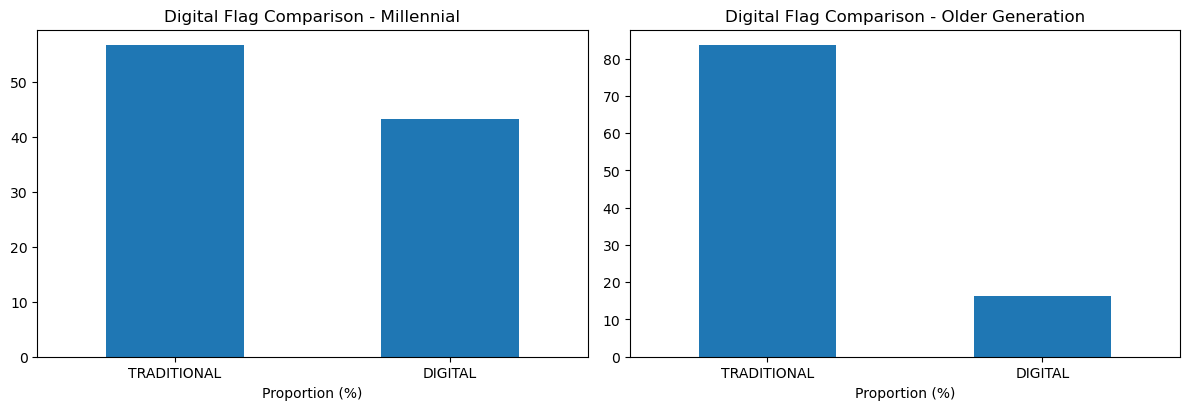

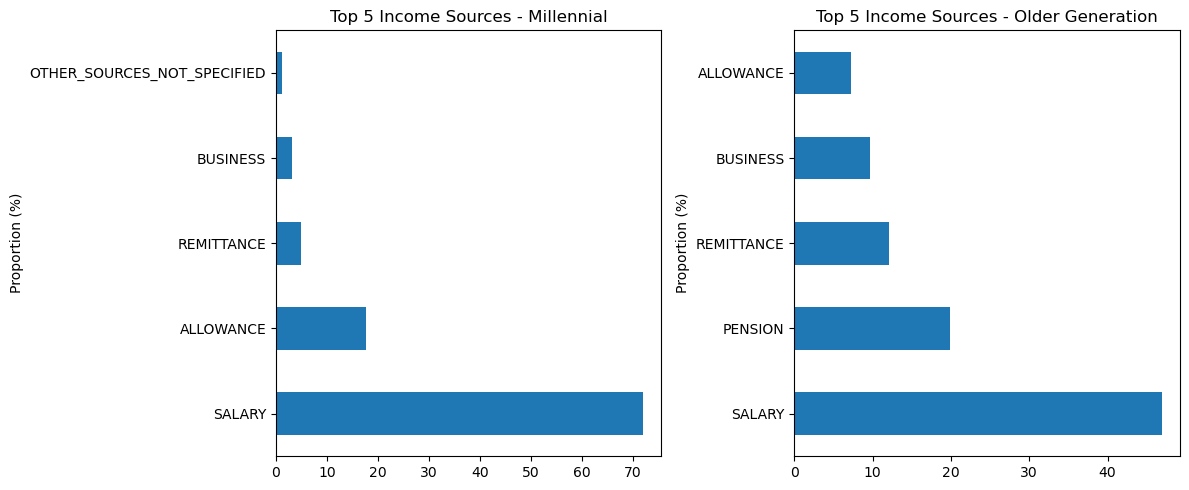

In [73]:
def categorize_generation(age):
    if age < 40:
        return "Millennial"
    else:
        return "Older Generation"

customer_df['GENERATION'] = customer_df['AGE'].apply(categorize_generation)

millennial_df = customer_df[customer_df['GENERATION'] == 'Millennial']
older_gen_df = customer_df[customer_df['GENERATION'] == 'Older Generation']

if not millennial_df.empty:
    millennial_digital_flag = millennial_df[millennial_df['DIGITAL_FLAG'] != 'NO_DATA']
    millennial_digital_flag_proportions = millennial_digital_flag['DIGITAL_FLAG'].value_counts(normalize=True) * 100

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.title('Digital Flag Comparison - Millennial')
    plt.xlabel('Proportion (%)')
    millennial_digital_flag_proportions.plot(kind='bar')
    plt.xticks(rotation=0)

if not older_gen_df.empty:
    older_gen_digital_flag = older_gen_df[older_gen_df['DIGITAL_FLAG'] != 'NO_DATA']
    older_gen_digital_flag_proportions = older_gen_digital_flag['DIGITAL_FLAG'].value_counts(normalize=True) * 100

    plt.subplot(1, 2, 2)
    plt.title('Digital Flag Comparison - Older Generation')
    plt.xlabel('Proportion (%)')
    older_gen_digital_flag_proportions.plot(kind='bar')
    plt.tight_layout()
    plt.xticks(rotation=0)
    plt.show()

if not millennial_df.empty:
    millennial_income_source = millennial_df[millennial_df['INCOME_SOURCE'] != 'NO_DATA']
    millennial_income_source_proportions = millennial_income_source['INCOME_SOURCE'].value_counts(normalize=True) * 100
    millennial_income_source_proportions = millennial_income_source_proportions.sort_values(ascending=False).head(5)

if not older_gen_df.empty:
    older_gen_income_source = older_gen_df[older_gen_df['INCOME_SOURCE'] != 'NO_DATA']
    older_gen_income_source_proportions = older_gen_income_source['INCOME_SOURCE'].value_counts(normalize=True) * 100
    older_gen_income_source_proportions = older_gen_income_source_proportions.sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Top 5 Income Sources - Millennial')
plt.ylabel('Proportion (%)', rotation=90)
millennial_income_source_proportions.plot(kind='barh')

plt.subplot(1, 2, 2)
plt.title('Top 5 Income Sources - Older Generation')
plt.ylabel('Proportion (%)', rotation=90)
older_gen_income_source_proportions.plot(kind='barh')
plt.tight_layout()
plt.show()


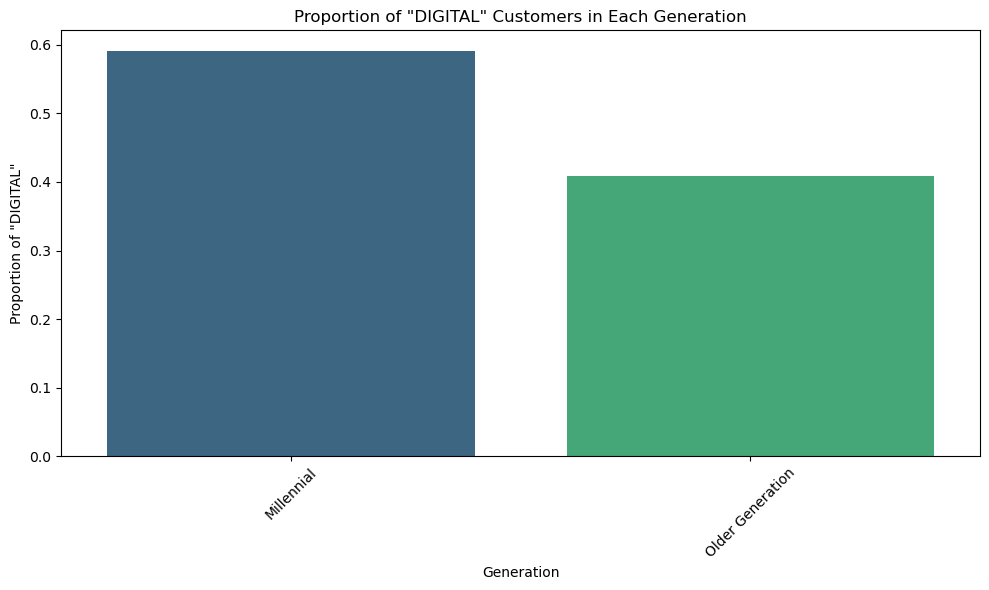

In [74]:
customer_df_cleaned = customer_df[customer_df['DIGITAL_FLAG'] == 'DIGITAL']

generation_proportions = customer_df['GENERATION'].value_counts(normalize=True).reset_index()
generation_proportions.columns = ['GENERATION', 'PROPORTION']

plt.figure(figsize=(10, 6))
sns.barplot(x='GENERATION', y='PROPORTION', data=generation_proportions, palette='viridis')
plt.xlabel('Generation')
plt.ylabel('Proportion of "DIGITAL"')
plt.title('Proportion of "DIGITAL" Customers in Each Generation')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

C:\Users\Mykiell\AppData\Local\Temp\ipykernel_1368\1354368019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['GENERATION'] = np.where(merged_df['AGE'] < 40, 'Millennial', 'Older Generation')


<Figure size 1200x800 with 0 Axes>

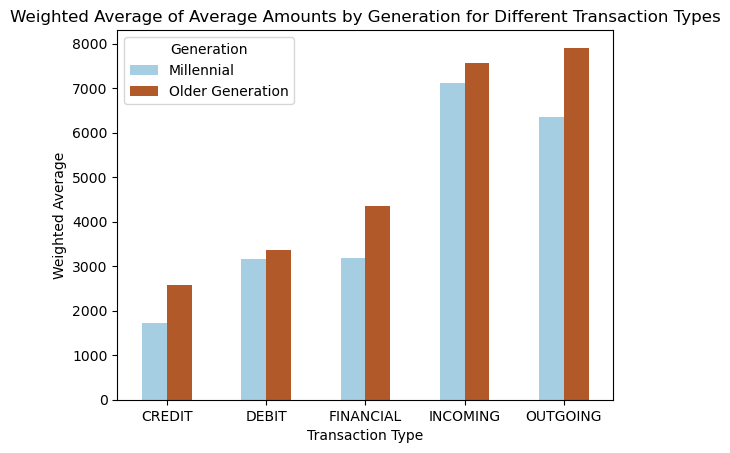

In [75]:
merged_df['GENERATION'] = np.where(merged_df['AGE'] < 40, 'Millennial', 'Older Generation')

transaction_types = ['CREDIT', 'DEBIT', 'FINANCIAL', 'INCOMING', 'OUTGOING']
average_amount_columns = ['CREDIT_AVERAGE_AMOUNT', 'DEBIT_AVERAGE_AMOUNT', 'FINANCIAL_AVERAGE_AMOUNT', 'INCOMING_AVERAGE_AMOUNT', 'OUTGOING_AVERAGE_AMOUNT']
transaction_count_columns = ['CREDIT_TRANSACTION_COUNT', 'DEBIT_TRANSACTION_COUNT', 'FINANCIAL_TRANSACTION_COUNT', 'INCOMING_TRANSACTION_COUNT', 'OUTGOING_TRANSACTION_COUNT']

results_df = pd.DataFrame(index=transaction_types, columns=['Millennial', 'Older Generation'])

for i, transaction_type in enumerate(transaction_types):
    weighted_average = merged_df.groupby('GENERATION').apply(lambda x: (x[average_amount_columns[i]] * x[transaction_count_columns[i]]).sum() / x[transaction_count_columns[i]].sum())
    results_df.loc[transaction_type] = weighted_average

plt.figure(figsize=(12, 8))
results_df.plot(kind='bar', colormap='Paired')
plt.title('Weighted Average of Average Amounts by Generation for Different Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Weighted Average')
plt.xticks(rotation=0)
plt.legend(title='Generation')
plt.show()


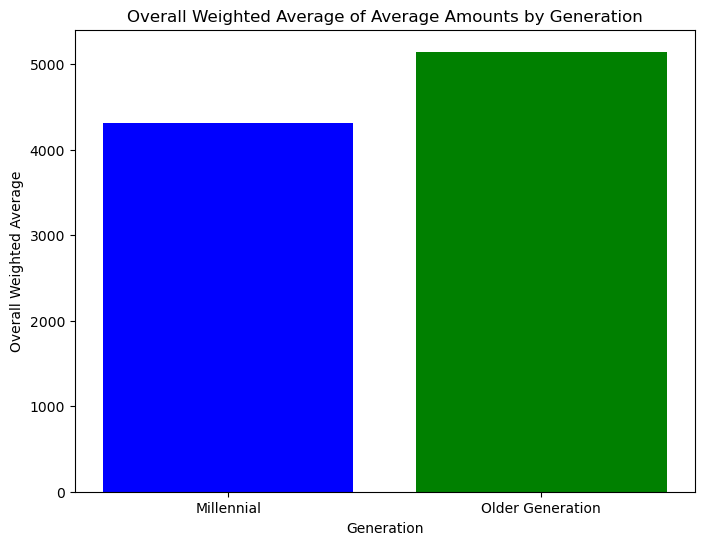

In [76]:
transaction_types = ['CREDIT', 'DEBIT', 'FINANCIAL', 'INCOMING', 'OUTGOING']
average_amount_columns = ['CREDIT_AVERAGE_AMOUNT', 'DEBIT_AVERAGE_AMOUNT', 'FINANCIAL_AVERAGE_AMOUNT', 'INCOMING_AVERAGE_AMOUNT', 'OUTGOING_AVERAGE_AMOUNT']
transaction_count_columns = ['CREDIT_TRANSACTION_COUNT', 'DEBIT_TRANSACTION_COUNT', 'FINANCIAL_TRANSACTION_COUNT', 'INCOMING_TRANSACTION_COUNT', 'OUTGOING_TRANSACTION_COUNT']

weighted_averages = []

for i, transaction_type in enumerate(transaction_types):
    weighted_average = merged_df.groupby('GENERATION').apply(lambda x: (x[average_amount_columns[i]] * x[transaction_count_columns[i]]).sum() / x[transaction_count_columns[i]].sum())
    weighted_averages.append(weighted_average)

overall_average = sum(weighted_averages) / len(weighted_averages)

plt.figure(figsize=(8, 6))
plt.bar(['Millennial', 'Older Generation'], [overall_average['Millennial'], overall_average['Older Generation']], color=['blue', 'green'])
plt.title('Overall Weighted Average of Average Amounts by Generation')
plt.xlabel('Generation')
plt.ylabel('Overall Weighted Average')
plt.show()

C:\Users\Mykiell\AppData\Local\Temp\ipykernel_1368\1850188659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[amount_columns] = merged_df[amount_columns].fillna(0)
C:\Users\Mykiell\AppData\Local\Temp\ipykernel_1368\1850188659.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[transaction_count_columns] = merged_df[transaction_count_columns].fillna(0)
C:\Users\Mykiell\AppData\Local\Temp\ipykernel_1368\1850188659.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of

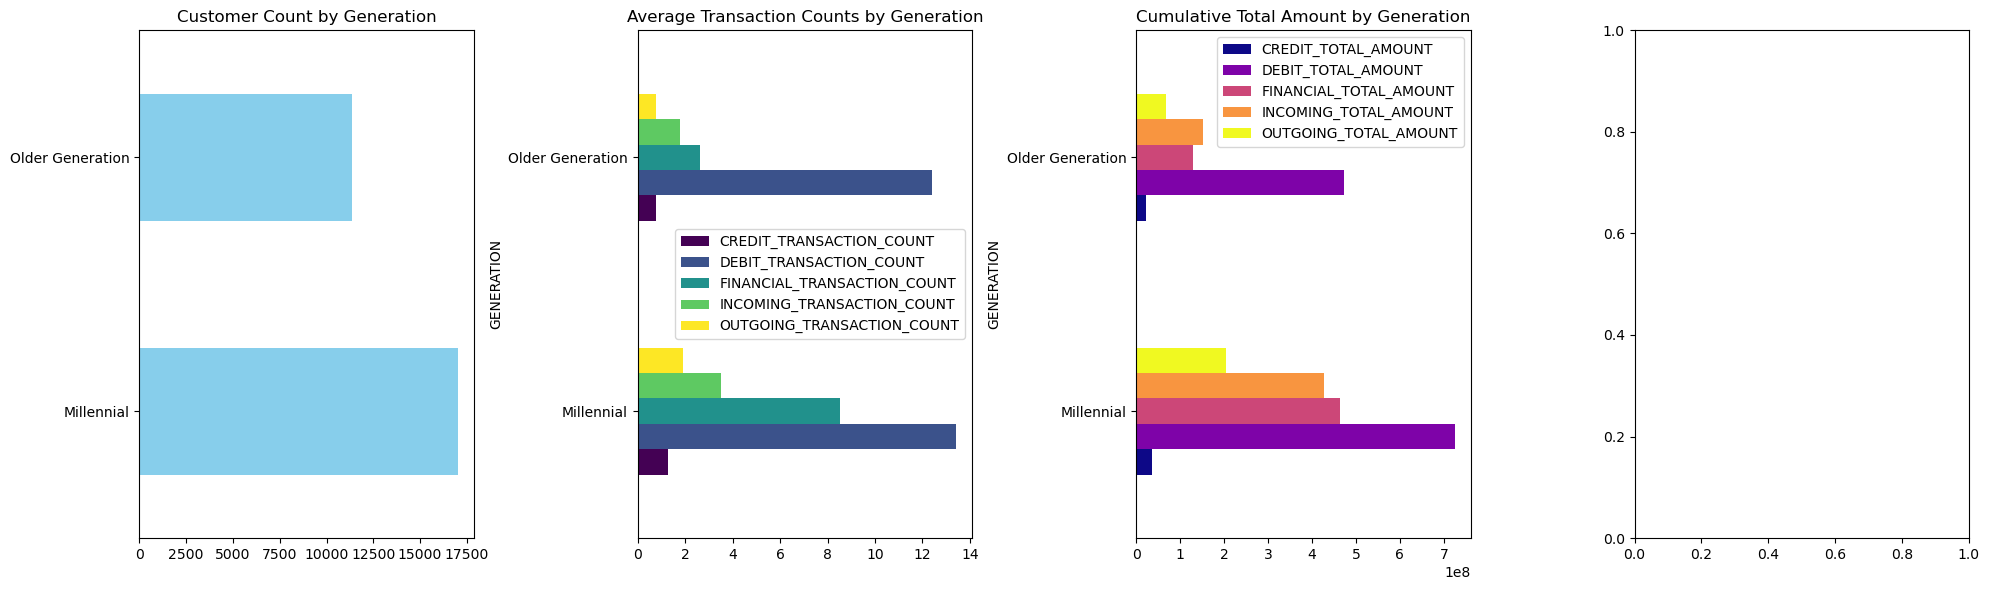

In [77]:
amount_columns = ['CREDIT_AVERAGE_AMOUNT', 'DEBIT_AVERAGE_AMOUNT', 'FINANCIAL_AVERAGE_AMOUNT', 'INCOMING_AVERAGE_AMOUNT', 'OUTGOING_AVERAGE_AMOUNT']
merged_df[amount_columns] = merged_df[amount_columns].fillna(0)
transaction_count_columns = ['CREDIT_TRANSACTION_COUNT', 'DEBIT_TRANSACTION_COUNT', 'FINANCIAL_TRANSACTION_COUNT', 'INCOMING_TRANSACTION_COUNT', 'OUTGOING_TRANSACTION_COUNT']
merged_df[transaction_count_columns] = merged_df[transaction_count_columns].fillna(0)

def weighted_average(df):
    weights = df['DEBIT_TRANSACTION_COUNT'] + df['CREDIT_TRANSACTION_COUNT'] + df['FINANCIAL_TRANSACTION_COUNT'] + df['INCOMING_TRANSACTION_COUNT'] + df['OUTGOING_TRANSACTION_COUNT']
    weighted_avg = np.where(weights == 0, 0,
        (df['CREDIT_AVERAGE_AMOUNT'] * df['CREDIT_TRANSACTION_COUNT'] +
         df['DEBIT_AVERAGE_AMOUNT'] * df['DEBIT_TRANSACTION_COUNT'] +
         df['FINANCIAL_AVERAGE_AMOUNT'] * df['FINANCIAL_TRANSACTION_COUNT'] +
         df['INCOMING_AVERAGE_AMOUNT'] * df['INCOMING_TRANSACTION_COUNT'] +
         df['OUTGOING_AVERAGE_AMOUNT'] * df['OUTGOING_TRANSACTION_COUNT']) / weights)
    return weighted_avg

merged_df['WEIGHTED_AVERAGE_AMOUNT'] = weighted_average(merged_df)

generation_counts = merged_df['GENERATION'].value_counts()

average_transaction_counts = merged_df.groupby('GENERATION')['CREDIT_TRANSACTION_COUNT', 'DEBIT_TRANSACTION_COUNT', 'FINANCIAL_TRANSACTION_COUNT', 'INCOMING_TRANSACTION_COUNT', 'OUTGOING_TRANSACTION_COUNT'].mean()

cumulative_total_amount = merged_df.groupby('GENERATION')['CREDIT_TOTAL_AMOUNT', 'DEBIT_TOTAL_AMOUNT', 'FINANCIAL_TOTAL_AMOUNT', 'INCOMING_TOTAL_AMOUNT', 'OUTGOING_TOTAL_AMOUNT'].sum()

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
plt.subplots_adjust(wspace=0.4)

generation_counts.plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Customer Count by Generation')

average_transaction_counts.plot(kind='barh', ax=axes[1], colormap='viridis')
axes[1].set_title('Average Transaction Counts by Generation')

cumulative_total_amount.plot(kind='barh', ax=axes[2], colormap='plasma')
axes[2].set_title('Cumulative Total Amount by Generation')

plt.tight_layout()
plt.show()

C:\Users\Mykiell\AppData\Local\Temp\ipykernel_1368\1322406892.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  generation_totals = merged_df.groupby('GENERATION')['CREDIT_TOTAL_AMOUNT', 'DEBIT_TOTAL_AMOUNT', 'FINANCIAL_TOTAL_AMOUNT', 'INCOMING_TOTAL_AMOUNT', 'OUTGOING_TOTAL_AMOUNT'].sum().reset_index()


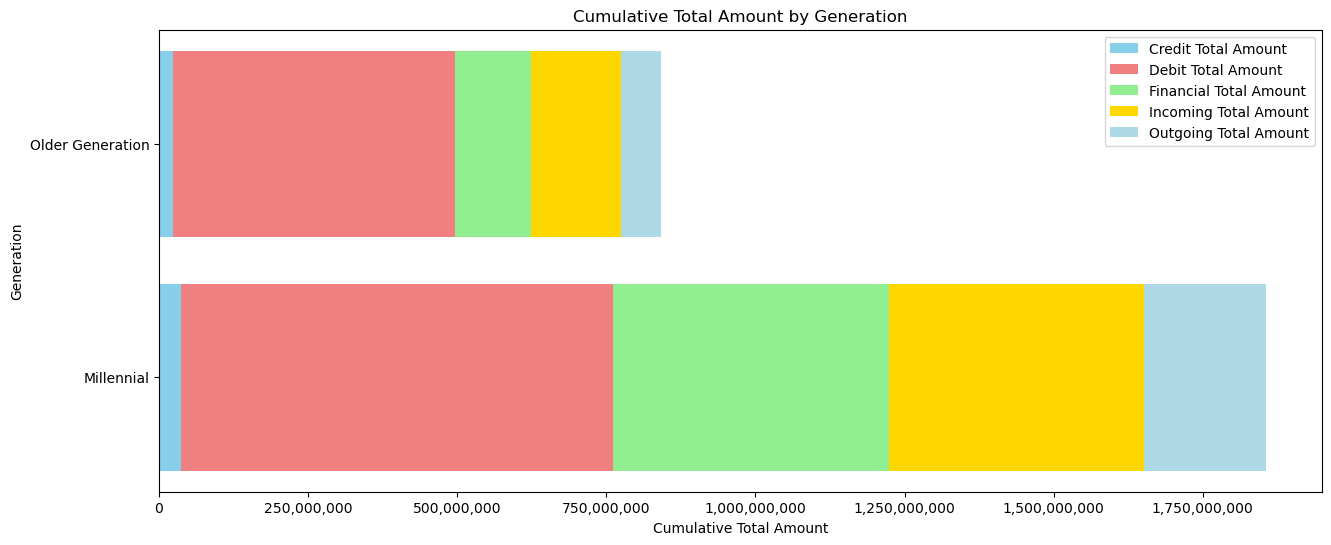

In [78]:
generation_totals = merged_df.groupby('GENERATION')['CREDIT_TOTAL_AMOUNT', 'DEBIT_TOTAL_AMOUNT', 'FINANCIAL_TOTAL_AMOUNT', 'INCOMING_TOTAL_AMOUNT', 'OUTGOING_TOTAL_AMOUNT'].sum().reset_index()

plt.figure(figsize=(15, 6))
plt.barh(generation_totals['GENERATION'], generation_totals['CREDIT_TOTAL_AMOUNT'], color='skyblue')
plt.barh(generation_totals['GENERATION'], generation_totals['DEBIT_TOTAL_AMOUNT'], color='lightcoral', left=generation_totals['CREDIT_TOTAL_AMOUNT'])
plt.barh(generation_totals['GENERATION'], generation_totals['FINANCIAL_TOTAL_AMOUNT'], color='lightgreen', left=generation_totals['CREDIT_TOTAL_AMOUNT'] + generation_totals['DEBIT_TOTAL_AMOUNT'])
plt.barh(generation_totals['GENERATION'], generation_totals['INCOMING_TOTAL_AMOUNT'], color='gold', left=generation_totals['CREDIT_TOTAL_AMOUNT'] + generation_totals['DEBIT_TOTAL_AMOUNT'] + generation_totals['FINANCIAL_TOTAL_AMOUNT'])
plt.barh(generation_totals['GENERATION'], generation_totals['OUTGOING_TOTAL_AMOUNT'], color='lightblue', left=generation_totals['CREDIT_TOTAL_AMOUNT'] + generation_totals['DEBIT_TOTAL_AMOUNT'] + generation_totals['FINANCIAL_TOTAL_AMOUNT'] + generation_totals['INCOMING_TOTAL_AMOUNT'])

ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.xlabel('Cumulative Total Amount')
plt.ylabel('Generation')
plt.title('Cumulative Total Amount by Generation')
plt.legend(['Credit Total Amount', 'Debit Total Amount', 'Financial Total Amount', 'Incoming Total Amount', 'Outgoing Total Amount'])
plt.show()

In [79]:
credit_by_customer_merged_df
debit_df_customer_merged_df
financial_df_customer_merged_df
incoming_df_customer_merged_df
outgoing_df_customer_merged_df

CUST_NUM   TOTAL_AMOUNT  AVERAGE_AMOUNT PREFERRED_CHANNEL  \
0        85.229103   17999.470331    17999.470331            MOBILE   
1       206.450963   40799.088988    20399.544494            MOBILE   
2       242.495361    3649.452688      912.363172            MOBILE   
3       290.351511   85190.443990     3703.932347            MOBILE   
4       362.331340  598769.789415    14256.423558            MOBILE   
...            ...            ...             ...               ...   
6225  14134.713368    2499.219936     1249.609968            MOBILE   
6226  14135.057198    6498.738758     2166.246253            MOBILE   
6227  14136.046972   89752.852403     5609.553275            MOBILE   
6228  14136.758539   16998.048241     5666.016080            MOBILE   
6229  14139.061638   11147.525890     2229.505178            MOBILE   

     PREFERRED_RCV_BANK_NAME  TRANSACTION_COUNT  \
0                    CHEETAH                  1   
1                        DOG                  2   
2                      HUMAN                  4   
3                      HUMAN                 23   
4                      HUMAN                 42   
...                      ...                ...   
6225                     CAT                  2   
6226                   HUMAN                  3   
6227                   HUMAN                 16   
6228                     CAT                  3   
6229                   HUMAN                  5   

                            PROVINCE                         REGION EDUCATION  \
0                     SOUTH COTABATO      REGION XII (SOCCSKSARGEN)   NO_DATA   
1                        NUEVA ECIJA     REGION III (CENTRAL LUZON)       MID   
2                  NEGROS OCCIDENTAL    REGION VI (WESTERN VISAYAS)       LOW   
3                           ZAMBALES     REGION III (CENTRAL LUZON)   NO_DATA   
4                     SOUTH COTABATO      REGION XII (SOCCSKSARGEN)   NO_DATA   
...                              ...                            ...       ...   
6225                           LEYTE  REGION VIII (EASTERN VISAYAS)       MID   
6226                        SORSOGON        REGION V (BICOL REGION)       MID   
6227                        LA UNION       REGION I (ILOCOS REGION)   NO_DATA   
6228                MISAMIS ORIENTAL   REGION X (NORTHERN MINDANAO)       MID   
6229  COTABATO CITY (NOT A PROVINCE)      REGION XII (SOCCSKSARGEN)   NO_DATA   

       AGE     TENURE BUSINESS_OWNER DIGITAL_FLAG INCOME_SOURCE  IDV_OR_ORG  \
0     32.0   1.250000              N  TRADITIONAL    REMITTANCE           1   
1     37.0  12.166667              N      DIGITAL        SALARY           1   
2     23.0   5.000000              N  TRADITIONAL        SALARY           1   
3     30.0   0.416667              N      DIGITAL        SALARY           1   
4     36.0   0.750000              N  TRADITIONAL        SALARY           1   
...    ...        ...            ...          ...           ...         ...   
6225  29.0   8.666667              N  TRADITIONAL        SALARY           1   
6226  37.0  11.000000              N  TRADITIONAL        SALARY           1   
6227  30.0   3.750000              N      DIGITAL        SALARY           1   
6228  37.0   7.083333              N      DIGITAL        SALARY           1   
6229  46.0   1.333333              N      DIGITAL        SALARY           1   

      SEGMENT SUBSEGMENT  GENDER MARITAL_STATUS  
0           3  CORE MASS  FEMALE         SINGLE  
1           3  CORE MASS  FEMALE         SINGLE  
2           3  CORE MASS  FEMALE         SINGLE  
3           3  CORE MASS  FEMALE         SINGLE  
4           3  CORE MASS    MALE        MARRIED  
...       ...        ...     ...            ...  
6225        3  CORE MASS  FEMALE         SINGLE  
6226        3  CORE MASS    MALE         SINGLE  
6227        3  CORE MASS    MALE       DIVORCED  
6228        3  CORE MASS  FEMALE        MARRIED  
6229        3  CORE MASS    MALE         SINGLE  

[6230 rows x 19 colum

In [80]:
credit_by_customer_generation_df = credit_by_customer_merged_df.copy()
credit_by_customer_generation_df['GENERATION'] = credit_by_customer_generation_df['AGE'].apply(categorize_generation)
credit_by_customer_generation_df.drop(columns=['AGE'], inplace=True)

debit_by_customer_generation_df = debit_df_customer_merged_df.copy()
debit_by_customer_generation_df['GENERATION'] = debit_by_customer_generation_df['AGE'].apply(categorize_generation)
debit_by_customer_generation_df.drop(columns=['AGE'], inplace=True)

financial_by_customer_generation_df = financial_df_customer_merged_df.copy()
financial_by_customer_generation_df['GENERATION'] = financial_by_customer_generation_df['AGE'].apply(categorize_generation)
financial_by_customer_generation_df.drop(columns=['AGE'], inplace=True)

incoming_by_customer_generation_df = incoming_df_customer_merged_df.copy()
incoming_by_customer_generation_df['GENERATION'] = incoming_by_customer_generation_df['AGE'].apply(categorize_generation)
incoming_by_customer_generation_df.drop(columns=['AGE'], inplace=True)

outgoing_by_customer_generation_df = outgoing_df_customer_merged_df.copy()
outgoing_by_customer_generation_df['GENERATION'] = outgoing_by_customer_generation_df['AGE'].apply(categorize_generation)
outgoing_by_customer_generation_df.drop(columns=['AGE'], inplace=True)

In [81]:
credit_by_customer_generation_df.head()

CUST_NUM  TOTAL_AMOUNT  AVERAGE_AMOUNT PREFERED_MERCH_NAME  \
0  206.450963  62102.715245    31051.357622       MERCHANT 2601   
1  362.331340  37549.343106     3129.111925         MERCHANT 33   
2  565.598798  20881.381549     4176.276310        MERCHANT 620   
3  658.971927  17923.512310     2560.501759         MERCHANT 22   
4  726.733789  14729.502327     1636.611370          MERCHANT 1   

                                PREFERED_MERCH_GROUP       PREFERRED_CHANNEL  \
0  Professional Services and Membership Organizat...  ONLINE-RETAIL PURCHASE   
1                               Miscellaneous Stores     POS-RETAIL PURCHASE   
2                             Retail Outlet Services     POS-RETAIL PURCHASE   
3                             Retail Outlet Services     POS-RETAIL PURCHASE   
4                             Retail Outlet Services     POS-RETAIL PURCHASE   

   TRANSACTION_COUNT        PROVINCE                                  REGION  \
0                  2     NUEVA ECIJA              REGION III (CENTRAL LUZON)   
1                 12  SOUTH COTABATO               REGION XII (SOCCSKSARGEN)   
2                  5         BENGUET  CORDILLERA ADMINISTRATIVE REGION (CAR)   
3                  7  DAVAO ORIENTAL                REGION XI (DAVAO REGION)   
4                  9         CAGAYAN              REGION II (CAGAYAN VALLEY)   

  EDUCATION     TENURE BUSINESS_OWNER DIGITAL_FLAG INCOME_SOURCE  IDV_OR_ORG  \
0       MID  12.166667              N      DIGITAL        SALARY           1   
1   NO_DATA   0.750000              N  TRADITIONAL        SALARY           1   
2       MID   8.750000              N      DIGITAL        SALARY           1   
3       MID   3.500000              N      DIGITAL        SALARY           1   
4       MID   7.833333              N  TRADITIONAL        SALARY           1   

   SEGMENT SUBSEGMENT  GENDER MARITAL_STATUS        GENERATION  
0        3  CORE MASS  FEMALE         SINGLE        Millennial  
1        3  CORE MASS    MALE        MARRIED        Millennial  
2        3  CORE MASS  FEMALE         SINGLE        Millennial  
3        3  CORE MASS    MALE         SINGLE        Millennial  
4        3  CORE MASS  FEMALE         SINGLE  Older Generation

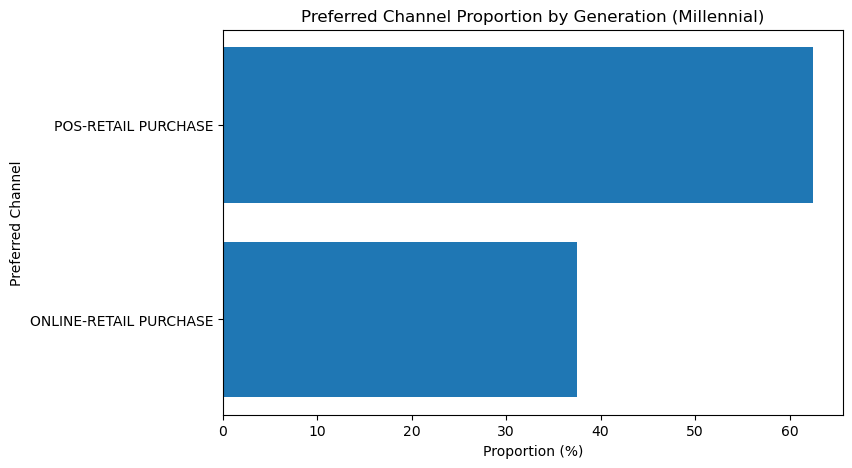

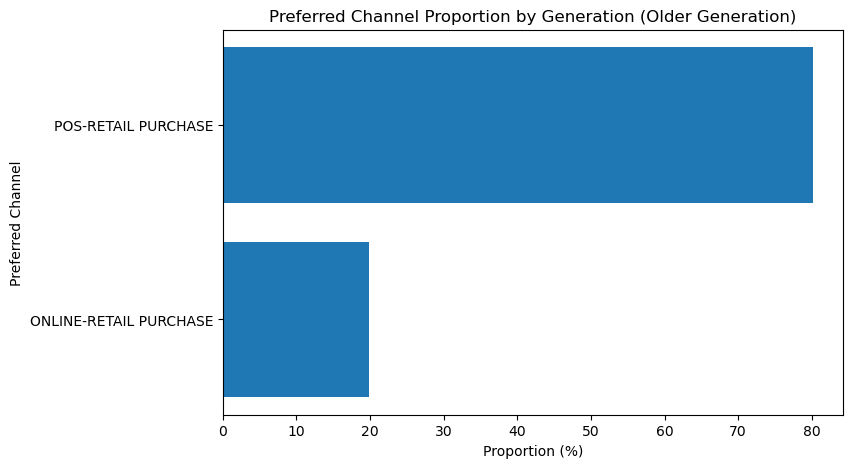

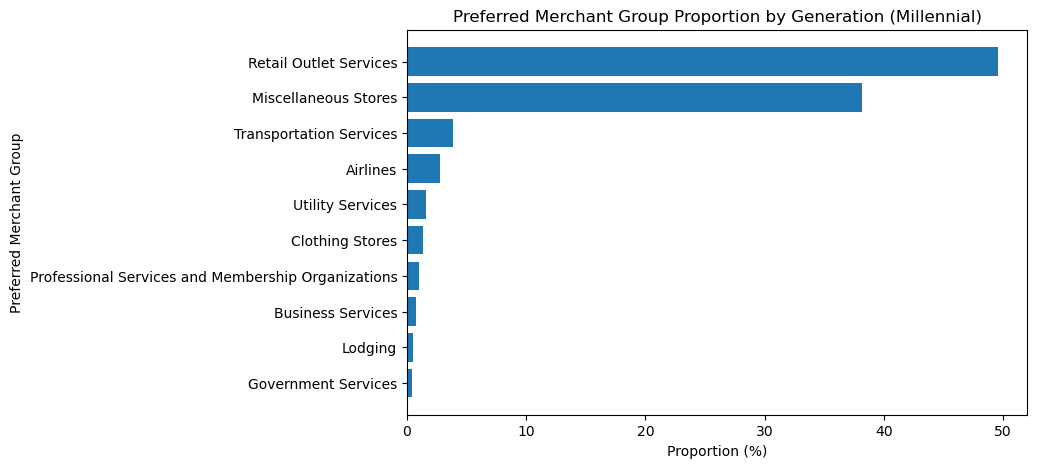

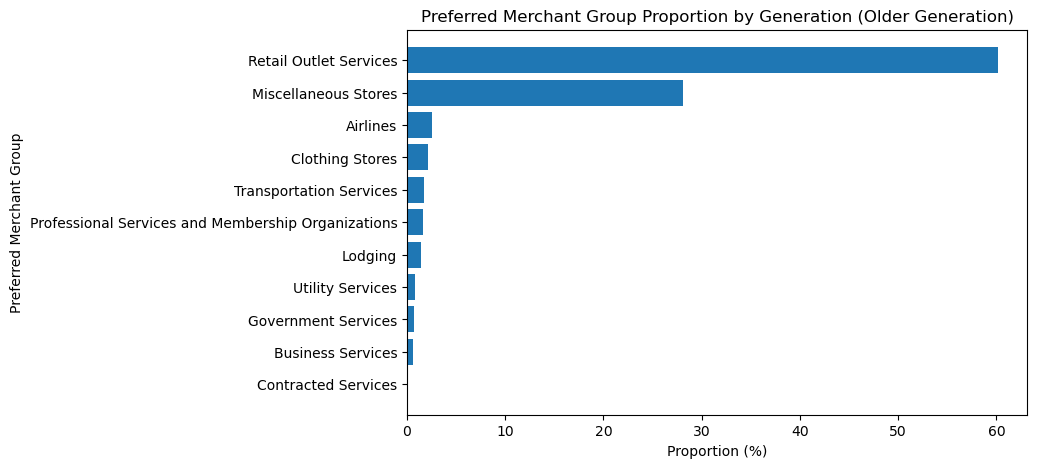

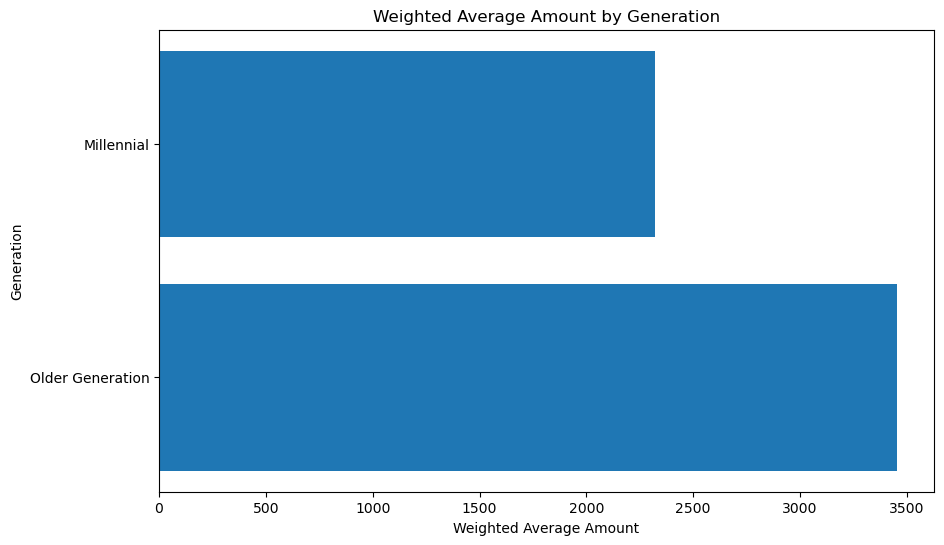

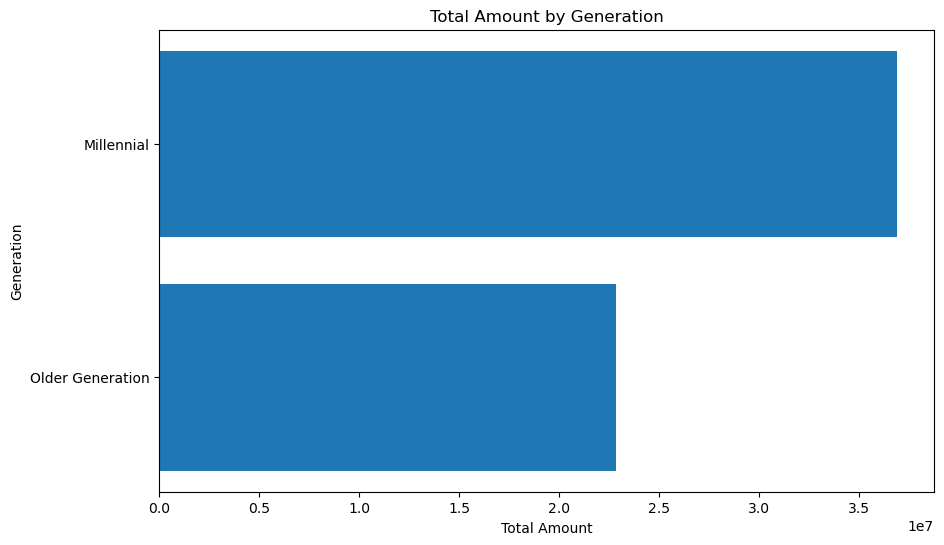

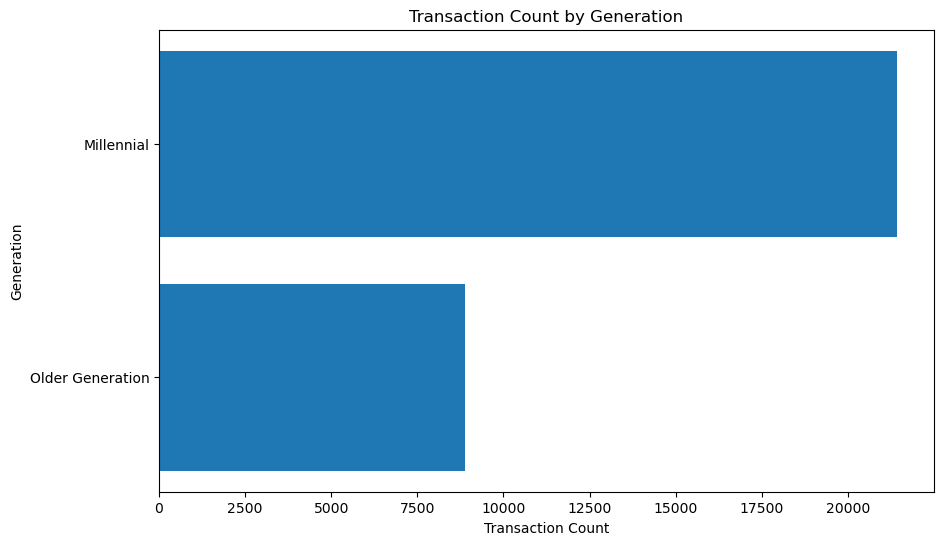

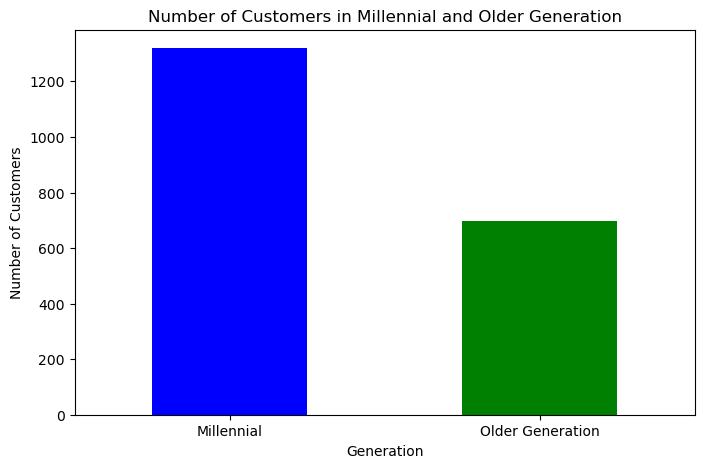

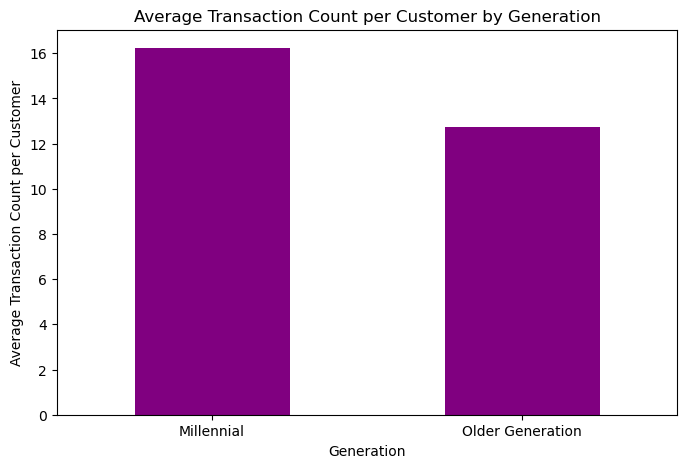

In [82]:
def plot_proportion_bar_chart(data, x_col, y_col, generation, title, xlabel, ylabel):
    plt.figure(figsize=(8, 5))
    generation_data = data[data['GENERATION'] == generation].copy()
    total_count = generation_data[y_col].sum()
    generation_data['PROPORTION'] = (generation_data[y_col] / total_count) * 100
    plt.barh(generation_data[x_col], generation_data['PROPORTION'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title + ' (' + generation + ')')
    plt.gca().invert_yaxis()
    plt.show()

generations = credit_by_customer_generation_df['GENERATION'].unique()
for generation in generations:
    plot_proportion_bar_chart(
        credit_by_customer_generation_df[['GENERATION', 'PREFERRED_CHANNEL']].value_counts().reset_index(name='COUNT'),
        'PREFERRED_CHANNEL', 'COUNT', generation,
        'Preferred Channel Proportion by Generation', 'Proportion (%)', 'Preferred Channel')

for generation in generations:
    plot_proportion_bar_chart(
        credit_by_customer_generation_df[['GENERATION', 'PREFERED_MERCH_GROUP']].value_counts().reset_index(name='COUNT'),
        'PREFERED_MERCH_GROUP', 'COUNT', generation,
        'Preferred Merchant Group Proportion by Generation', 'Proportion (%)', 'Preferred Merchant Group')

def plot_horizontal_bar_chart(data, x_col, y_col, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.barh(data[x_col], data[y_col])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

weighted_avg_amount = credit_by_customer_generation_df.groupby('GENERATION')['AVERAGE_AMOUNT'].mean().reset_index()
plot_horizontal_bar_chart(weighted_avg_amount, 'GENERATION', 'AVERAGE_AMOUNT', 'Weighted Average Amount by Generation', 'Weighted Average Amount', 'Generation')

total_amount = credit_by_customer_generation_df.groupby('GENERATION')['TOTAL_AMOUNT'].sum().reset_index()
plot_horizontal_bar_chart(total_amount, 'GENERATION', 'TOTAL_AMOUNT', 'Total Amount by Generation', 'Total Amount', 'Generation')

transaction_count = credit_by_customer_generation_df.groupby('GENERATION')['TRANSACTION_COUNT'].sum().reset_index()
plot_horizontal_bar_chart(transaction_count, 'GENERATION', 'TRANSACTION_COUNT', 'Transaction Count by Generation', 'Transaction Count', 'Generation')

generation_counts = credit_by_customer_generation_df['GENERATION'].value_counts()

plt.figure(figsize=(8, 5))
generation_counts.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Generation')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Millennial and Older Generation')
plt.xticks(rotation=0)
plt.show()

average_transaction_count = credit_by_customer_generation_df.groupby('GENERATION')['TRANSACTION_COUNT'].mean()

plt.figure(figsize=(8, 5))
average_transaction_count.plot(kind='bar', color='purple')
plt.xlabel('Generation')
plt.ylabel('Average Transaction Count per Customer')
plt.title('Average Transaction Count per Customer by Generation')
plt.xticks(rotation=0)
plt.show()

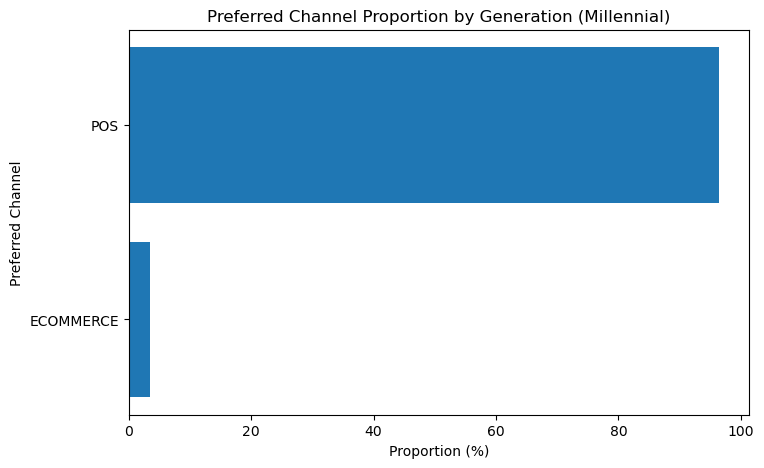

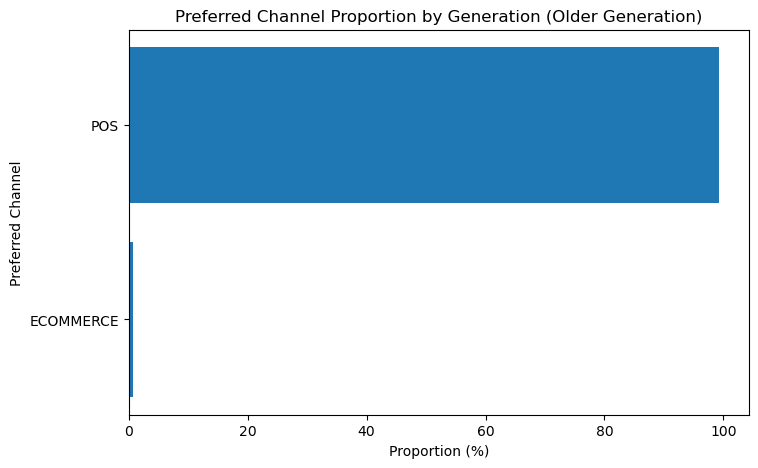

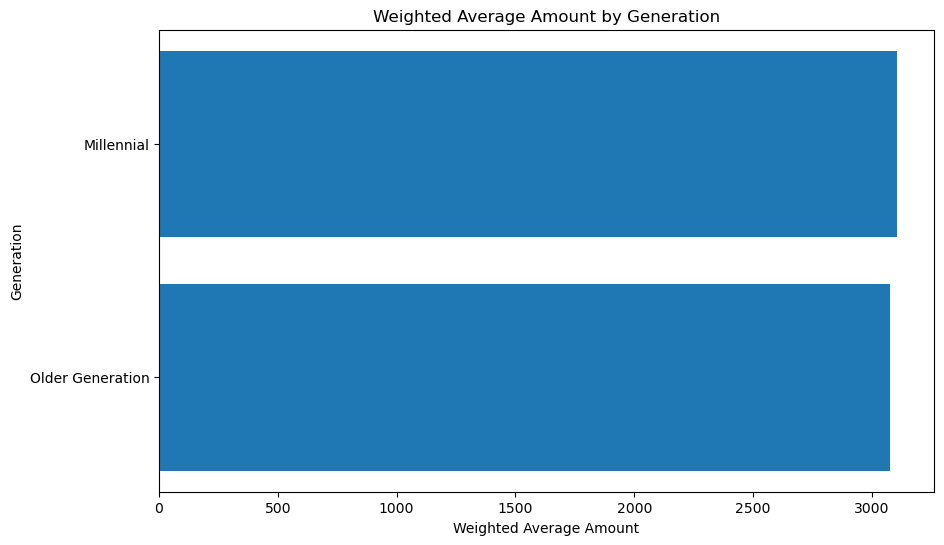

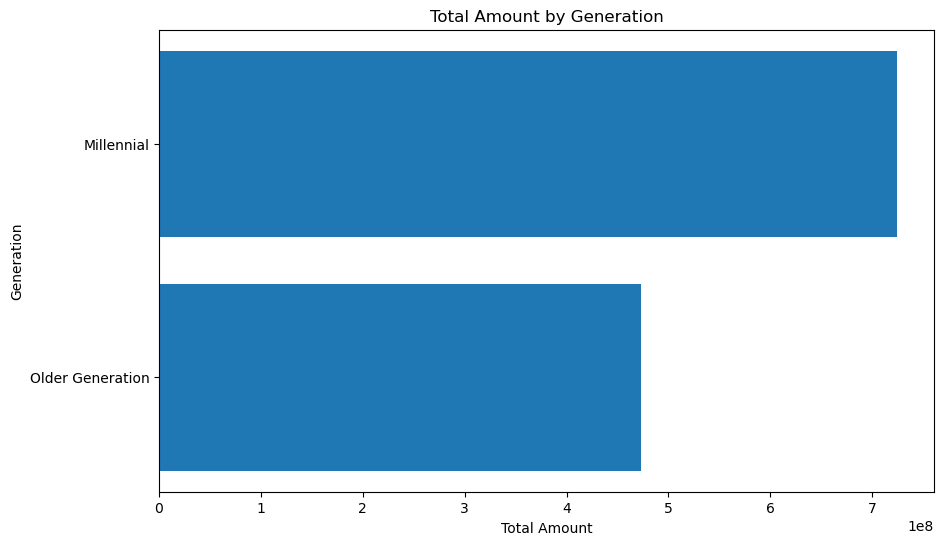

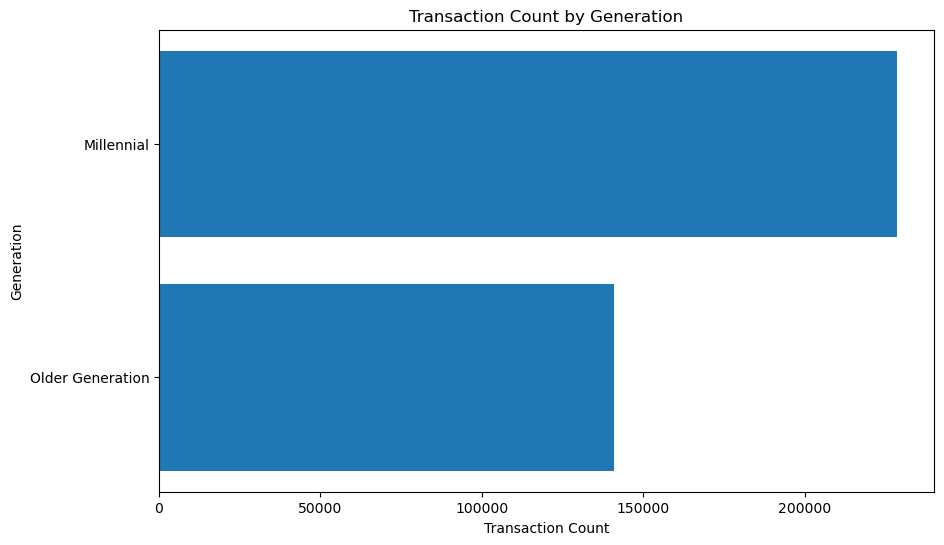

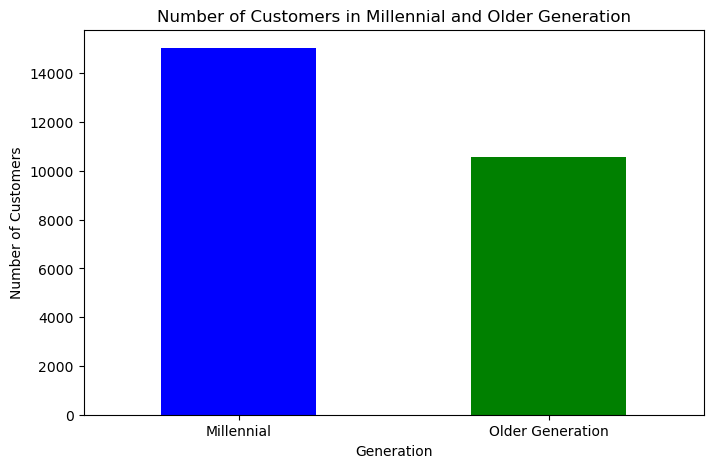

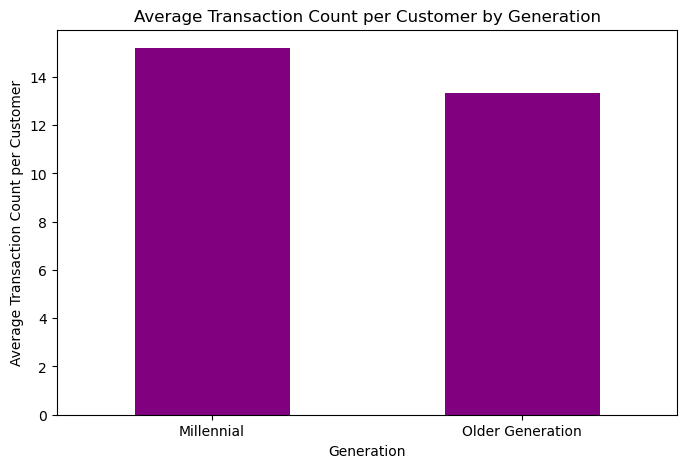

In [83]:
def plot_proportion_bar_chart(data, x_col, y_col, generation, title, xlabel, ylabel):
    plt.figure(figsize=(8, 5))
    generation_data = data[data['GENERATION'] == generation].copy()
    total_count = generation_data[y_col].sum()
    generation_data['PROPORTION'] = (generation_data[y_col] / total_count) * 100
    plt.barh(generation_data[x_col], generation_data['PROPORTION'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title + ' (' + generation + ')')
    plt.gca().invert_yaxis()
    plt.show()

generations = debit_by_customer_generation_df['GENERATION'].unique()
for generation in generations:
    plot_proportion_bar_chart(
        debit_by_customer_generation_df[['GENERATION', 'PREFERRED_CHANNEL']].value_counts().reset_index(name='COUNT'),
        'PREFERRED_CHANNEL', 'COUNT', generation,
        'Preferred Channel Proportion by Generation', 'Proportion (%)', 'Preferred Channel')

def plot_horizontal_bar_chart(data, x_col, y_col, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.barh(data[x_col], data[y_col])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

weighted_avg_amount = debit_by_customer_generation_df.groupby('GENERATION')['AVERAGE_AMOUNT'].mean().reset_index()
plot_horizontal_bar_chart(weighted_avg_amount, 'GENERATION', 'AVERAGE_AMOUNT', 'Weighted Average Amount by Generation', 'Weighted Average Amount', 'Generation')

total_amount = debit_by_customer_generation_df.groupby('GENERATION')['TOTAL_AMOUNT'].sum().reset_index()
plot_horizontal_bar_chart(total_amount, 'GENERATION', 'TOTAL_AMOUNT', 'Total Amount by Generation', 'Total Amount', 'Generation')

transaction_count = debit_by_customer_generation_df.groupby('GENERATION')['TRANSACTION_COUNT'].sum().reset_index()
plot_horizontal_bar_chart(transaction_count, 'GENERATION', 'TRANSACTION_COUNT', 'Transaction Count by Generation', 'Transaction Count', 'Generation')

generation_counts = debit_by_customer_generation_df['GENERATION'].value_counts()

plt.figure(figsize=(8, 5))
generation_counts.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Generation')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Millennial and Older Generation')
plt.xticks(rotation=0)
plt.show()

average_transaction_count = debit_by_customer_generation_df.groupby('GENERATION')['TRANSACTION_COUNT'].mean()

plt.figure(figsize=(8, 5))
average_transaction_count.plot(kind='bar', color='purple')
plt.xlabel('Generation')
plt.ylabel('Average Transaction Count per Customer')
plt.title('Average Transaction Count per Customer by Generation')
plt.xticks(rotation=0)
plt.show()

In [84]:
transaction_count_columns = ['CREDIT_TRANSACTION_COUNT', 'DEBIT_TRANSACTION_COUNT',
                              'FINANCIAL_TRANSACTION_COUNT', 'INCOMING_TRANSACTION_COUNT', 'OUTGOING_TRANSACTION_COUNT']
merged_df[transaction_count_columns] = merged_df[transaction_count_columns].fillna(0)

total_transaction_count = merged_df.groupby('CUST_NUM')[transaction_count_columns].sum().reset_index()

customer_digital_flag_df = merged_df[['CUST_NUM', 'DIGITAL_FLAG']].copy()

customer_digital_flag_df = customer_digital_flag_df[customer_digital_flag_df['DIGITAL_FLAG'] != 'NO_DATA']

customer_digital_flag_df = pd.merge(customer_digital_flag_df, total_transaction_count, on='CUST_NUM', how='left')

customer_digital_flag_df['TOTAL_TRANSACTION_COUNT'] = customer_digital_flag_df[transaction_count_columns].sum(axis=1)

customer_digital_flag_transactions_df = customer_digital_flag_df[['CUST_NUM', 'DIGITAL_FLAG'] + transaction_count_columns + ['TOTAL_TRANSACTION_COUNT']]

customer_digital_flag_transactions_df


C:\Users\Mykiell\AppData\Local\Temp\ipykernel_1368\1880019727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[transaction_count_columns] = merged_df[transaction_count_columns].fillna(0)


CUST_NUM DIGITAL_FLAG  CREDIT_TRANSACTION_COUNT  \
0      11712.654012      DIGITAL                       0.0   
1        921.989154  TRADITIONAL                       0.0   
2       1119.634762  TRADITIONAL                       0.0   
3       1709.755538      DIGITAL                       0.0   
4       1964.683690  TRADITIONAL                       0.0   
...             ...          ...                       ...   
26416  13908.768601  TRADITIONAL                       0.0   
26417  14060.827927  TRADITIONAL                       0.0   
26418  11266.634103      DIGITAL                       0.0   
26419   8992.043372  TRADITIONAL                       0.0   
26420  11776.173572      DIGITAL                       0.0   

       DEBIT_TRANSACTION_COUNT  FINANCIAL_TRANSACTION_COUNT  \
0                         41.0                         13.0   
1                          9.0                          8.0   
2                          2.0                          0.0   
3                          7.0                          3.0   
4                          8.0                          0.0   
...                        ...                          ...   
26416                     14.0                          0.0   
26417                      0.0                          0.0   
26418                      0.0                          1.0   
26419                     34.0                          0.0   
26420                     30.0                         29.0   

       INCOMING_TRANSACTION_COUNT  OUTGOING_TRANSACTION_COUNT  \
0                             5.0                        17.0   
1                             4.0                         0.0   
2                             0.0                         0.0   
3                             4.0                         0.0   
4                             6.0                         0.0   
...                           ...                         ...   
26416                         3.0                         0.0   
26417                         2.0                         0.0   
26418                         0.0                        21.0   
26419                         0.0                         0.0   
26420                        13.0                         0.0   

       TOTAL_TRANSACTION_COUNT  
0                         76.0  
1                         21.0  
2                          2.0  
3                         14.0  
4                         14.0  
...                        ...  
26416                     17.0  
26417                      2.0  
26418                     22.0  
26419                     34.0  
26420                     72.0  

[26421 rows x 8 columns]

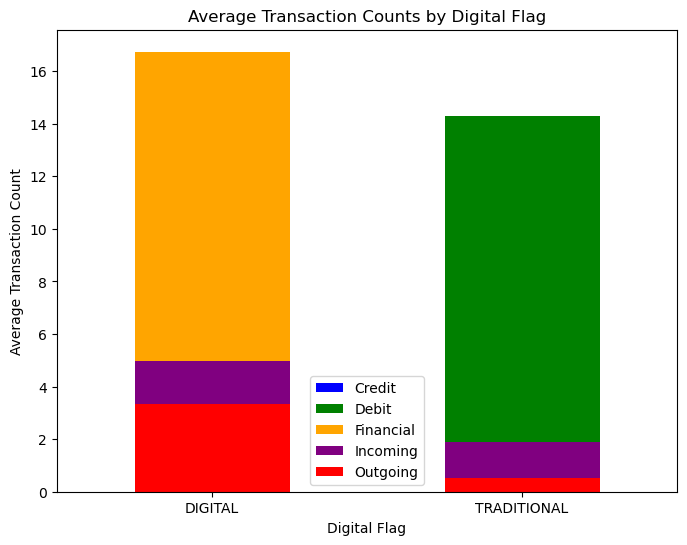

In [86]:
average_transaction_count = customer_digital_flag_transactions_df.groupby('DIGITAL_FLAG').mean()

plt.figure(figsize=(8, 6))
average_transaction_count['CREDIT_TRANSACTION_COUNT'].plot(kind='bar', color='blue', label='Credit')
average_transaction_count['DEBIT_TRANSACTION_COUNT'].plot(kind='bar', color='green', label='Debit')
average_transaction_count['FINANCIAL_TRANSACTION_COUNT'].plot(kind='bar', color='orange', label='Financial')
average_transaction_count['INCOMING_TRANSACTION_COUNT'].plot(kind='bar', color='purple', label='Incoming')
average_transaction_count['OUTGOING_TRANSACTION_COUNT'].plot(kind='bar', color='red', label='Outgoing')

plt.title('Average Transaction Counts by Digital Flag')
plt.xlabel('Digital Flag')
plt.ylabel('Average Transaction Count')
plt.legend()
plt.xticks(rotation=0)
plt.show()

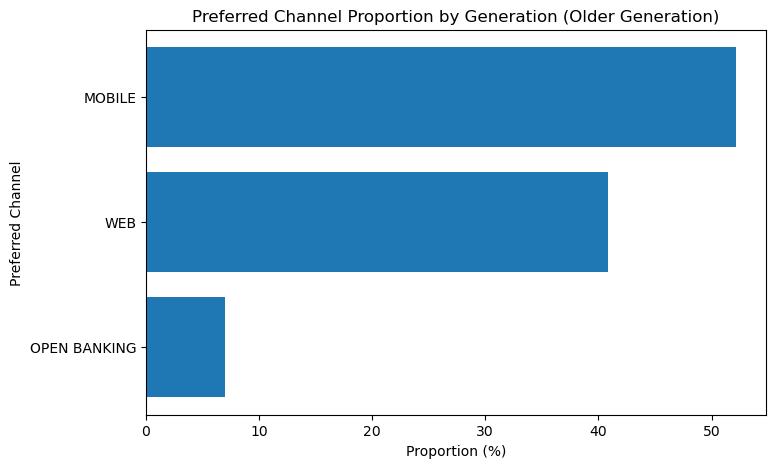

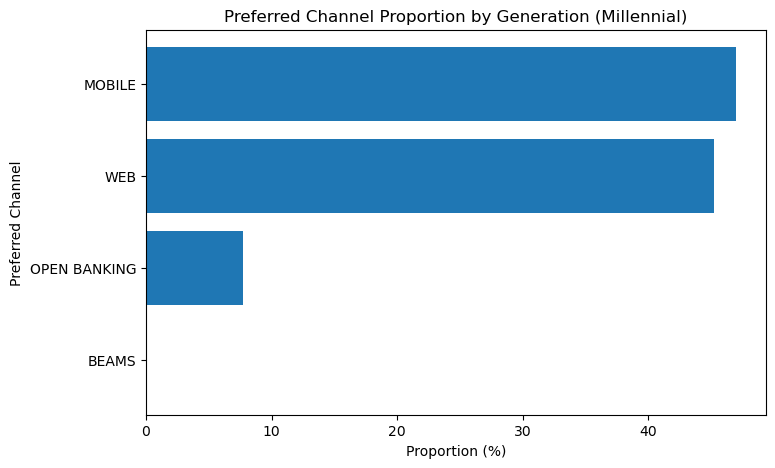

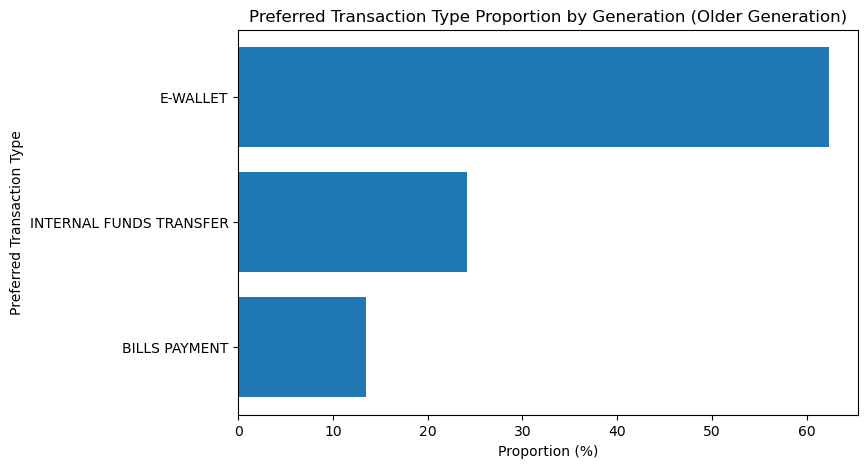

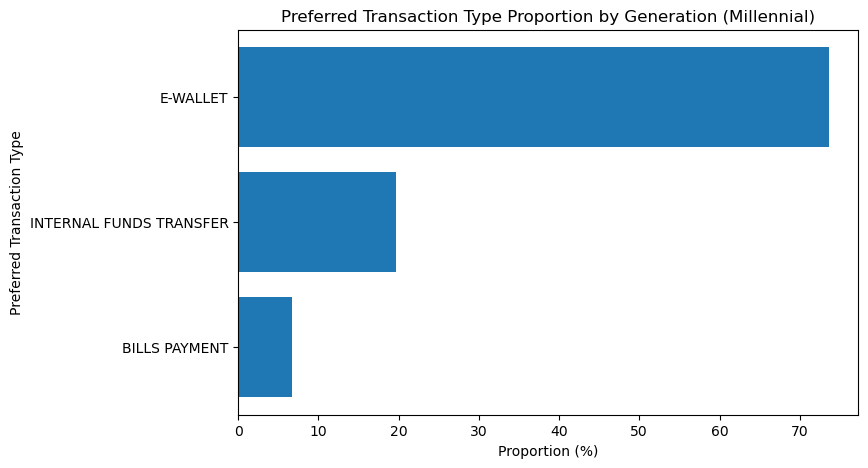

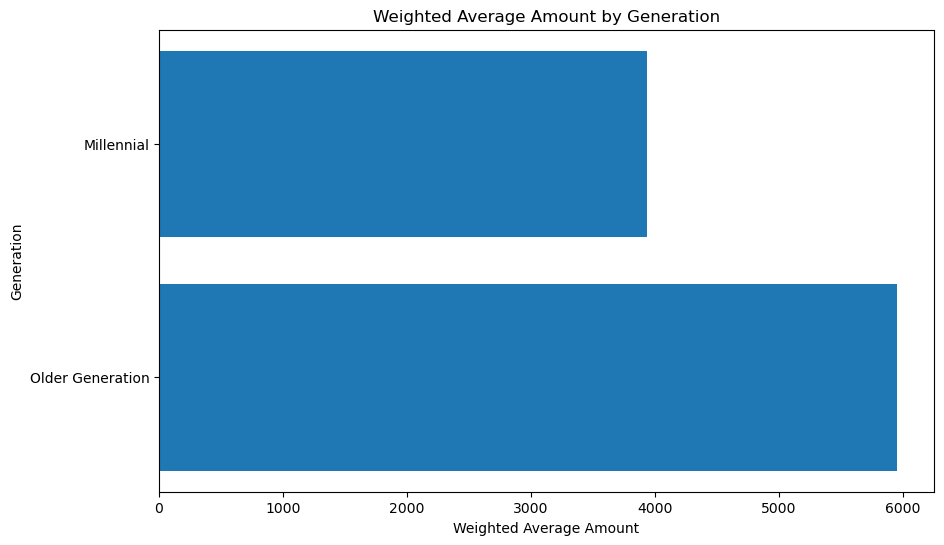

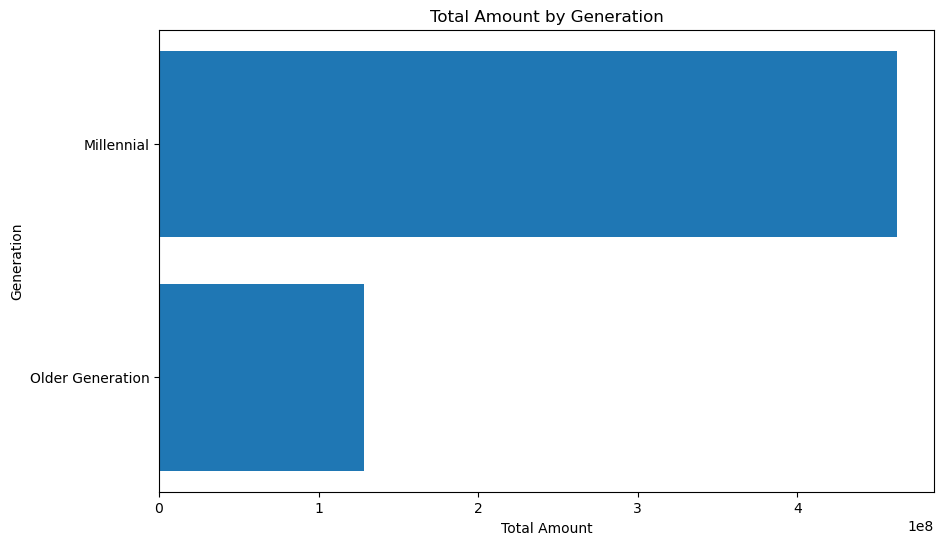

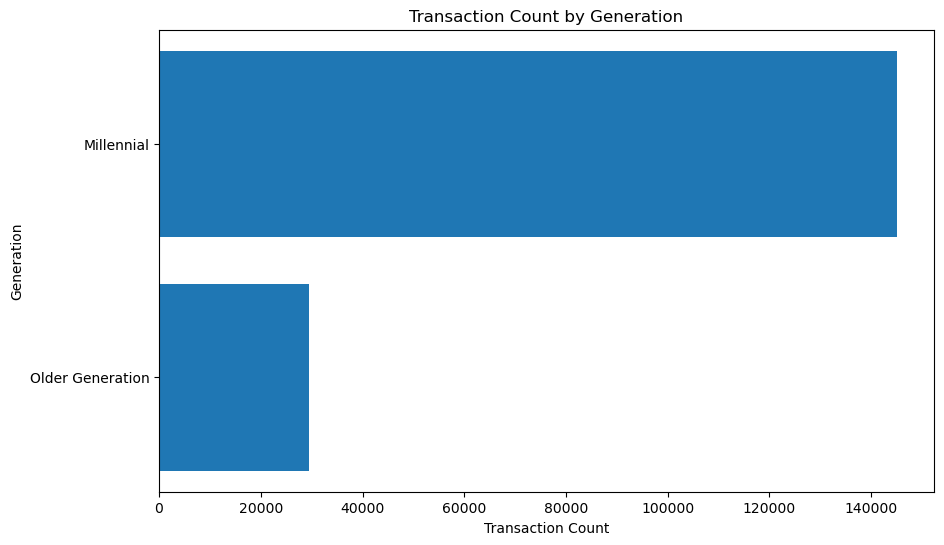

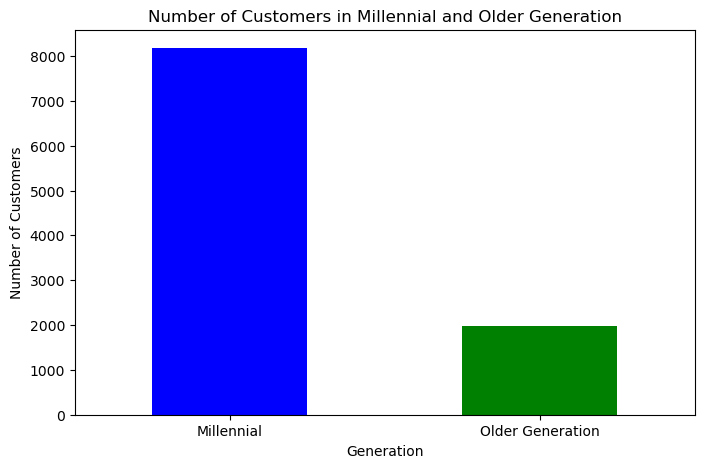

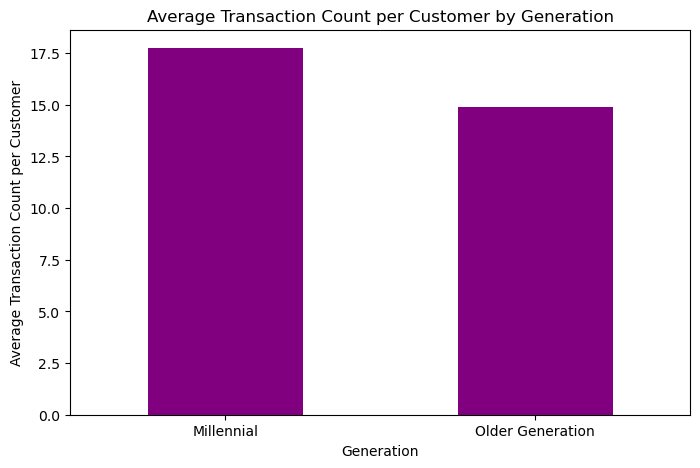

In [87]:
def plot_proportion_bar_chart(data, x_col, y_col, generation, title, xlabel, ylabel):
    plt.figure(figsize=(8, 5))
    generation_data = data[data['GENERATION'] == generation].copy()
    total_count = generation_data[y_col].sum()
    generation_data['PROPORTION'] = (generation_data[y_col] / total_count) * 100
    plt.barh(generation_data[x_col], generation_data['PROPORTION'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title + ' (' + generation + ')')
    plt.gca().invert_yaxis()
    plt.show()

generations = financial_by_customer_generation_df['GENERATION'].unique()
for generation in generations:
    plot_proportion_bar_chart(
        financial_by_customer_generation_df[['GENERATION', 'PREFERRED_CHANNEL']].value_counts().reset_index(name='COUNT'),
        'PREFERRED_CHANNEL', 'COUNT', generation,
        'Preferred Channel Proportion by Generation', 'Proportion (%)', 'Preferred Channel')

for generation in generations:
    plot_proportion_bar_chart(
        financial_by_customer_generation_df[['GENERATION', 'PREFERRED_TRAN_TYPE']].value_counts().reset_index(name='COUNT'),
        'PREFERRED_TRAN_TYPE', 'COUNT', generation,
        'Preferred Transaction Type Proportion by Generation', 'Proportion (%)', 'Preferred Transaction Type')

def plot_horizontal_bar_chart(data, x_col, y_col, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.barh(data[x_col], data[y_col])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

weighted_avg_amount = financial_by_customer_generation_df.groupby('GENERATION')['AVERAGE_AMOUNT'].mean().reset_index()
plot_horizontal_bar_chart(weighted_avg_amount, 'GENERATION', 'AVERAGE_AMOUNT', 'Weighted Average Amount by Generation', 'Weighted Average Amount', 'Generation')

total_amount = financial_by_customer_generation_df.groupby('GENERATION')['TOTAL_AMOUNT'].sum().reset_index()
plot_horizontal_bar_chart(total_amount, 'GENERATION', 'TOTAL_AMOUNT', 'Total Amount by Generation', 'Total Amount', 'Generation')

transaction_count = financial_by_customer_generation_df.groupby('GENERATION')['TRANSACTION_COUNT'].sum().reset_index()
plot_horizontal_bar_chart(transaction_count, 'GENERATION', 'TRANSACTION_COUNT', 'Transaction Count by Generation', 'Transaction Count', 'Generation')

generation_counts = financial_by_customer_generation_df['GENERATION'].value_counts()

plt.figure(figsize=(8, 5))
generation_counts.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Generation')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Millennial and Older Generation')
plt.xticks(rotation=0)
plt.show()

average_transaction_count = financial_by_customer_generation_df.groupby('GENERATION')['TRANSACTION_COUNT'].mean()

plt.figure(figsize=(8, 5))
average_transaction_count.plot(kind='bar', color='purple')
plt.xlabel('Generation')
plt.ylabel('Average Transaction Count per Customer')
plt.title('Average Transaction Count per Customer by Generation')
plt.xticks(rotation=0)
plt.show()

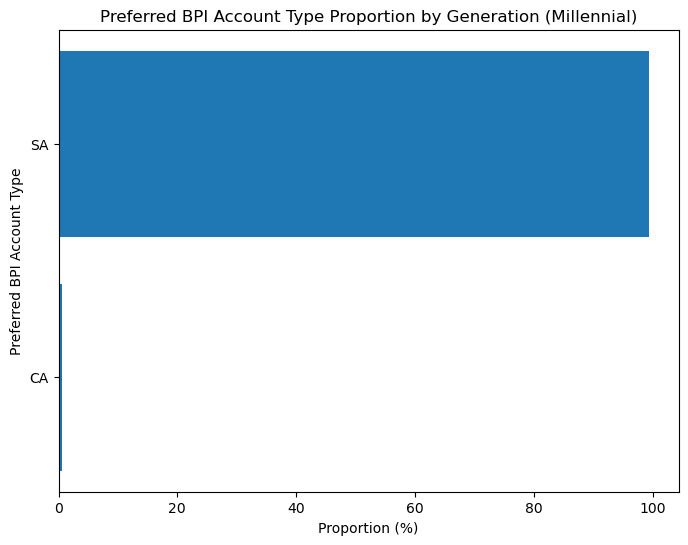

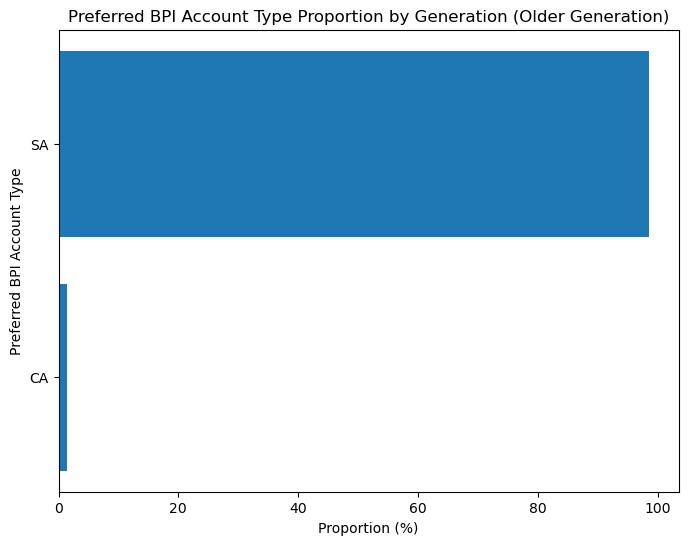

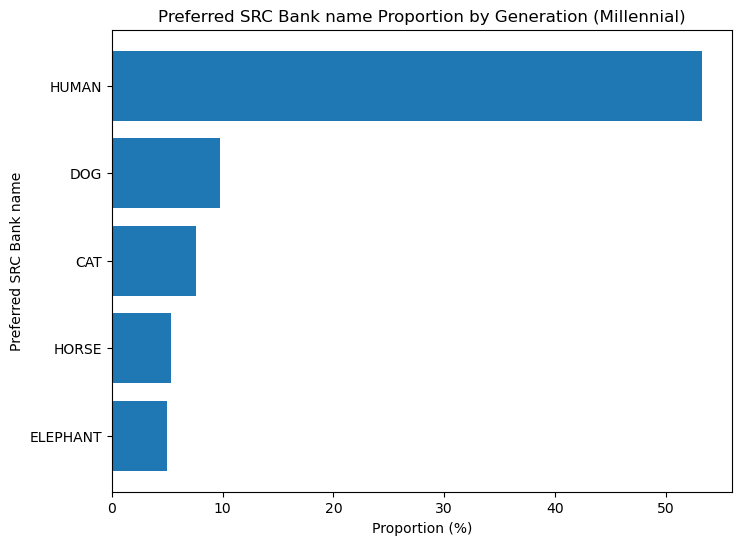

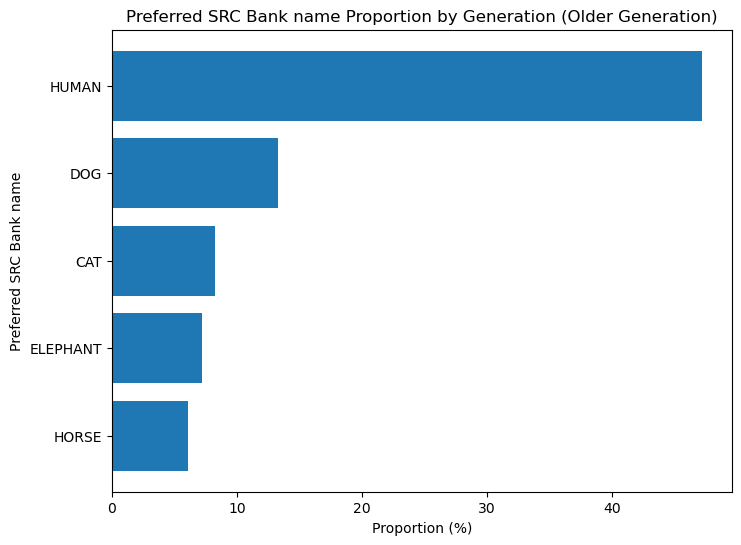

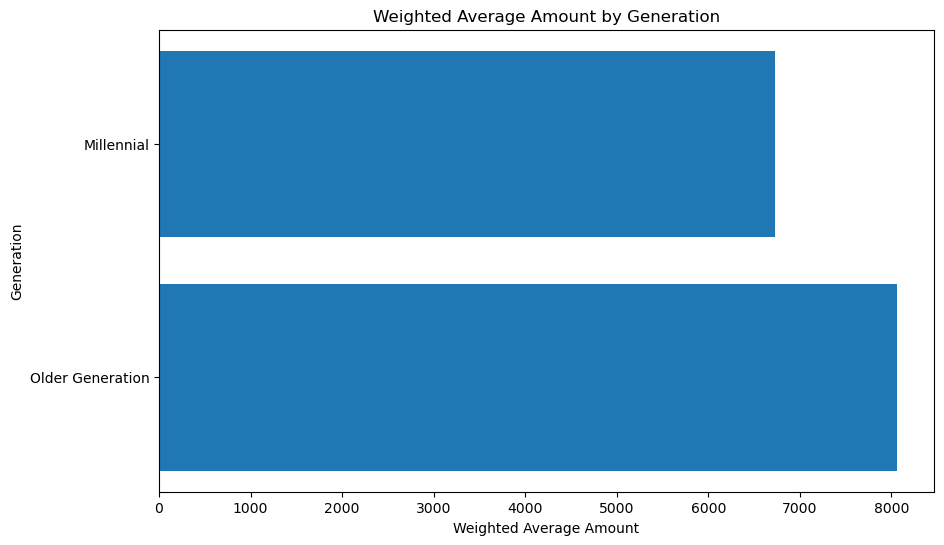

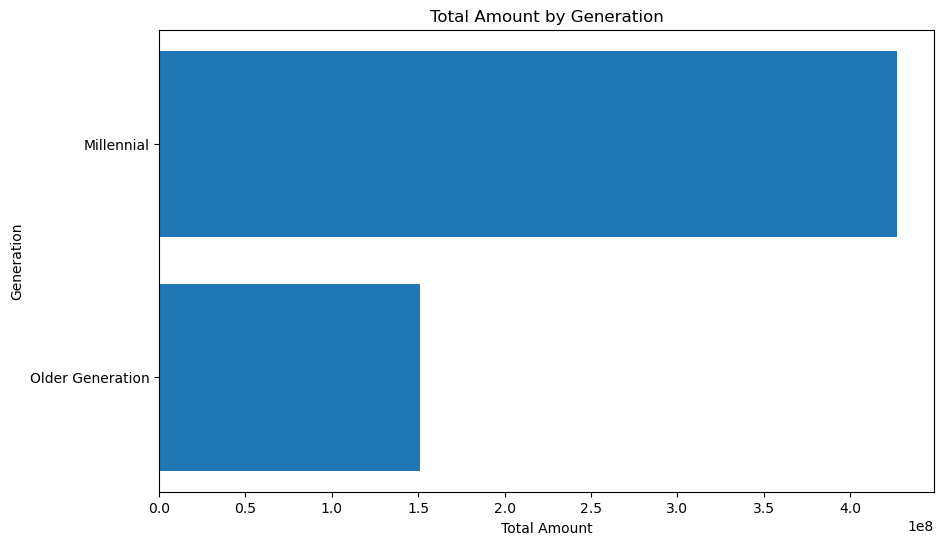

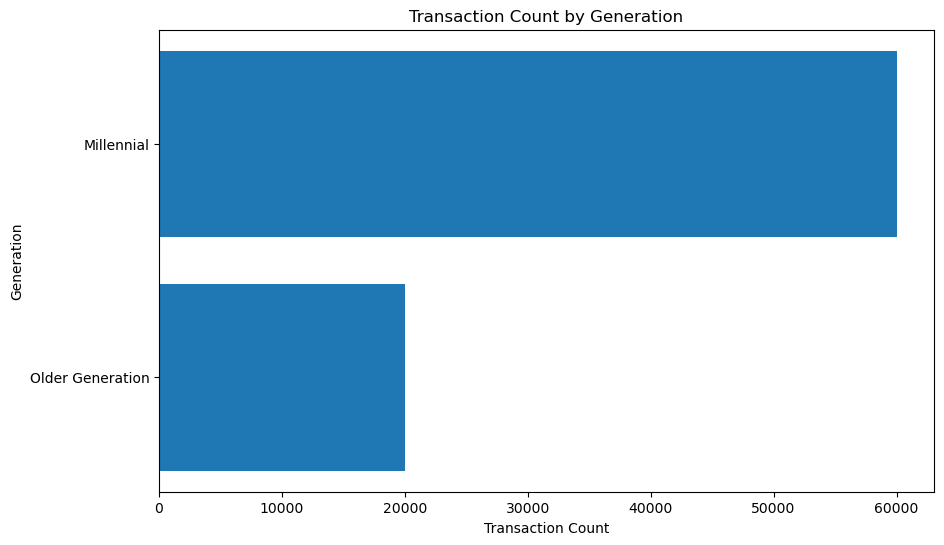

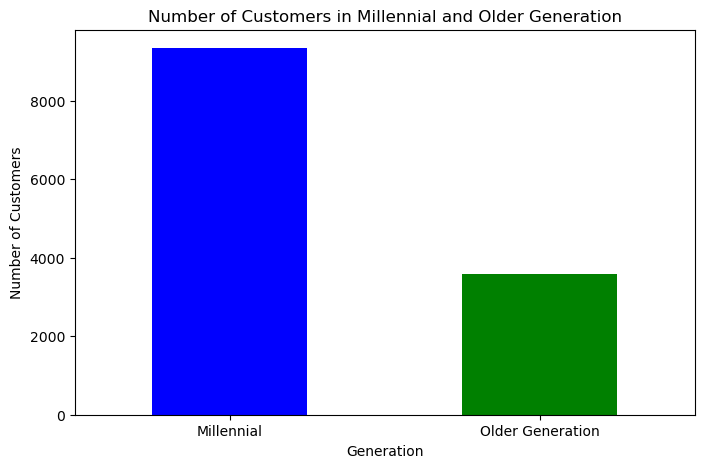

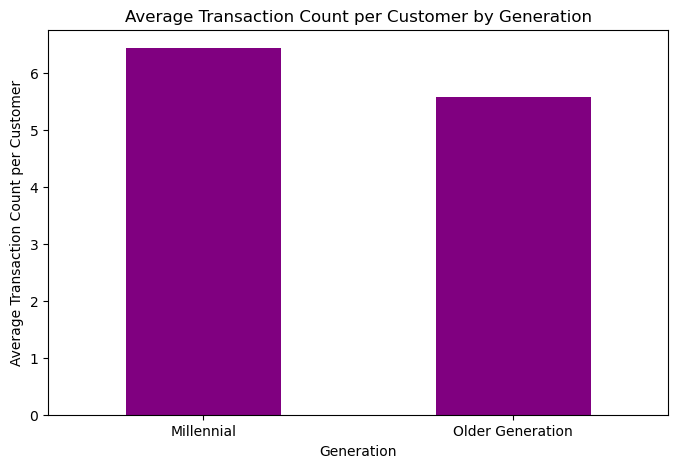

In [88]:
def plot_proportion_bar_chart(data, x_col, y_col, generation, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    generation_data = data[data['GENERATION'] == generation].copy()
    total_count = generation_data[y_col].sum()
    generation_data['PROPORTION'] = (generation_data[y_col] / total_count) * 100
    generation_data = generation_data.sort_values(by='COUNT', ascending=False).head(5)
    plt.barh(generation_data[x_col], generation_data['PROPORTION'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title + ' (' + generation + ')')
    plt.gca().invert_yaxis()
    plt.show()

generations = incoming_by_customer_generation_df['GENERATION'].unique()

for generation in generations:
    plot_proportion_bar_chart(
        incoming_by_customer_generation_df[['GENERATION', 'PREFERRED_BPI_ACCT_TYPE']].value_counts().reset_index(name='COUNT'),
        'PREFERRED_BPI_ACCT_TYPE', 'COUNT', generation,
        'Preferred BPI Account Type Proportion by Generation', 'Proportion (%)', 'Preferred BPI Account Type')

for generation in generations:
    plot_proportion_bar_chart(
        incoming_by_customer_generation_df[['GENERATION', 'PREFERRED_SRC_BANK_NAME']].value_counts().reset_index(name='COUNT'),
        'PREFERRED_SRC_BANK_NAME', 'COUNT', generation,
        'Preferred SRC Bank name Proportion by Generation', 'Proportion (%)', 'Preferred SRC Bank name')

def plot_horizontal_bar_chart(data, x_col, y_col, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.barh(data[x_col], data[y_col])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

weighted_avg_amount = incoming_by_customer_generation_df.groupby('GENERATION')['AVERAGE_AMOUNT'].mean().reset_index()
plot_horizontal_bar_chart(weighted_avg_amount, 'GENERATION', 'AVERAGE_AMOUNT', 'Weighted Average Amount by Generation', 'Weighted Average Amount', 'Generation')

total_amount = incoming_by_customer_generation_df.groupby('GENERATION')['TOTAL_AMOUNT'].sum().reset_index()
plot_horizontal_bar_chart(total_amount, 'GENERATION', 'TOTAL_AMOUNT', 'Total Amount by Generation', 'Total Amount', 'Generation')

transaction_count = incoming_by_customer_generation_df.groupby('GENERATION')['TRANSACTION_COUNT'].sum().reset_index()
plot_horizontal_bar_chart(transaction_count, 'GENERATION', 'TRANSACTION_COUNT', 'Transaction Count by Generation', 'Transaction Count', 'Generation')

generation_counts = incoming_by_customer_generation_df['GENERATION'].value_counts()

plt.figure(figsize=(8, 5))
generation_counts.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Generation')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Millennial and Older Generation')
plt.xticks(rotation=0)
plt.show()

average_transaction_count = incoming_by_customer_generation_df.groupby('GENERATION')['TRANSACTION_COUNT'].mean()

plt.figure(figsize=(8, 5))
average_transaction_count.plot(kind='bar', color='purple')
plt.xlabel('Generation')
plt.ylabel('Average Transaction Count per Customer')
plt.title('Average Transaction Count per Customer by Generation')
plt.xticks(rotation=0)
plt.show()

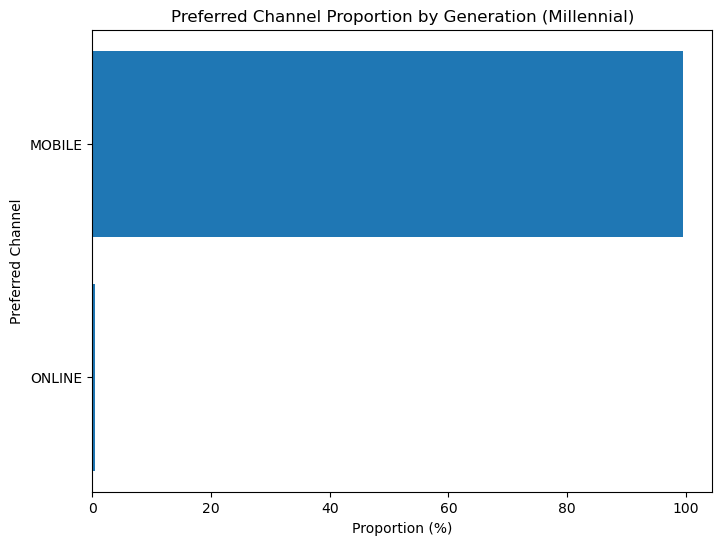

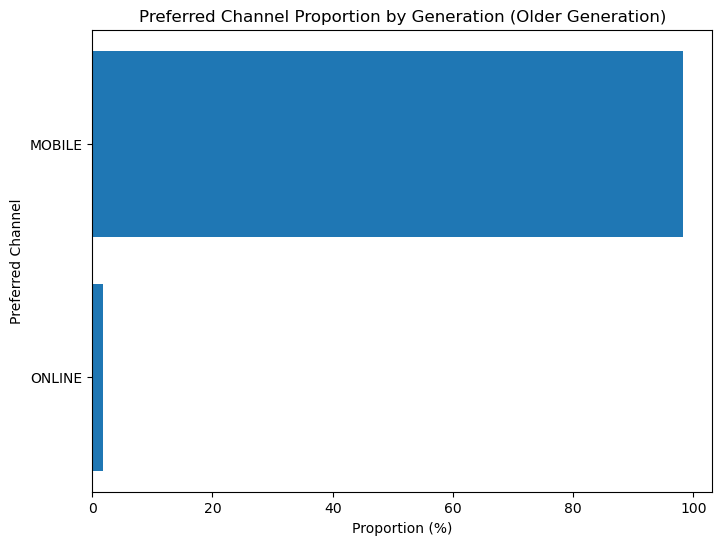

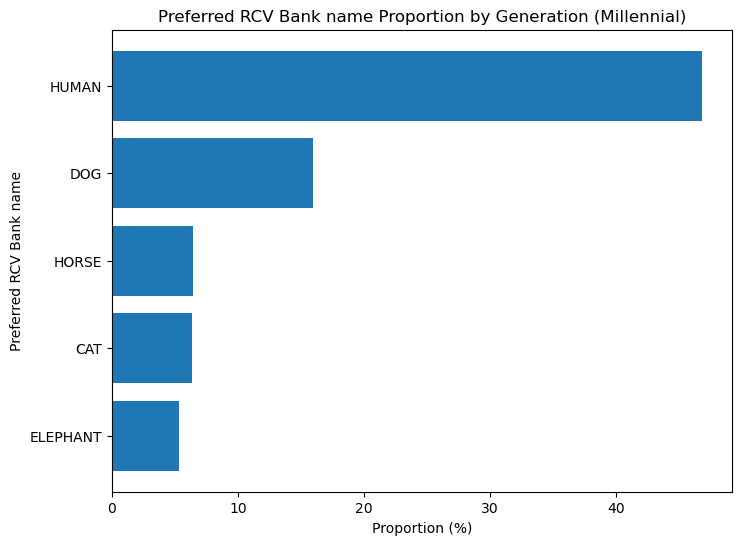

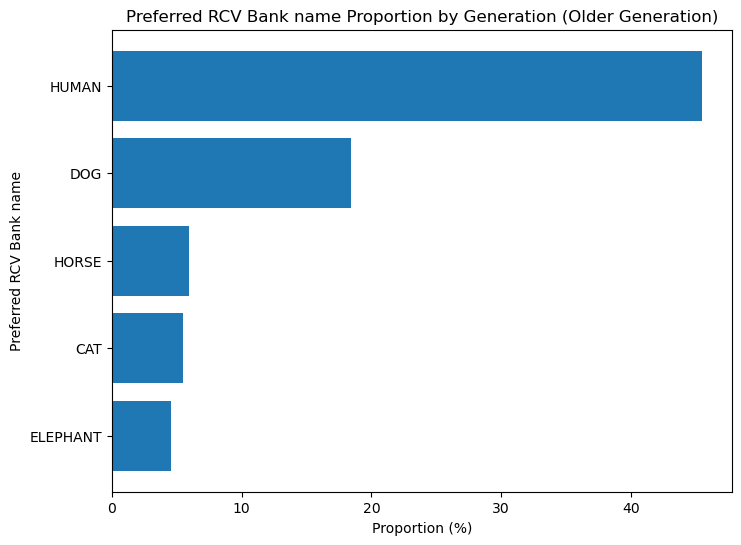

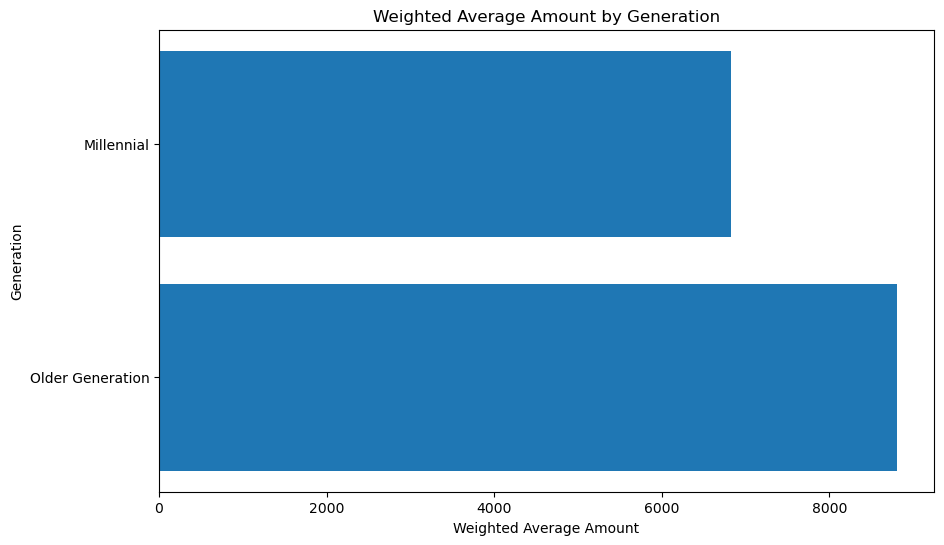

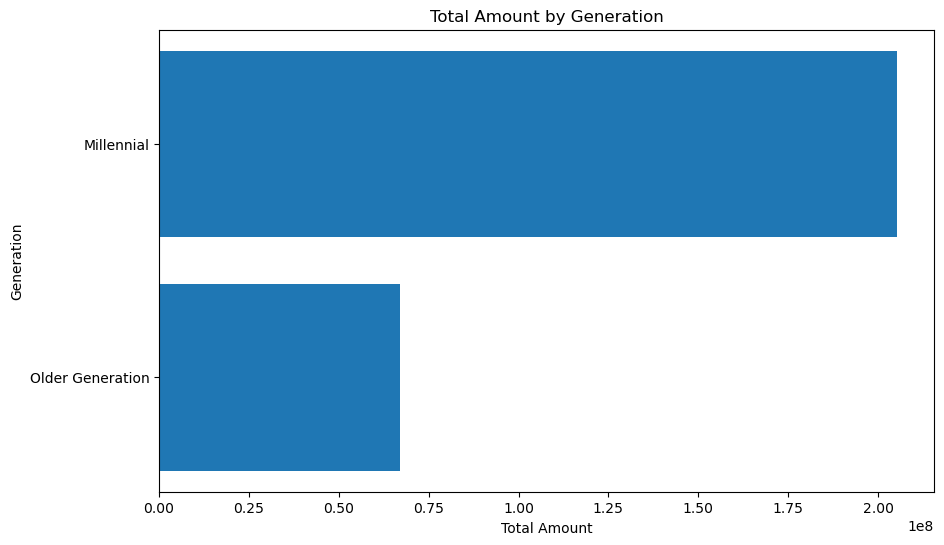

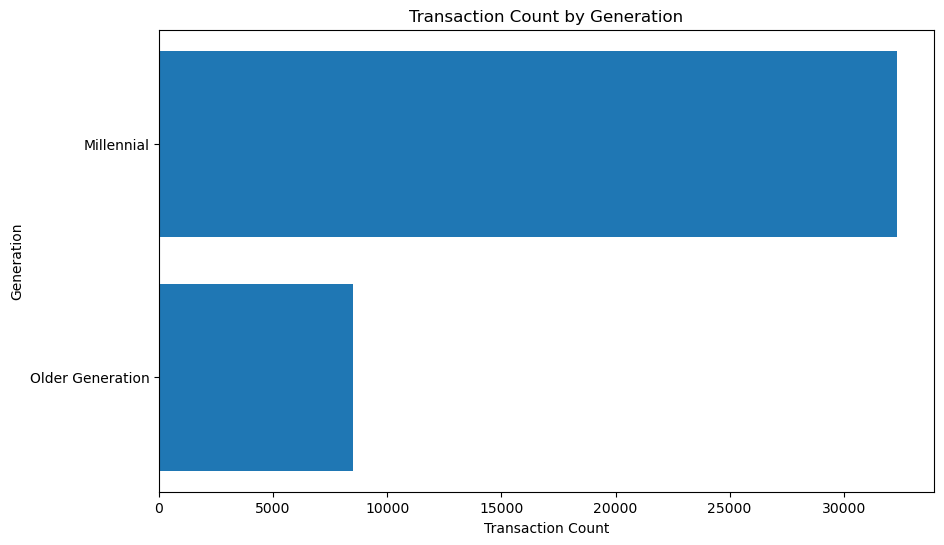

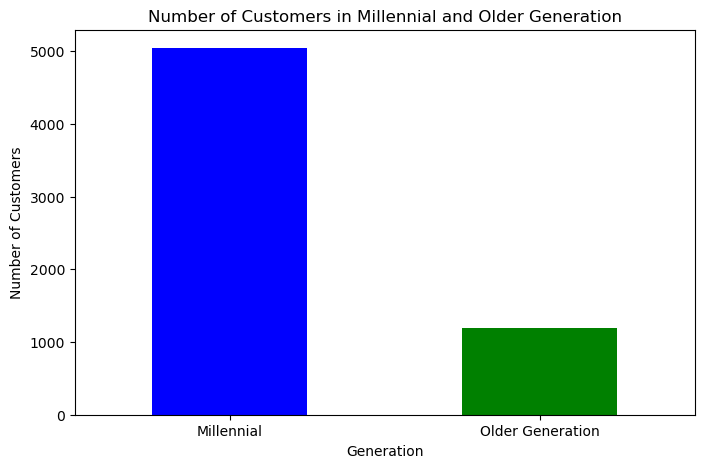

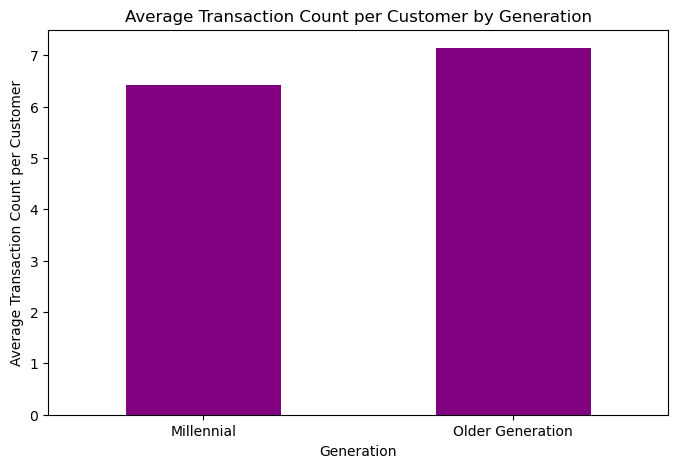

In [89]:
def plot_proportion_bar_chart(data, x_col, y_col, generation, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    generation_data = data[data['GENERATION'] == generation].copy()
    total_count = generation_data[y_col].sum()
    generation_data['PROPORTION'] = (generation_data[y_col] / total_count) * 100
    generation_data = generation_data.sort_values(by='COUNT', ascending=False).head(5)
    plt.barh(generation_data[x_col], generation_data['PROPORTION'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title + ' (' + generation + ')')
    plt.gca().invert_yaxis()
    plt.show()

generations = outgoing_by_customer_generation_df['GENERATION'].unique()

for generation in generations:
    plot_proportion_bar_chart(
        outgoing_by_customer_generation_df[['GENERATION', 'PREFERRED_CHANNEL']].value_counts().reset_index(name='COUNT'),
        'PREFERRED_CHANNEL', 'COUNT', generation,
        'Preferred Channel Proportion by Generation', 'Proportion (%)', 'Preferred Channel')

for generation in generations:
    plot_proportion_bar_chart(
        outgoing_by_customer_generation_df[['GENERATION', 'PREFERRED_RCV_BANK_NAME']].value_counts().reset_index(name='COUNT'),
        'PREFERRED_RCV_BANK_NAME', 'COUNT', generation,
        'Preferred RCV Bank name Proportion by Generation', 'Proportion (%)', 'Preferred RCV Bank name')

def plot_horizontal_bar_chart(data, x_col, y_col, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.barh(data[x_col], data[y_col])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

weighted_avg_amount = outgoing_by_customer_generation_df.groupby('GENERATION')['AVERAGE_AMOUNT'].mean().reset_index()
plot_horizontal_bar_chart(weighted_avg_amount, 'GENERATION', 'AVERAGE_AMOUNT', 'Weighted Average Amount by Generation', 'Weighted Average Amount', 'Generation')

total_amount = outgoing_by_customer_generation_df.groupby('GENERATION')['TOTAL_AMOUNT'].sum().reset_index()
plot_horizontal_bar_chart(total_amount, 'GENERATION', 'TOTAL_AMOUNT', 'Total Amount by Generation', 'Total Amount', 'Generation')

transaction_count = outgoing_by_customer_generation_df.groupby('GENERATION')['TRANSACTION_COUNT'].sum().reset_index()
plot_horizontal_bar_chart(transaction_count, 'GENERATION', 'TRANSACTION_COUNT', 'Transaction Count by Generation', 'Transaction Count', 'Generation')

generation_counts = outgoing_by_customer_generation_df['GENERATION'].value_counts()

plt.figure(figsize=(8, 5))
generation_counts.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Generation')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Millennial and Older Generation')
plt.xticks(rotation=0)
plt.show()

average_transaction_count = outgoing_by_customer_generation_df.groupby('GENERATION')['TRANSACTION_COUNT'].mean()

plt.figure(figsize=(8, 5))
average_transaction_count.plot(kind='bar', color='purple')
plt.xlabel('Generation')
plt.ylabel('Average Transaction Count per Customer')
plt.title('Average Transaction Count per Customer by Generation')
plt.xticks(rotation=0)
plt.show()

In [90]:
customer_merch_count = credit_df.groupby('CUST_NUM')['MERCH_NAME'].nunique()

average_merch_count = customer_merch_count.mean()

print("Average Number of Different MERCH_NAME per Customer:", average_merch_count)

Average Number of Different MERCH_NAME per Customer: 6.753098661378284


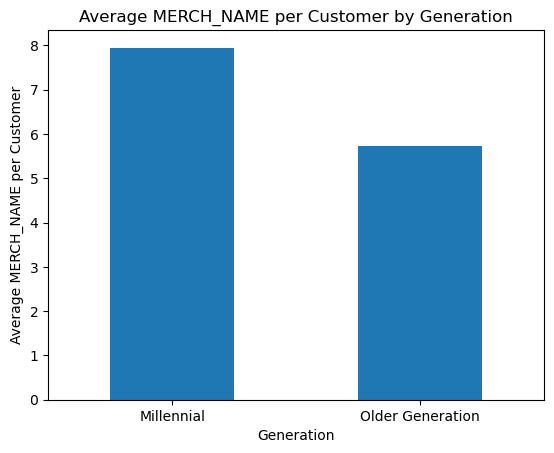

In [91]:
avg_merch_per_customer = credit_df.groupby('CUST_NUM')['MERCH_NAME'].nunique().reset_index()
avg_merch_per_customer.rename(columns={'MERCH_NAME': 'Avg_MERCH_NAME'}, inplace=True)

merged_df = pd.merge(avg_merch_per_customer, customer_df, on='CUST_NUM', how='inner')

def classify_generation(age):
    if age < 35:
        return 'Millennial'
    else:
        return 'Older Generation'

merged_df['Generation'] = merged_df['AGE'].apply(classify_generation)

generation_avg_merch = merged_df.groupby('Generation')['Avg_MERCH_NAME'].mean()

generation_avg_merch.plot(kind='bar', rot=0)
plt.xlabel('Generation')
plt.ylabel('Average MERCH_NAME per Customer')
plt.title('Average MERCH_NAME per Customer by Generation')
plt.show()

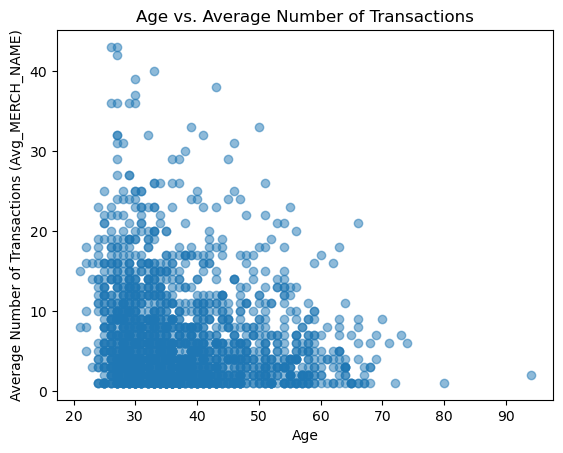

In [92]:
avg_merch_per_customer = credit_df.groupby('CUST_NUM')['MERCH_NAME'].nunique().reset_index()
avg_merch_per_customer.rename(columns={'MERCH_NAME': 'Avg_MERCH_NAME'}, inplace=True)

merged_df = pd.merge(avg_merch_per_customer, customer_df, on='CUST_NUM', how='inner')

plt.scatter(merged_df['AGE'], merged_df['Avg_MERCH_NAME'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Average Number of Transactions (Avg_MERCH_NAME)')
plt.title('Age vs. Average Number of Transactions')
plt.show()

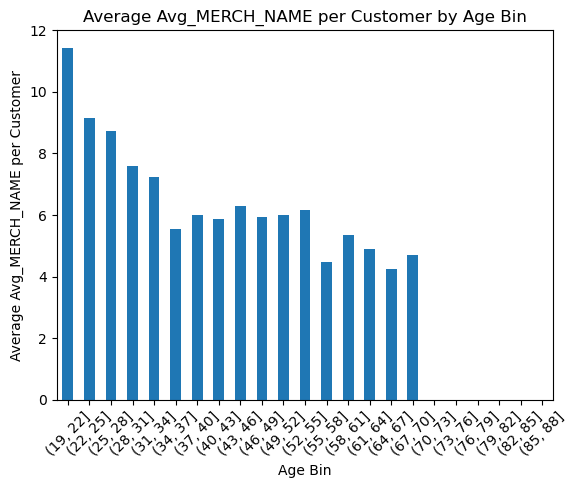

In [93]:
avg_merch_per_customer = credit_df.groupby('CUST_NUM')['MERCH_NAME'].nunique().reset_index()
avg_merch_per_customer.rename(columns={'MERCH_NAME': 'Avg_MERCH_NAME'}, inplace=True)

merged_df = pd.merge(avg_merch_per_customer, customer_df, on='CUST_NUM', how='inner')

age_bins = range(19, 89, 3)

merged_df['Age_Bin'] = pd.cut(merged_df['AGE'], bins=age_bins)

age_bin_avg_merch = merged_df.groupby('Age_Bin')['Avg_MERCH_NAME'].mean()

age_bin_avg_merch[age_bin_avg_merch.index.map(lambda x: merged_df['Age_Bin'].value_counts().get(x, 0) < 5)] = 0

age_bin_avg_merch.plot(kind='bar', rot=45)
plt.xlabel('Age Bin')
plt.ylabel('Average Avg_MERCH_NAME per Customer')
plt.title('Average Avg_MERCH_NAME per Customer by Age Bin')
plt.show()

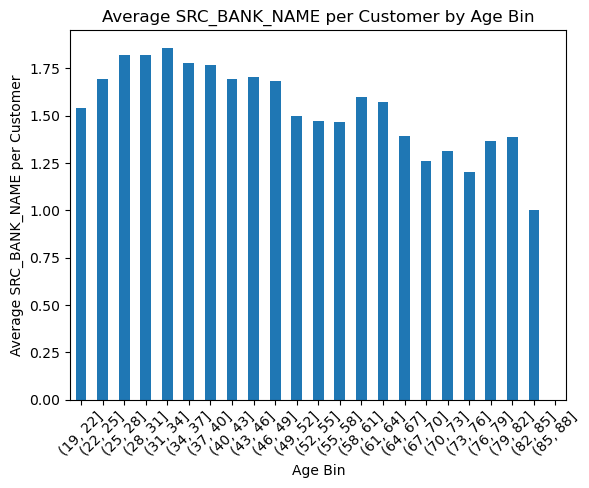

In [94]:
avg_src_banks_per_customer = incoming_df.groupby('CUST_NUM')['SRC_BANK_NAME'].nunique().reset_index()
avg_src_banks_per_customer.rename(columns={'SRC_BANK_NAME': 'Avg_SRC_BANK_NAME'}, inplace=True)

merged_df = pd.merge(avg_src_banks_per_customer, customer_df, on='CUST_NUM', how='inner')

age_bins = range(19, 89, 3)

merged_df['Age_Bin'] = pd.cut(merged_df['AGE'], bins=age_bins)

age_bin_avg_src_banks = merged_df.groupby('Age_Bin')['Avg_SRC_BANK_NAME'].mean()

age_bin_avg_src_banks[age_bin_avg_src_banks.index.map(lambda x: merged_df['Age_Bin'].value_counts().get(x, 0) < 5)] = 0

age_bin_avg_src_banks.plot(kind='bar', rot=45)
plt.xlabel('Age Bin')
plt.ylabel('Average SRC_BANK_NAME per Customer')
plt.title('Average SRC_BANK_NAME per Customer by Age Bin')
plt.show()

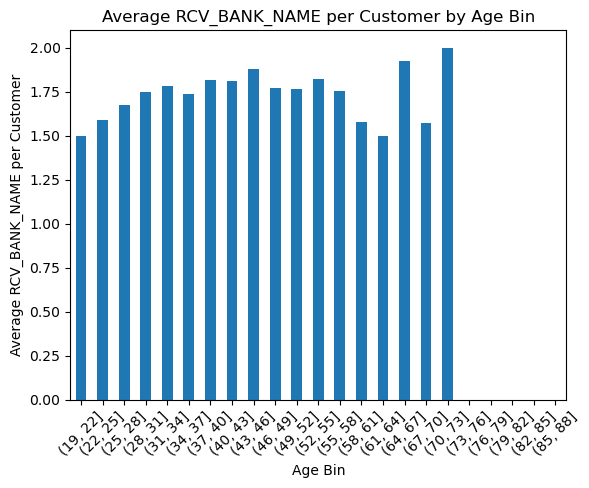

In [95]:
avg_rcv_banks_per_customer = outgoing_df.groupby('CUST_NUM')['RCV_BANK_NAME'].nunique().reset_index()
avg_rcv_banks_per_customer.rename(columns={'RCV_BANK_NAME': 'Avg_RCV_BANK_NAME'}, inplace=True)

merged_df = pd.merge(avg_rcv_banks_per_customer, customer_df, on='CUST_NUM', how='inner')

age_bins = range(19, 89, 3)

merged_df['Age_Bin'] = pd.cut(merged_df['AGE'], bins=age_bins)

age_bin_avg_rcv_banks = merged_df.groupby('Age_Bin')['Avg_RCV_BANK_NAME'].mean()

age_bin_avg_rcv_banks[age_bin_avg_rcv_banks.index.map(lambda x: merged_df['Age_Bin'].value_counts().get(x, 0) < 5)] = 0

age_bin_avg_rcv_banks.plot(kind='bar', rot=45)
plt.xlabel('Age Bin')
plt.ylabel('Average RCV_BANK_NAME per Customer')
plt.title('Average RCV_BANK_NAME per Customer by Age Bin')
plt.show()

In [96]:
grouped_df = credit_df.groupby(['CUST_NUM', 'CHANNEL']).agg({
    'AMOUNT': ['mean', 'count']
}).reset_index()

grouped_df.columns = ['CUST_NUM', 'CHANNEL', 'AVERAGE_AMOUNT', 'TRANSACTION_COUNT']

summary_df = grouped_df.pivot(index='CUST_NUM', columns='CHANNEL', values=['AVERAGE_AMOUNT', 'TRANSACTION_COUNT'])

summary_df.columns = ['_'.join(col).strip() for col in summary_df.columns.values]
summary_df = summary_df.reset_index()

summary_df = summary_df.rename(columns={
    'AVERAGE_AMOUNT_POS-RETAIL PURCHASE': 'AVERAGE_POS_RETAIL_PURCHASE_AMOUNT',
    'AVERAGE_AMOUNT_ONLINE-RETAIL PURCHASE': 'AVERAGE_ONLINE_RETAIL_PURCHASE_AMOUNT',
    'AVERAGE_AMOUNT_SIP-RETAIL PURCHASE': 'AVERAGE_SIP_RETAIL_PURCHASE_AMOUNT',
    'TRANSACTION_COUNT_POS-RETAIL PURCHASE': 'TRANSACTION_COUNT_POS_RETAIL_PURCHASE_AMOUNT',
    'TRANSACTION_COUNT_ONLINE-RETAIL PURCHASE': 'TRANSACTION_COUNT_ONLINE_RETAIL_PURCHASE_AMOUNT',
    'TRANSACTION_COUNT_SIP-RETAIL PURCHASE': 'TRANSACTION_COUNT_SIP_PURCHASE_AMOUNT'
})

summary_df = summary_df.fillna(0)

summary_df


CUST_NUM  AVERAGE_ONLINE_RETAIL_PURCHASE_AMOUNT  \
0       206.450963                           31051.357622   
1       362.331340                               0.000000   
2       565.598798                            3079.602205   
3       658.971927                            1866.322210   
4       726.733789                               0.000000   
...            ...                                    ...   
2012  14128.979510                            2056.800582   
2013  14132.466310                               0.000000   
2014  14132.798803                               0.000000   
2015  14137.138466                               0.000000   
2016  14139.061638                               0.000000   

      AVERAGE_POS_RETAIL_PURCHASE_AMOUNT  AVERAGE_SIP_RETAIL_PURCHASE_AMOUNT  \
0                               0.000000                                 0.0   
1                            3129.111925                                 0.0   
2                            4450.444836                                 0.0   
3                            2676.198350                                 0.0   
4                            1636.611370                                 0.0   
...                                  ...                                 ...   
2012                            0.000000                                 0.0   
2013                         3402.418062                                 0.0   
2014                         1565.500577                                 0.0   
2015                         3184.343076                                 0.0   
2016                         1819.143740                                 0.0   

      TRANSACTION_COUNT_ONLINE_RETAIL_PURCHASE_AMOUNT  \
0                                                 2.0   
1                                                 0.0   
2                                                 1.0   
3                                                 1.0   
4                                                 0.0   
...                                               ...   
2012                                              3.0   
2013                                              0.0   
2014                                              0.0   
2015                                              0.0   
2016                                              0.0   

      TRANSACTION_COUNT_POS_RETAIL_PURCHASE_AMOUNT  \
0                                              0.0   
1                                             12.0   
2                                              4.0   
3                                              6.0   
4                                              9.0   
...                                            ...   
2012                                           0.0   
2013                                           9.0   
2014                                           3.0   
2015                                          15.0   
2016                                          25.0   

      TRANSACTION_COUNT_SIP_PURCHASE_AMOUNT  
0                                       0.0  
1                                       0.0  
2                                       0.0  
3                                       0.0  
4                                       0.0  
...                                     ...  
2012                                    0.0  
2013                                    0.0  
2014                                    0.0  
2015                                    0.0  
2016                                    0.0  

[2017 rows x 7 columns]

In [97]:
customer_df_filtered = customer_df[customer_df['CUST_NUM'].isin(summary_df['CUST_NUM'])]

credit_by_channel_df = pd.merge(customer_df_filtered, summary_df, on='CUST_NUM', how='left')

credit_by_channel_df['GENERATION'] = credit_by_channel_df['AGE'].apply(lambda age: 'Millennial' if age < 40 else 'Older Generation')

credit_by_channel_df[['AVERAGE_POS_RETAIL_PURCHASE_AMOUNT',
                     'AVERAGE_ONLINE_RETAIL_PURCHASE_AMOUNT',
                     'AVERAGE_SIP_RETAIL_PURCHASE_AMOUNT',
                     'TRANSACTION_COUNT_POS_RETAIL_PURCHASE_AMOUNT',
                     'TRANSACTION_COUNT_ONLINE_RETAIL_PURCHASE_AMOUNT',
                     'TRANSACTION_COUNT_SIP_PURCHASE_AMOUNT']] = credit_by_channel_df[['AVERAGE_POS_RETAIL_PURCHASE_AMOUNT',
                                                                                        'AVERAGE_ONLINE_RETAIL_PURCHASE_AMOUNT',
                                                                                        'AVERAGE_SIP_RETAIL_PURCHASE_AMOUNT',
                                                                                        'TRANSACTION_COUNT_POS_RETAIL_PURCHASE_AMOUNT',
                                                                                        'TRANSACTION_COUNT_ONLINE_RETAIL_PURCHASE_AMOUNT',
                                                                                        'TRANSACTION_COUNT_SIP_PURCHASE_AMOUNT']].fillna(0)


credit_by_channel_df.columns

Index(['CUST_NUM', 'PROVINCE', 'REGION', 'EDUCATION', 'AGE', 'TENURE',
       'BUSINESS_OWNER', 'DIGITAL_FLAG', 'INCOME_SOURCE', 'IDV_OR_ORG',
       'SEGMENT', 'SUBSEGMENT', 'GENDER', 'MARITAL_STATUS', 'GENERATION',
       'AVERAGE_ONLINE_RETAIL_PURCHASE_AMOUNT',
       'AVERAGE_POS_RETAIL_PURCHASE_AMOUNT',
       'AVERAGE_SIP_RETAIL_PURCHASE_AMOUNT',
       'TRANSACTION_COUNT_ONLINE_RETAIL_PURCHASE_AMOUNT',
       'TRANSACTION_COUNT_POS_RETAIL_PURCHASE_AMOUNT',
       'TRANSACTION_COUNT_SIP_PURCHASE_AMOUNT'],
      dtype='object')

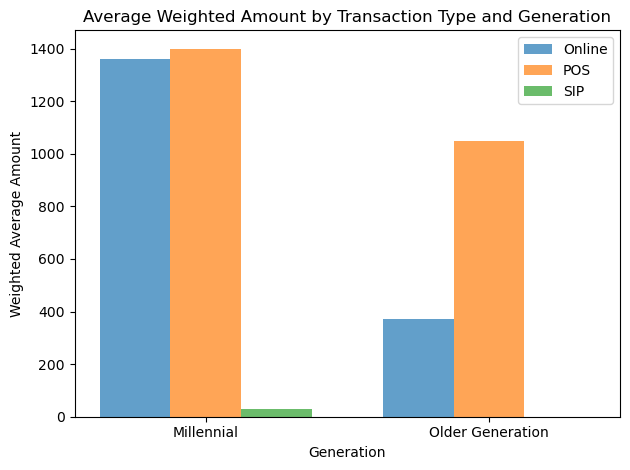

In [98]:
generation_grouped = credit_by_channel_df.groupby('GENERATION').agg({
    'AVERAGE_ONLINE_RETAIL_PURCHASE_AMOUNT': 'mean',
    'AVERAGE_POS_RETAIL_PURCHASE_AMOUNT': 'mean',
    'AVERAGE_SIP_RETAIL_PURCHASE_AMOUNT': 'mean',
    'TRANSACTION_COUNT_ONLINE_RETAIL_PURCHASE_AMOUNT': 'sum',
    'TRANSACTION_COUNT_POS_RETAIL_PURCHASE_AMOUNT': 'sum',
    'TRANSACTION_COUNT_SIP_PURCHASE_AMOUNT': 'sum'
})

generation_grouped['WEIGHTED_AVERAGE_ONLINE'] = generation_grouped['AVERAGE_ONLINE_RETAIL_PURCHASE_AMOUNT'] * \
    generation_grouped['TRANSACTION_COUNT_ONLINE_RETAIL_PURCHASE_AMOUNT'] / generation_grouped['TRANSACTION_COUNT_ONLINE_RETAIL_PURCHASE_AMOUNT'].sum()

generation_grouped['WEIGHTED_AVERAGE_POS'] = generation_grouped['AVERAGE_POS_RETAIL_PURCHASE_AMOUNT'] * \
    generation_grouped['TRANSACTION_COUNT_POS_RETAIL_PURCHASE_AMOUNT'] / generation_grouped['TRANSACTION_COUNT_POS_RETAIL_PURCHASE_AMOUNT'].sum()

generation_grouped['WEIGHTED_AVERAGE_SIP'] = generation_grouped['AVERAGE_SIP_RETAIL_PURCHASE_AMOUNT'] * \
    generation_grouped['TRANSACTION_COUNT_SIP_PURCHASE_AMOUNT'] / generation_grouped['TRANSACTION_COUNT_SIP_PURCHASE_AMOUNT'].sum()

generations = generation_grouped.index
weighted_averages_online = generation_grouped['WEIGHTED_AVERAGE_ONLINE']
weighted_averages_pos = generation_grouped['WEIGHTED_AVERAGE_POS']
weighted_averages_sip = generation_grouped['WEIGHTED_AVERAGE_SIP']

x = np.arange(len(generations))
width = 0.25

fig, ax = plt.subplots()
ax.bar(x - width, weighted_averages_online, width, label='Online', alpha=0.7)
ax.bar(x, weighted_averages_pos, width, label='POS', alpha=0.7)
ax.bar(x + width, weighted_averages_sip, width, label='SIP', alpha=0.7)

ax.set_xlabel('Generation')
ax.set_ylabel('Weighted Average Amount')
ax.set_title('Average Weighted Amount by Transaction Type and Generation')
ax.set_xticks(x)
ax.set_xticklabels(generations)
ax.legend()

plt.tight_layout()
plt.show()

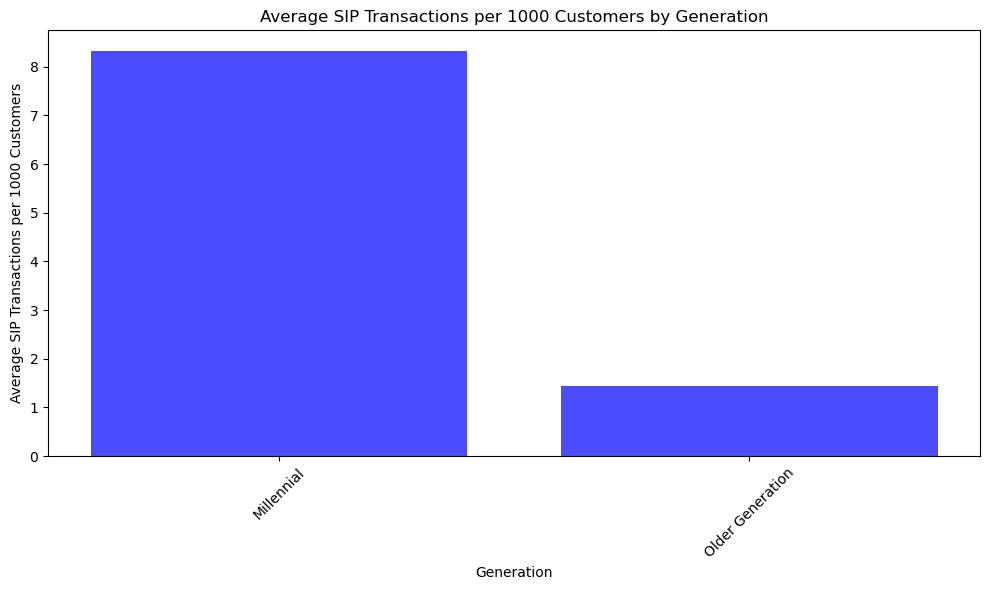

In [99]:
generation_grouped = credit_by_channel_df.groupby('GENERATION').agg({
    'TRANSACTION_COUNT_SIP_PURCHASE_AMOUNT': 'sum',
    'CUST_NUM': 'count'
})

generation_grouped['TRANSACTION_COUNT_SIP_PURCHASE_AMOUNT_PER_1000'] = (generation_grouped['TRANSACTION_COUNT_SIP_PURCHASE_AMOUNT'] /
                                                                      generation_grouped['CUST_NUM']) * 1000

generations = generation_grouped.index
average_sip_per_1000 = generation_grouped['TRANSACTION_COUNT_SIP_PURCHASE_AMOUNT_PER_1000']

plt.figure(figsize=(10, 6))
plt.bar(generations, average_sip_per_1000, color='blue', alpha=0.7)
plt.xlabel('Generation')
plt.ylabel('Average SIP Transactions per 1000 Customers')
plt.title('Average SIP Transactions per 1000 Customers by Generation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

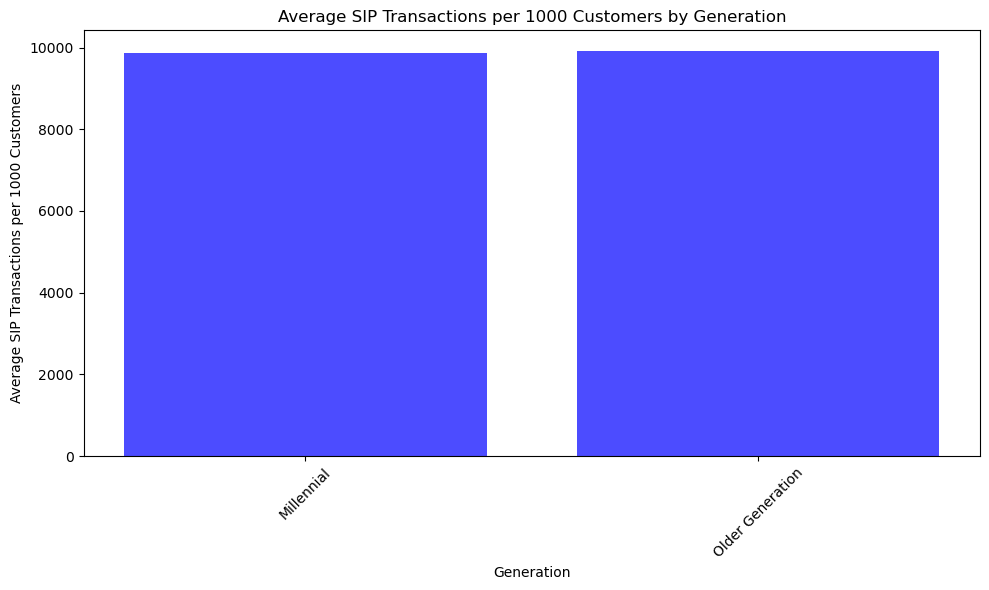

In [100]:
generation_grouped = credit_by_channel_df.groupby('GENERATION').agg({
    'TRANSACTION_COUNT_POS_RETAIL_PURCHASE_AMOUNT': 'sum',
    'CUST_NUM': 'count'
})

generation_grouped['TRANSACTION_COUNT_POS_PURCHASE_AMOUNT_PER_1000'] = (generation_grouped['TRANSACTION_COUNT_POS_RETAIL_PURCHASE_AMOUNT'] /
                                                                      generation_grouped['CUST_NUM']) * 1000

generations = generation_grouped.index
average_sip_per_1000 = generation_grouped['TRANSACTION_COUNT_POS_PURCHASE_AMOUNT_PER_1000']

plt.figure(figsize=(10, 6))
plt.bar(generations, average_sip_per_1000, color='blue', alpha=0.7)
plt.xlabel('Generation')
plt.ylabel('Average SIP Transactions per 1000 Customers')
plt.title('Average SIP Transactions per 1000 Customers by Generation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

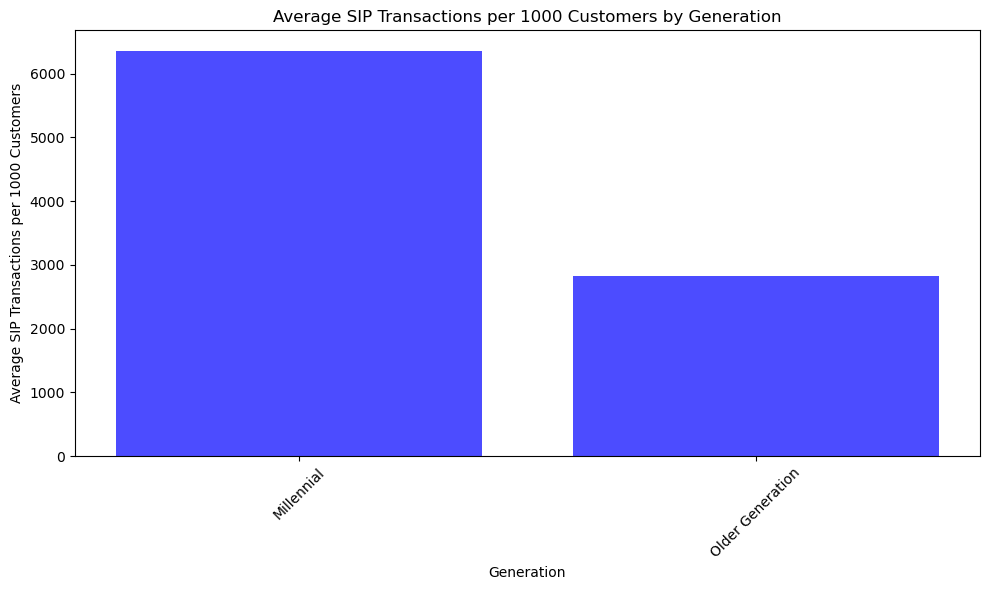

In [101]:
generation_grouped = credit_by_channel_df.groupby('GENERATION').agg({
    'TRANSACTION_COUNT_ONLINE_RETAIL_PURCHASE_AMOUNT': 'sum',
    'CUST_NUM': 'count'
})

generation_grouped['TRANSACTION_COUNT_ONLINE_PURCHASE_AMOUNT_PER_1000'] = (generation_grouped['TRANSACTION_COUNT_ONLINE_RETAIL_PURCHASE_AMOUNT'] /
                                                                      generation_grouped['CUST_NUM']) * 1000

generations = generation_grouped.index
average_sip_per_1000 = generation_grouped['TRANSACTION_COUNT_ONLINE_PURCHASE_AMOUNT_PER_1000']

plt.figure(figsize=(10, 6))
plt.bar(generations, average_sip_per_1000, color='blue', alpha=0.7)
plt.xlabel('Generation')
plt.ylabel('Average SIP Transactions per 1000 Customers')
plt.title('Average SIP Transactions per 1000 Customers by Generation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

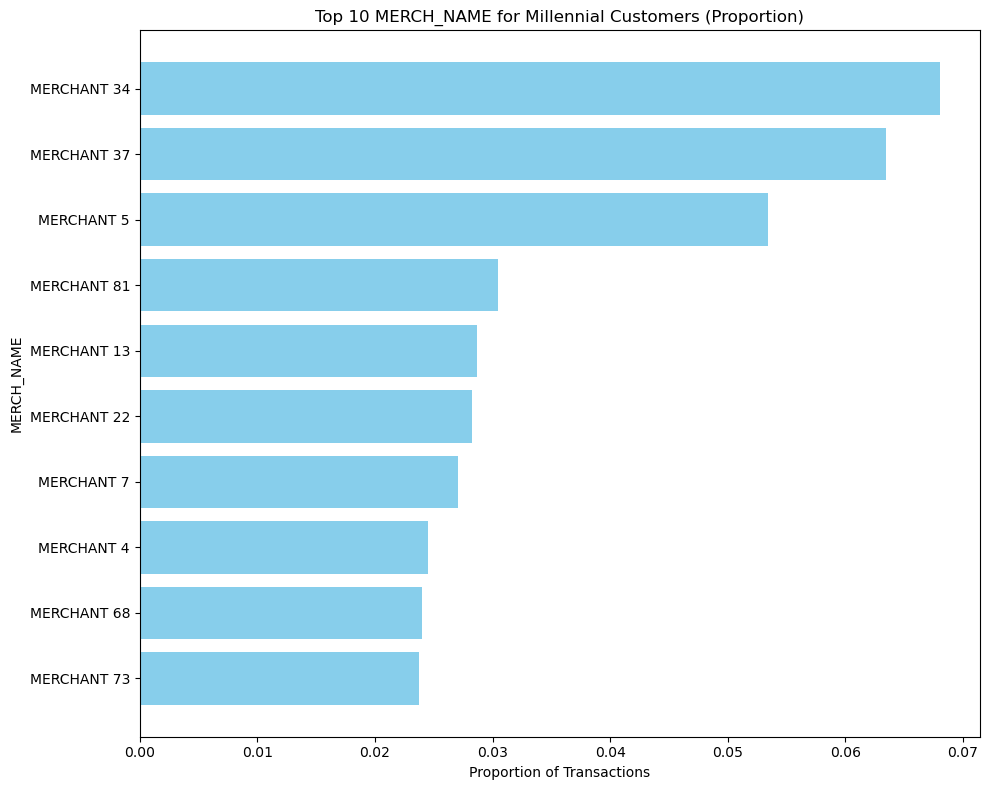

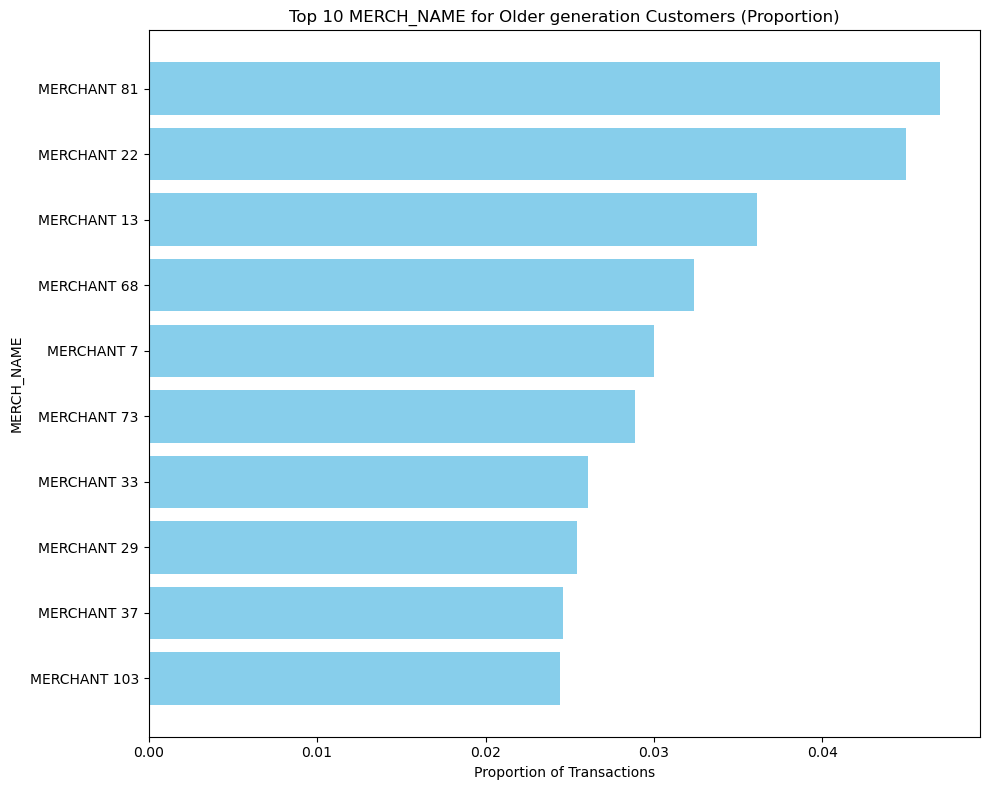

In [102]:
merged_df = pd.merge(credit_df, customer_df[['CUST_NUM', 'AGE']], on='CUST_NUM')

merged_df['GENERATION'] = 'millennial'
merged_df.loc[merged_df['AGE'] >= 40, 'GENERATION'] = 'older generation'

top_merch_by_age = merged_df.groupby(['GENERATION', 'MERCH_NAME'])['CUST_NUM'].count().reset_index()
top_merch_by_age['Total_Transactions'] = top_merch_by_age.groupby('GENERATION')['CUST_NUM'].transform('sum')
top_merch_by_age['Proportion'] = top_merch_by_age['CUST_NUM'] / top_merch_by_age['Total_Transactions']
top_merch_by_age = top_merch_by_age.sort_values(by=['GENERATION', 'Proportion'], ascending=[True, False])
top_merch_by_age = top_merch_by_age.groupby('GENERATION').head(10)


for age_category in ['millennial', 'older generation']:
    plt.figure(figsize=(10, 8))
    data = top_merch_by_age[top_merch_by_age['GENERATION'] == age_category]
    plt.barh(data['MERCH_NAME'], data['Proportion'], color='skyblue')
    plt.title(f'Top 10 MERCH_NAME for {age_category.capitalize()} Customers (Proportion)')
    plt.xlabel('Proportion of Transactions')
    plt.ylabel('MERCH_NAME')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
